In [1]:
#!/usr/local/lib/anaconda3/bin/python
# -*- coding: utf-8 -*-
import sys
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import *
import random
import pandas as pd
import csv
from scipy import optimize

In [2]:
def H(x,mask):
    xo = np.delete(x,mask,axis=0)
    return xo

def H2(x,mask):
    xo = np.delete(x,mask,axis=0)
    return xo**2

a=2
mask = np.random.choice(10,a,replace=False)
E = np.identity(10)
E = np.delete(E,mask,axis=0)
y = np.random.randn(10*3).reshape(3,10).T
y_ = np.delete(y,mask,axis=0)
print(mask)
print(E@y-H(y,mask))
print(y_**2-H2(y,mask))

[2 0]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [2]:
from scipy import optimize
optimize.show_options('minimize','BFGS')

Minimization of scalar function of one or more variables using the
BFGS algorithm.

Options
-------
disp : bool
    Set to True to print convergence messages.
maxiter : int
    Maximum number of iterations to perform.
gtol : float
    Gradient norm must be less than `gtol` before successful
    termination.
norm : float
    Order of norm (Inf is max, -Inf is min).
eps : float or ndarray
    If `jac` is approximated, use this value for the step size.


In [3]:
def CG(xb,*args):
    result=[xb]
    x0 = xb
    d0 = -jacobi(x0,*args)
    d1 = -d0
    i = 0
    while i<200:
        alpha = almiho(d0,x0,d1,*args)
        #alpha = golden_section(d0,x0,*args)
        x = x0 + alpha*d0
        d1 = jacobi(x,*args)
        #print(d1)
        err = np.sqrt(np.sum(d1**2))
        result.append(x)
        print("err",err)          
        if(err<0.001):
            print(i,"end")
            print(err)
            break
        p = -d1 + (np.dot(d1.T,d1)/np.dot(d0.T,d0))*d0
        x0 = x
        d0 = p
        i+=1
    else:
        print("!!failed to converge in CG!!")
        print(err)
    jmin = J(x,*args)
    return x,jmin#,result

In [4]:
def almiho(d0,x0,df0,*args):
    alpha=0.0001
    beta=0.5
    f1 = J(x0,*args)
    dfd = df0@d0
    print(dfd)
    l = 0
    while l<100:
        tk = beta**l
        lim = alpha*tk*dfd
        x = x0 + tk*d0
        f2 = J(x,*args)
        print("f2-f1",f2-f1,"lim",lim)
        if(f2-f1<=lim):
            print("end",tk)
            break
        l+=1
    else:
        print("!!failed to converge in almiho!!",tk)
    return tk

In [5]:
def golden_section(d0,x0,*args):
    t = (1.0+np.sqrt(5.0))/2.0 # golden_ratio
    a1=-10.0
    a3=10.0
    a2=(t*a1+a3)/(1+t)
    a4=a1-a2+a3
    num=0
    #print(num,a,b,c1,c2,abs(b-a))
    for k in range(100):
        num+=1
        x1 = x0 + a2*d0
        f2 = J(x1,*args)
        x2 = x0 + a4*d0
        f4 = J(x2,*args)
        if(f4>f2):
            a3=a1
            a1=a4
        else:
            a1=a2
            a2=a4
        if(abs(a3-a1)<0.0001):
            xa = x0 + a1*d0
            f = J(xa,*args)
            print(num,"end",a1)
            break
        a4=a1-a2+a3
        #print(num,a,b,c1,c2,abs(b-a))
    return a1

end 0.03125
end 0.125
end 3.469446951953614e-18
end 2.7755575615628914e-17
end 0.00390625
end 0.015625
end 0.03125
end 0.03125
end 0.015625
end 0.0625
end 5.551115123125783e-17
end 0.015625
end 0.03125
end 5.551115123125783e-17
end 0.015625
end 0.015625
end 0.0625
end 0.015625
end 0.015625
end 0.03125
end 1.4210854715202004e-14
end 0.015625
end 0.0625
end 1.7763568394002505e-15
end 0.015625
end 0.0625
end 7.105427357601002e-15
end 0.015625
end 0.03125
end 1.1368683772161603e-13
end 0.015625
30 end
0.0009849071406023149


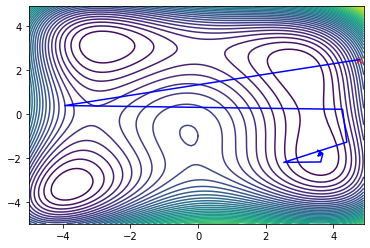

In [5]:
delta = 0.1
minXY=-5.0
maxXY=5.0
nContour=50
alpha=0.01

def J(x,*args):
    u"""
    Himmelblau's function
    see Himmelblau's function - Wikipedia, the free encyclopedia 
    http://en.wikipedia.org/wiki/Himmelblau%27s_function
    """
    return (x[0]**2+x[1]-11)**2+(x[0]+x[1]**2-7)**2

def CreateMeshData():
    x = np.arange(minXY, maxXY, delta)
    y = np.arange(minXY, maxXY, delta)
    X, Y = np.meshgrid(x, y)
    Z=[J(np.stack([x,y],axis=0)) for (x,y) in zip(X,Y)]
    return(X,Y,Z)

def jacobi(x,*args):
    dx = 4*x[0]**3 + 4*x[0]*x[1] - 42*x[0] +2*x[1]**2 -14
    dy = 2*x[0]**2 + 4*x[0]*x[1] + 4*x[1]**3 -26*x[1] -22
    return np.array([dx,dy])

start=np.array([random.uniform(minXY,maxXY),random.uniform(minXY,maxXY)])

x,jmin,resultc=CG(start,None)
(X,Y,Z)=CreateMeshData()
CS = plt.contour(X, Y, Z,nContour)
#  plt.clabel(CS, inline=1, fontsize=10)
#  plt.title('Simplest default with labels')

plt.plot(start[0],start[1],"xr");

optX=[x[0] for x in resultc]
optY=[x[1] for x in resultc]
plt.plot(optX,optY,"-b");

plt.show()

In [29]:
# MLEF

def L96(Xa,F):

    F_ = (np.roll(Xa, -1,axis=0) - np.roll(Xa, 2,axis=0)) * np.roll(Xa, 1,axis=0) -  Xa + F
    
    return F_

#4次のルンゲクッタ
def Rungekutta4(Xa,h,F):
    
    F_ = L96(Xa,F)
    K1 = h*F_

    X2=Xa+K1/2
    F_ = L96(X2,F)
    K2=h*F_
    
    X3=Xa+K2/2
    F_ = L96(X3,F)
    K3=h*F_
    
    X4=Xa+K3
    F_ = L96(X4,F)
    K4=h*F_
    
    Xb=Xa+K1/6+K2/3+K3/3+K4/6
    
    return Xb

def Forecast(Xac,Xa,m,b):
    h = 0.05 
    F = 8.0
    
    #control
    Xfc = Rungekutta4(Xac,h,F)
    
    #ensemble
    Xf = np.empty((N,m))
    Xf = Rungekutta4(Xa,h,F)
    
    #Pf^(1/2)
    dXf = Xf - Xfc.reshape(-1,1)
    dXf = dXf*b
    #print(dXf)
    Pf = dXf @ dXf.T
    #Pf = Pf*L
    
    return Xfc,Xf,Pf,dXf

def Analysis(Xfc,Xf,dXf,y,m,a,mask):
    N = 40
    p = N-a
    R = np.eye(p)
    I = np.eye(m)
    
    R_inv = np.linalg.inv(R)
    R_sqrt = np.sqrt(R_inv)
    #z = R_sqrt@H(Xf,mask) - R_sqrt@H(Xfc,mask).reshape(-1,1) #R^(-1/2)HPf^(1/2)
    z = R_sqrt@H2(Xf,mask) - R_sqrt@H2(Xfc,mask).reshape(-1,1) #R^(-1/2)HPf^(1/2)
    C = z.T@z
    #print(C)
    
    la,v = np.linalg.eigh(C)
    #print(v)
    D = np.diag(1/np.sqrt(la+np.ones(m)))
    #print(D)
    V = np.array(v).reshape(m,m)
    A = V @ D @ V.T #(I+C)^(-T/2)
    
    zeta0 = np.zeros(m)
    args = (Xfc,dXf,A,y,R_inv,mask,H2)
    #res = optimize.minimize(J, zeta0, args=args, method='BFGS', jac=jacobi, options={'gtol':1e-6, 'disp':True})
    #zeta = res.x
    #jmin = res.fun
    #Pa_ = res.hess_inv #(I+C)^(-T/2)?
    zeta,jmin = CG(zeta0,*args)
    Xac = Xfc + dXf@A@zeta
    
    Xf = Xac.reshape(-1,1)+dXf
    #z_opt = R_sqrt@H(Xf,mask)- R_sqrt@H(Xac,mask).reshape(-1,1) #R^(-1/2)HPf^(1/2)
    z_opt = R_sqrt@H2(Xf,mask) - R_sqrt@H2(Xac,mask).reshape(-1,1) #R^(-1/2)HPf^(1/2)
    C_opt = z_opt.T@z_opt
    
    la,v = np.linalg.eigh(C_opt)
    #print(v)
    D = np.diag(1/np.sqrt(la+np.ones(m)))
    #print(D)
    V = np.array(v).reshape(m,m)
    A = V @ D @ V.T #(I+C_opt)^(-T/2)
    #print(A)
    
    dXa = dXf@A #Pf^(1/2)(I+C_opt)^(-T/2)
    
    Xa = np.zeros((N,m))
    Xa = dXa + Xac.reshape(-1,1)
    Pa = dXa@dXa.T
    
    return Xa,Pa,Xac,jmin

def J(zeta,*args):
    xb,dXf,A,y,R_inv,mask,H_obs = args
    B = A.T@A #(I+C)^(-1)
     
    x = xb + dXf@A@zeta
    inv = y - H_obs(x,mask)   
    return (zeta.T@B@zeta + inv.T@R_inv@inv)/2

def jacobi(zeta,*args):
    xb,dXf,A,y,R_inv,mask,H_obs = args
    B = A.T@A #(I+C)^(-1)
    R_sqrt = np.sqrt(R_inv)
    
    x = xb + dXf@A@zeta
    z = R_sqrt@H_obs(x.reshape(-1,1)+dXf,mask) - R_sqrt@H_obs(x,mask).reshape(-1,1) #R^(-1/2)HPf^(1/2)
    inv = y - H_obs(x,mask)
    djo = A.T@z.T@R_sqrt@inv
    return B@zeta - djo

def H(x,mask):
    xo = np.delete(x,mask,axis=0)
    return xo

def H2(x,mask):
    xo = np.delete(x,mask,axis=0)
    return xo**2

In [28]:
# MLEF(preconditioning)

def L96(Xa,F):

    F_ = (np.roll(Xa, -1,axis=0) - np.roll(Xa, 2,axis=0)) * np.roll(Xa, 1,axis=0) -  Xa + F
    
    return F_

#4次のルンゲクッタ
def Rungekutta4(Xa,h,F):
    
    F_ = L96(Xa,F)
    K1 = h*F_

    X2=Xa+K1/2
    F_ = L96(X2,F)
    K2=h*F_
    
    X3=Xa+K2/2
    F_ = L96(X3,F)
    K3=h*F_
    
    X4=Xa+K3
    F_ = L96(X4,F)
    K4=h*F_
    
    Xb=Xa+K1/6+K2/3+K3/3+K4/6
    
    return Xb

def Forecast(Xac,Xa,m,b):
    h = 0.05 
    F = 8.0
    
    #control
    Xfc = Rungekutta4(Xac,h,F)
    
    #ensemble
    Xf = np.empty((N,m))
    Xf = Rungekutta4(Xa,h,F)
    
    #Pf^(1/2)
    dXf = Xf - Xfc.reshape(-1,1)
    dXf = dXf*b
    #print(dXf)
    Pf = dXf @ dXf.T
    #Pf = Pf*L
    
    return Xfc,Xf,Pf,dXf

def Analysis(Xfc,Xf,dXf,y,m,a,mask):
    N = 40
    p = N-a
    R = np.eye(p)
    I = np.eye(m)
    
    R_inv = np.linalg.inv(R)
    R_sqrt = np.sqrt(R_inv)
    #z = R_sqrt@H(Xf,mask) - R_sqrt@H(Xfc,mask).reshape(-1,1) #R^(-1/2)HPf^(1/2)
    #z = R_sqrt@H2(Xf,mask) - R_sqrt@H2(Xfc,mask).reshape(-1,1) #R^(-1/2)HPf^(1/2)
    z = R_sqrt@H3(Xf,mask) - R_sqrt@H3(Xfc,mask).reshape(-1,1) #R^(-1/2)HPf^(1/2)
    C = z.T@z
    #print(C)
    
    la,v = np.linalg.eigh(C)
    #print(v)
    D = np.diag(1/np.sqrt(la+np.ones(m)))
    #print(D)
    V = np.array(v).reshape(m,m)
    A = V @ D @ V.T #(I+C)^(-T/2)
    D_inv = np.diag(np.sqrt(np.ones(m)+la))
    A_inv = V @ D_inv @ V.T #(I+C)^(1/2)
    
    v0 = np.zeros(m)
    args = (Xfc,dXf,A,y,R_inv,mask,H3)
    res = optimize.minimize(J, v0, args=args, method='BFGS', jac=jacobi, options={'gtol':1e-4, 'disp':True})
    v = res.x
    jmin = res.fun
    #Pa_ = res.hess_inv #(I+C)^(-T/2)?
    #v,jmin = CG(v0,*args)
    #zeta = A_inv@v
    Xac = Xfc + dXf@v
    
    Xf = Xac.reshape(-1,1)+dXf
    #z_opt = R_sqrt@H(Xf,mask)- R_sqrt@H(Xac,mask).reshape(-1,1) #R^(-1/2)HPf^(1/2)
    #z_opt = R_sqrt@H2(Xf,mask) - R_sqrt@H2(Xac,mask).reshape(-1,1) #R^(-1/2)HPf^(1/2)
    z_opt = R_sqrt@H3(Xf,mask) - R_sqrt@H3(Xac,mask).reshape(-1,1) #R^(-1/2)HPf^(1/2)
    C_opt = z_opt.T@z_opt
    
    la,v = np.linalg.eigh(C_opt)
    #print(v)
    D = np.diag(1/np.sqrt(la+np.ones(m)))
    #print(D)
    V = np.array(v).reshape(m,m)
    A = V @ D @ V.T #(I+C_opt)^(-T/2)
    #print(A)
    
    dXa = dXf@A #Pf^(1/2)(I+C_opt)^(-T/2)
    
    Xa = np.zeros((N,m))
    Xa = dXa + Xac.reshape(-1,1)
    Pa = dXa@dXa.T
    
    return Xa,Pa,Xac,jmin

def J(v,*args):
    xb,dXf,A,y,R_inv,mask,H_obs = args
     
    x = xb + dXf@v
    inv = y - H_obs(x,mask)   
    return (v.T@v + inv.T@R_inv@inv)/2

def jacobi(v,*args):
    xb,dXf,A,y,R_inv,mask,H_obs = args
    R_sqrt = np.sqrt(R_inv)
    
    x = xb + dXf@v
    z = R_sqrt@H_obs(x.reshape(-1,1)+dXf,mask) - R_sqrt@H_obs(x,mask).reshape(-1,1) #R^(-1/2)HPf^(1/2)
    inv = y - H_obs(x,mask)
    djo = z.T@R_sqrt@inv
    return v - djo

def H(x,mask):
    xo = np.delete(x,mask,axis=0)
    return xo

def H2(x,mask):
    xo = np.delete(x,mask,axis=0)
    return xo**2

def H3(x,mask):
    xo = np.delete(x,mask,axis=0)
    return np.sqrt(xo**2)

         Current function value: 153.399502
         Iterations: 3
         Function evaluations: 106
         Gradient evaluations: 94
         Current function value: 79.539529
         Iterations: 9
         Function evaluations: 102
         Gradient evaluations: 90
Optimization terminated successfully.
         Current function value: 69.249464
         Iterations: 15
         Function evaluations: 16
         Gradient evaluations: 16
         Current function value: 82.485078
         Iterations: 4
         Function evaluations: 102
         Gradient evaluations: 90
Optimization terminated successfully.
         Current function value: 100.147588
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 112.439352
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 12

Optimization terminated successfully.
         Current function value: 64.970588
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 96.778251
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
         Current function value: 74.966914
         Iterations: 3
         Function evaluations: 101
         Gradient evaluations: 89
Optimization terminated successfully.
         Current function value: 58.915869
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 76.084680
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 78.432572
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
 

         Current function value: 56.942821
         Iterations: 5
         Function evaluations: 106
         Gradient evaluations: 94
         Current function value: 92.412256
         Iterations: 10
         Function evaluations: 58
         Gradient evaluations: 46
         Current function value: 50.716179
         Iterations: 6
         Function evaluations: 108
         Gradient evaluations: 96
         Current function value: 36.093419
         Iterations: 8
         Function evaluations: 81
         Gradient evaluations: 69
Optimization terminated successfully.
         Current function value: 50.178104
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 49.008031
         Iterations: 12
         Function evaluations: 14
         Gradient evaluations: 14
         Current function value: 57.668617
         Iterations: 10
         Function evaluations: 82
         Gradi

         Current function value: 83.758540
         Iterations: 7
         Function evaluations: 98
         Gradient evaluations: 86
Optimization terminated successfully.
         Current function value: 76.613052
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 62.216190
         Iterations: 11
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 69.696267
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 73.294036
         Iterations: 11
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 69.598406
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
O

         Current function value: 40.088496
         Iterations: 6
         Function evaluations: 89
         Gradient evaluations: 77
         Current function value: 74.153718
         Iterations: 7
         Function evaluations: 66
         Gradient evaluations: 55
         Current function value: 60.345155
         Iterations: 12
         Function evaluations: 81
         Gradient evaluations: 69
Optimization terminated successfully.
         Current function value: 87.669755
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 116.191488
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 133.146359
         Iterations: 7
         Function evaluations: 85
         Gradient evaluations: 73
Optimization terminated successfully.
         Current function value: 134.090558
         Iterations: 12
         

Optimization terminated successfully.
         Current function value: 175.031015
         Iterations: 14
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 198.138993
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 206.519949
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 190.295453
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 14
         Current function value: 188.638351
         Iterations: 8
         Function evaluations: 105
         Gradient evaluations: 93
Optimization terminated successfully.
         Current function value: 204.512900
         Iterations: 12
         Function evaluations: 14
         Gradient evaluation

         Current function value: 97.387690
         Iterations: 9
         Function evaluations: 97
         Gradient evaluations: 85
         Current function value: 145.602362
         Iterations: 12
         Function evaluations: 88
         Gradient evaluations: 76
Optimization terminated successfully.
         Current function value: 107.812581
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 117.887269
         Iterations: 14
         Function evaluations: 16
         Gradient evaluations: 16
         Current function value: 66.369518
         Iterations: 8
         Function evaluations: 77
         Gradient evaluations: 65
Optimization terminated successfully.
         Current function value: 76.086713
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
         Current function value: 77.984910
         Iterations: 9
         

         Current function value: 93.632495
         Iterations: 6
         Function evaluations: 80
         Gradient evaluations: 68
Optimization terminated successfully.
         Current function value: 133.878405
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
         Current function value: 116.421815
         Iterations: 6
         Function evaluations: 89
         Gradient evaluations: 77
Optimization terminated successfully.
         Current function value: 159.743833
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 118.706023
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
         Current function value: 117.687501
         Iterations: 4
         Function evaluations: 99
         Gradient evaluations: 87
         Current function value: 121.992755
         Iterations: 9
       

Optimization terminated successfully.
         Current function value: 30.559757
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
         Current function value: 27.948269
         Iterations: 7
         Function evaluations: 82
         Gradient evaluations: 70
         Current function value: 23.076123
         Iterations: 5
         Function evaluations: 113
         Gradient evaluations: 101
         Current function value: 23.244008
         Iterations: 4
         Function evaluations: 105
         Gradient evaluations: 93
         Current function value: 23.021238
         Iterations: 10
         Function evaluations: 81
         Gradient evaluations: 70
         Current function value: 25.075413
         Iterations: 5
         Function evaluations: 108
         Gradient evaluations: 96
         Current function value: 19.418715
         Iterations: 7
         Function evaluations: 86
         Gradient evaluations: 74
         Current f

         Current function value: 17.523582
         Iterations: 10
         Function evaluations: 87
         Gradient evaluations: 75
         Current function value: 18.595325
         Iterations: 8
         Function evaluations: 59
         Gradient evaluations: 48
         Current function value: 19.680783
         Iterations: 9
         Function evaluations: 86
         Gradient evaluations: 74
         Current function value: 19.039854
         Iterations: 7
         Function evaluations: 98
         Gradient evaluations: 86
Optimization terminated successfully.
         Current function value: 16.413473
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 16.575236
         Iterations: 5
         Function evaluations: 108
         Gradient evaluations: 96
         Current function value: 18.793147
         Iterations: 6
         Function evaluations: 103
         Gradient evaluations: 91
Optimization termina

         Current function value: 24.392273
         Iterations: 9
         Function evaluations: 97
         Gradient evaluations: 85
Optimization terminated successfully.
         Current function value: 23.655515
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
         Current function value: 21.451715
         Iterations: 7
         Function evaluations: 103
         Gradient evaluations: 91
         Current function value: 23.103710
         Iterations: 7
         Function evaluations: 86
         Gradient evaluations: 74
Optimization terminated successfully.
         Current function value: 20.974384
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 16.652747
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 18.22230

         Current function value: 22.963772
         Iterations: 7
         Function evaluations: 93
         Gradient evaluations: 81
         Current function value: 17.273080
         Iterations: 6
         Function evaluations: 76
         Gradient evaluations: 64
Optimization terminated successfully.
         Current function value: 20.825296
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
         Current function value: 8.231608
         Iterations: 3
         Function evaluations: 101
         Gradient evaluations: 89
         Current function value: 13.209626
         Iterations: 4
         Function evaluations: 98
         Gradient evaluations: 86
         Current function value: 14.643634
         Iterations: 4
         Function evaluations: 103
         Gradient evaluations: 91
         Current function value: 7.600449
         Iterations: 2
         Function evaluations: 105
         Gradient evaluations: 93
         Current funct

         Current function value: 19.422850
         Iterations: 4
         Function evaluations: 109
         Gradient evaluations: 97
         Current function value: 18.395951
         Iterations: 9
         Function evaluations: 78
         Gradient evaluations: 66
Optimization terminated successfully.
         Current function value: 20.579315
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
         Current function value: 18.728466
         Iterations: 5
         Function evaluations: 99
         Gradient evaluations: 87
         Current function value: 17.034728
         Iterations: 9
         Function evaluations: 66
         Gradient evaluations: 55
         Current function value: 16.896837
         Iterations: 6
         Function evaluations: 81
         Gradient evaluations: 69
         Current function value: 18.562392
         Iterations: 6
         Function evaluations: 100
         Gradient evaluations: 88
Optimization terminat

         Current function value: 23.044034
         Iterations: 7
         Function evaluations: 97
         Gradient evaluations: 85
         Current function value: 15.197118
         Iterations: 5
         Function evaluations: 100
         Gradient evaluations: 88
         Current function value: 23.355732
         Iterations: 5
         Function evaluations: 105
         Gradient evaluations: 93
         Current function value: 21.150758
         Iterations: 7
         Function evaluations: 108
         Gradient evaluations: 96
         Current function value: 20.564190
         Iterations: 8
         Function evaluations: 80
         Gradient evaluations: 68
Optimization terminated successfully.
         Current function value: 17.687134
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 26.814586
         Iterations: 8
         Function evaluations: 96
         Gradient evaluations: 84
         Current fun

         Current function value: 13.540023
         Iterations: 10
         Function evaluations: 101
         Gradient evaluations: 89
Optimization terminated successfully.
         Current function value: 21.031321
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
         Current function value: 15.266483
         Iterations: 6
         Function evaluations: 107
         Gradient evaluations: 95
Optimization terminated successfully.
         Current function value: 14.917673
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 14.223338
         Iterations: 5
         Function evaluations: 114
         Gradient evaluations: 102
         Current function value: 23.615288
         Iterations: 5
         Function evaluations: 97
         Gradient evaluations: 85
         Current function value: 21.165832
         Iterations: 10
         Function evaluations: 110
         Gr

         Current function value: 22.130541
         Iterations: 4
         Function evaluations: 97
         Gradient evaluations: 85
         Current function value: 16.629776
         Iterations: 8
         Function evaluations: 83
         Gradient evaluations: 71
         Current function value: 18.916426
         Iterations: 6
         Function evaluations: 98
         Gradient evaluations: 86
Optimization terminated successfully.
         Current function value: 16.851437
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 19.947846
         Iterations: 7
         Function evaluations: 95
         Gradient evaluations: 83
         Current function value: 23.994925
         Iterations: 6
         Function evaluations: 108
         Gradient evaluations: 96
         Current function value: 20.930621
         Iterations: 6
         Function evaluations: 98
         Gradient evaluations: 86
         Current funct

         Current function value: 12.041578
         Iterations: 7
         Function evaluations: 87
         Gradient evaluations: 75
Optimization terminated successfully.
         Current function value: 26.891771
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 28.037080
         Iterations: 6
         Function evaluations: 90
         Gradient evaluations: 78
         Current function value: 23.583423
         Iterations: 6
         Function evaluations: 92
         Gradient evaluations: 80
         Current function value: 17.568586
         Iterations: 4
         Function evaluations: 99
         Gradient evaluations: 87
         Current function value: 17.480676
         Iterations: 6
         Function evaluations: 69
         Gradient evaluations: 58
Optimization terminated successfully.
         Current function value: 18.802930
         Iterations: 10
         Function evaluations: 11
         Gradient 

         Current function value: 15.452889
         Iterations: 5
         Function evaluations: 95
         Gradient evaluations: 83
         Current function value: 28.070071
         Iterations: 5
         Function evaluations: 107
         Gradient evaluations: 95
Optimization terminated successfully.
         Current function value: 16.662831
         Iterations: 13
         Function evaluations: 15
         Gradient evaluations: 15
         Current function value: 23.642173
         Iterations: 8
         Function evaluations: 59
         Gradient evaluations: 48
         Current function value: 16.451955
         Iterations: 9
         Function evaluations: 106
         Gradient evaluations: 94
         Current function value: 26.042335
         Iterations: 5
         Function evaluations: 89
         Gradient evaluations: 77
         Current function value: 18.557521
         Iterations: 2
         Function evaluations: 107
         Gradient evaluations: 95
         Current fun

         Current function value: 22.850530
         Iterations: 3
         Function evaluations: 114
         Gradient evaluations: 102
Optimization terminated successfully.
         Current function value: 12.040075
         Iterations: 10
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 12.798269
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 21.382231
         Iterations: 3
         Function evaluations: 101
         Gradient evaluations: 89
         Current function value: 16.926919
         Iterations: 5
         Function evaluations: 85
         Gradient evaluations: 73
         Current function value: 16.371528
         Iterations: 6
         Function evaluations: 107
         Gradient evaluations: 95
Optimization terminated successfully.
         Current function value: 18.411370
         Iterations: 9
         F

         Current function value: 21.550487
         Iterations: 5
         Function evaluations: 93
         Gradient evaluations: 81
         Current function value: 18.322492
         Iterations: 3
         Function evaluations: 44
         Gradient evaluations: 32
         Current function value: 21.110127
         Iterations: 8
         Function evaluations: 76
         Gradient evaluations: 64
         Current function value: 17.829913
         Iterations: 6
         Function evaluations: 79
         Gradient evaluations: 73
         Current function value: 21.423698
         Iterations: 10
         Function evaluations: 83
         Gradient evaluations: 71
         Current function value: 24.478912
         Iterations: 6
         Function evaluations: 106
         Gradient evaluations: 94
         Current function value: 20.253703
         Iterations: 4
         Function evaluations: 112
         Gradient evaluations: 100
         Current function value: 27.020833
         Iterat

Optimization terminated successfully.
         Current function value: 13.180444
         Iterations: 10
         Function evaluations: 12
         Gradient evaluations: 12
         Current function value: 15.719151
         Iterations: 6
         Function evaluations: 109
         Gradient evaluations: 97
         Current function value: 18.904081
         Iterations: 3
         Function evaluations: 108
         Gradient evaluations: 96
         Current function value: 20.219460
         Iterations: 9
         Function evaluations: 70
         Gradient evaluations: 59
Optimization terminated successfully.
         Current function value: 25.501919
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
         Current function value: 16.051738
         Iterations: 6
         Function evaluations: 87
         Gradient evaluations: 75
         Current function value: 19.106992
         Iterations: 4
         Function evaluations: 104
         Gradie

         Current function value: 17.705633
         Iterations: 8
         Function evaluations: 86
         Gradient evaluations: 74
Optimization terminated successfully.
         Current function value: 19.740793
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 17.965708
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 16.378831
         Iterations: 7
         Function evaluations: 83
         Gradient evaluations: 71
         Current function value: 15.286575
         Iterations: 5
         Function evaluations: 91
         Gradient evaluations: 79
         Current function value: 17.619668
         Iterations: 11
         Function evaluations: 84
         Gradient evaluations: 72
         Current function value: 20.105230
         Iterations: 6
         Function evaluations: 95
         Gradient

         Current function value: 13.274777
         Iterations: 4
         Function evaluations: 103
         Gradient evaluations: 91
         Current function value: 16.387130
         Iterations: 7
         Function evaluations: 96
         Gradient evaluations: 84
         Current function value: 13.772979
         Iterations: 6
         Function evaluations: 93
         Gradient evaluations: 81
         Current function value: 20.601009
         Iterations: 6
         Function evaluations: 91
         Gradient evaluations: 79
         Current function value: 17.186365
         Iterations: 5
         Function evaluations: 49
         Gradient evaluations: 38
Optimization terminated successfully.
         Current function value: 21.433679
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 19.385253
         Iterations: 11
         Function evaluations: 12
         Gradient

         Current function value: 14.184351
         Iterations: 6
         Function evaluations: 108
         Gradient evaluations: 96
         Current function value: 15.202540
         Iterations: 4
         Function evaluations: 110
         Gradient evaluations: 98
         Current function value: 17.932483
         Iterations: 9
         Function evaluations: 121
         Gradient evaluations: 109
         Current function value: 21.959772
         Iterations: 5
         Function evaluations: 98
         Gradient evaluations: 86
         Current function value: 15.559087
         Iterations: 5
         Function evaluations: 59
         Gradient evaluations: 50
Optimization terminated successfully.
         Current function value: 21.127913
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
         Current function value: 14.937453
         Iterations: 9
         Function evaluations: 50
         Gradient evaluations: 39
Optimization termin

         Current function value: 14.551134
         Iterations: 5
         Function evaluations: 91
         Gradient evaluations: 79
         Current function value: 14.787562
         Iterations: 8
         Function evaluations: 101
         Gradient evaluations: 89
         Current function value: 16.466283
         Iterations: 3
         Function evaluations: 101
         Gradient evaluations: 89
Optimization terminated successfully.
         Current function value: 19.400940
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 18.298999
         Iterations: 6
         Function evaluations: 97
         Gradient evaluations: 85
         Current function value: 20.726339
         Iterations: 6
         Function evaluations: 105
         Gradient evaluations: 93
         Current function value: 9.588038
         Iterations: 6
         Function evaluations: 99
         Gradient evaluations: 87
Optimization terminat

         Current function value: 12.083540
         Iterations: 5
         Function evaluations: 103
         Gradient evaluations: 91
         Current function value: 12.906563
         Iterations: 6
         Function evaluations: 97
         Gradient evaluations: 85
         Current function value: 17.010176
         Iterations: 8
         Function evaluations: 96
         Gradient evaluations: 84
         Current function value: 18.872323
         Iterations: 7
         Function evaluations: 85
         Gradient evaluations: 73
         Current function value: 20.304961
         Iterations: 8
         Function evaluations: 99
         Gradient evaluations: 87
Optimization terminated successfully.
         Current function value: 25.451372
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
         Current function value: 19.340753
         Iterations: 3
         Function evaluations: 93
         Gradient evaluations: 81
         Current funct

         Current function value: 16.404261
         Iterations: 8
         Function evaluations: 99
         Gradient evaluations: 87
         Current function value: 17.170148
         Iterations: 9
         Function evaluations: 86
         Gradient evaluations: 74
         Current function value: 22.297028
         Iterations: 5
         Function evaluations: 102
         Gradient evaluations: 90
         Current function value: 16.546457
         Iterations: 4
         Function evaluations: 68
         Gradient evaluations: 57
Optimization terminated successfully.
         Current function value: 19.415594
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 19.242392
         Iterations: 4
         Function evaluations: 104
         Gradient evaluations: 92
         Current function value: 10.639463
         Iterations: 6
         Function evaluations: 77
         Gradient evaluations: 65
         Current functio

         Gradient evaluations: 77
Optimization terminated successfully.
         Current function value: 15.515409
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 12.561075
         Iterations: 7
         Function evaluations: 81
         Gradient evaluations: 69
         Current function value: 17.315088
         Iterations: 8
         Function evaluations: 85
         Gradient evaluations: 73
         Current function value: 19.393067
         Iterations: 4
         Function evaluations: 103
         Gradient evaluations: 91
         Current function value: 20.186325
         Iterations: 4
         Function evaluations: 103
         Gradient evaluations: 91
         Current function value: 18.763637
         Iterations: 7
         Function evaluations: 95
         Gradient evaluations: 83
         Current function value: 16.595230
         Iterations: 8
         Function evaluations: 91
         Gradient eva

         Current function value: 17.963394
         Iterations: 7
         Function evaluations: 86
         Gradient evaluations: 74
         Current function value: 18.818685
         Iterations: 5
         Function evaluations: 96
         Gradient evaluations: 84
         Current function value: 13.710375
         Iterations: 4
         Function evaluations: 97
         Gradient evaluations: 85
         Current function value: 14.830563
         Iterations: 5
         Function evaluations: 110
         Gradient evaluations: 98
Optimization terminated successfully.
         Current function value: 21.947941
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 17.500788
         Iterations: 5
         Function evaluations: 97
         Gradient evaluations: 85
         Current function value: 11.294555
         Iterations: 5
         Function evaluations: 90
         Gradient evaluations: 78
         Current funct

         Current function value: 21.592314
         Iterations: 7
         Function evaluations: 101
         Gradient evaluations: 89
         Current function value: 28.674810
         Iterations: 8
         Function evaluations: 137
         Gradient evaluations: 125
         Current function value: 22.249207
         Iterations: 13
         Function evaluations: 122
         Gradient evaluations: 110
         Current function value: 13.762664
         Iterations: 6
         Function evaluations: 50
         Gradient evaluations: 39
         Current function value: 26.978308
         Iterations: 7
         Function evaluations: 87
         Gradient evaluations: 75
         Current function value: 18.150954
         Iterations: 6
         Function evaluations: 114
         Gradient evaluations: 102
         Current function value: 26.862664
         Iterations: 3
         Function evaluations: 110
         Gradient evaluations: 98
         Current function value: 20.490125
         I

         Current function value: 14.857836
         Iterations: 4
         Function evaluations: 83
         Gradient evaluations: 71
Optimization terminated successfully.
         Current function value: 17.334924
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 18.910183
         Iterations: 12
         Function evaluations: 71
         Gradient evaluations: 60
         Current function value: 23.240064
         Iterations: 6
         Function evaluations: 110
         Gradient evaluations: 98
         Current function value: 18.917688
         Iterations: 4
         Function evaluations: 63
         Gradient evaluations: 52
         Current function value: 15.568287
         Iterations: 8
         Function evaluations: 74
         Gradient evaluations: 62
Optimization terminated successfully.
         Current function value: 20.679121
         Iterations: 9
         Function evaluations: 10
         Gradient

         Current function value: 19.486891
         Iterations: 7
         Function evaluations: 90
         Gradient evaluations: 78
         Current function value: 13.232107
         Iterations: 4
         Function evaluations: 97
         Gradient evaluations: 85
Optimization terminated successfully.
         Current function value: 12.532255
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 20.132818
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 22.966921
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 17.753486
         Iterations: 3
         Function evaluations: 50
         Gradient evaluations: 39
Optimization terminated successfully.
         Current function value: 12.244152

         Current function value: 19.035867
         Iterations: 7
         Function evaluations: 99
         Gradient evaluations: 87
         Current function value: 12.564458
         Iterations: 3
         Function evaluations: 106
         Gradient evaluations: 94
         Current function value: 15.367324
         Iterations: 8
         Function evaluations: 65
         Gradient evaluations: 53
         Current function value: 16.651432
         Iterations: 8
         Function evaluations: 81
         Gradient evaluations: 69
Optimization terminated successfully.
         Current function value: 25.715825
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
         Current function value: 20.626345
         Iterations: 10
         Function evaluations: 98
         Gradient evaluations: 86
Optimization terminated successfully.
         Current function value: 13.512556
         Iterations: 9
         Function evaluations: 11
         Gradient

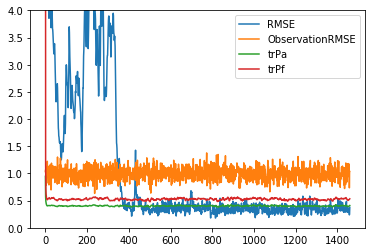

rmse 0.3509193463295585
trPa 0.4027611198064501
trPf 0.5272535311119946
<Jmin> 36.68399554187806


In [33]:

t = 1460
N = 40
m = 20
h = 0.05 
F = 8.0

#初期値
X0 = np.random.rand(N)
for j in range(500):
    X1 = Rungekutta4(X0,h,F)
    X0 = X1
Xac = X1

Xa = np.empty((N,m))
Xc = np.random.rand(N,m)*5.0
Xa = Xac.reshape(-1,1) + Xc
#plt.plot(Xa[:,9])
#plt.plot(Xa[:,8])
#plt.show()

dataset = pd.read_csv("observation_data2.csv")
Y = dataset.values.reshape(t,N)
dataset2 = pd.read_csv("data2.csv")
Xt = dataset2.values.reshape(t,N)
RMSE = []
TrPa = []
TrPf = []
A = []
B = []
Jmin = []
a = 0 # observation miss
b = 1.2 # inflation
trPa = []
trPf = []
R = []
Rf = []
R_ = []
RO = []
for k in range(t):
    mask = np.random.choice(40,a,replace=False)
    y_ =np.delete(Y[k],mask)
    
    (Xfc,Xf,Pf,dXf) = Forecast(Xac,Xa,m,b)
    (Xa,Pa,Xac,jmin) = Analysis(Xfc,Xf,dXf,y_,m,a,mask)
    #print(Xf)
    Jmin.append(jmin)
    
    rmse=np.zeros(m)
    rmsef = np.zeros(m)
    rmse_=0.0
    X1 = Xt[k]
    rmse = np.sqrt(np.sum((Xa-X1.reshape(-1,1))*(Xa-X1.reshape(-1,1)),axis=0)/N)
    rmsef = np.sqrt(np.sum((Xf-X1.reshape(-1,1))*(Xf-X1.reshape(-1,1)),axis=0)/N)
    rmse_ = np.sqrt(np.sum((Xac-X1)*(Xac-X1))/N) 
    Y1 = y_
    #X1 = H(Xt[k],mask)
    #X1 = H2(Xt[k],mask)
    X1 = H3(Xt[k],mask)
    rmseo = np.sqrt(np.sum((Y1-X1)*(Y1-X1))/(N-a))
    err = np.sqrt(np.sum(np.diag(Pa))/N)
    err2 = np.sqrt(np.sum(np.diag(Pf))/N)
    trPa.append(abs(err))
    trPf.append(abs(err2))
    R.append(rmse)
    Rf.append(rmsef)
    R_.append(rmse_)
    RO.append(rmseo)
    #if(k%100==0):
    #   print(k)
rb = np.sum(np.array(R_[500:]))/(t-500)
trPab = np.sum(np.array(trPa[500:]))/(t-500)
trPfb = np.sum(np.array(trPf[500:]))/(t-500)
RMSE.append(rb)
TrPa.append(trPab)
TrPf.append(trPfb)
plt.ylim([0.0,4.0])
plt.plot(R_,label="RMSE")
plt.plot(RO,label="ObservationRMSE")
plt.plot(trPa,label="trPa")
plt.plot(trPf,label="trPf")
plt.legend()
plt.savefig("MLEF_obs2.png")
plt.show()
print("rmse",np.mean(R_[500:]))
print("trPa",np.mean(trPa[500:]))
print("trPf",np.mean(trPf[500:]))
print("<Jmin>",np.mean(np.array(Jmin)))

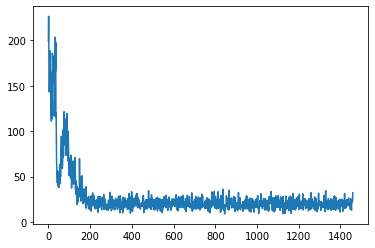

In [14]:
plt.plot(Jmin)

In [36]:
# 観測欠損実験
t = 1460
N = 40
m = 20
h = 0.05 
F = 8.0

#初期値
X0 = np.random.rand(N)
for j in range(500):
    X1 = Rungekutta4(X0,h,F)
    X0 = X1
Xac = X1

Xa = np.empty((N,m))
Xc = np.random.rand(N,m)*5.0
Xa = Xac.reshape(-1,1) + Xc
#plt.plot(Xa[:,9])
#plt.plot(Xa[:,8])
#plt.show()

dataset = pd.read_csv("observation_data2.csv")
Y = dataset.values.reshape(t,N)
dataset2 = pd.read_csv("data2.csv")
Xt = dataset2.values.reshape(t,N)
RMSE = []
TrPa = []
TrPf = []
A = []
B = []
Jmin = []
b = 1.1 # inflation
trPa = []
trPf = []
R = []
Rf = []
R_ = []
RO = []
for i in range(20):
    a = i # observation miss
    for k in range(t):
        mask = np.random.choice(40,a,replace=False)
        y_ =np.delete(Y[k],mask)
    
        (Xfc,Xf,Pf,dXf) = Forecast(Xac,Xa,m,b)
        (Xa,Pa,Xac,jmin) = Analysis(Xfc,Xf,dXf,y_,m,a,mask)
        #print(Xf)
        Jmin.append(jmin)
    
        rmse=np.zeros(m)
        rmsef = np.zeros(m)
        rmse_=0.0
        X1 = Xt[k]
        rmse = np.sqrt(np.sum((Xa-X1.reshape(-1,1))*(Xa-X1.reshape(-1,1)),axis=0)/N)
        rmsef = np.sqrt(np.sum((Xf-X1.reshape(-1,1))*(Xf-X1.reshape(-1,1)),axis=0)/N)
        rmse_ = np.sqrt(np.sum((Xac-X1)*(Xac-X1))/N) 
        Y1 = y_
        #X1 = H(Xt[k],mask)
        #X1 = H2(Xt[k],mask)
        X1 = H3(Xt[k],mask)
        rmseo = np.sqrt(np.sum((Y1-X1)*(Y1-X1))/(N-a))
        err = np.sqrt(np.sum(np.diag(Pa))/N)
        err2 = np.sqrt(np.sum(np.diag(Pf))/N)
        trPa.append(abs(err))
        trPf.append(abs(err2))
        R.append(rmse)
        Rf.append(rmsef)
        R_.append(rmse_)
        RO.append(rmseo)
        #if(k%100==0):
        #   print(k)
    rb = np.mean(np.array(R_[500:]))
    trPab = np.mean(np.array(trPa[500:]))
    trPfb = np.mean(np.array(trPf[500:]))
    RMSE.append(rb)
    TrPa.append(trPab)
    TrPf.append(trPfb)
    A.append(a)
    print("rmse",np.mean(R_[500:]))
    print("trPa",np.mean(trPa[500:]))
    print("trPf",np.mean(trPf[500:]))
    print("<Jmin>",np.mean(np.array(Jmin)))

         Current function value: 103.910782
         Iterations: 14
         Function evaluations: 128
         Gradient evaluations: 116
         Current function value: 121.135207
         Iterations: 8
         Function evaluations: 118
         Gradient evaluations: 106
Optimization terminated successfully.
         Current function value: 75.958883
         Iterations: 13
         Function evaluations: 15
         Gradient evaluations: 15
         Current function value: 75.285449
         Iterations: 7
         Function evaluations: 52
         Gradient evaluations: 41
         Current function value: 90.857931
         Iterations: 5
         Function evaluations: 98
         Gradient evaluations: 86
         Current function value: 70.036269
         Iterations: 6
         Function evaluations: 106
         Gradient evaluations: 94
         Current function value: 103.554042
         Iterations: 7
         Function evaluations: 90
         Gradient evaluations: 78
         Curre

Optimization terminated successfully.
         Current function value: 156.125637
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 190.581304
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 180.780164
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 164.243412
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 151.867811
         Iterations: 6
         Function evaluations: 80
         Gradient evaluations: 68
Optimization terminated successfully.
         Current function value: 142.274222
         Iterations: 12
         Function evaluations: 14
         Gradient evaluations: 14
O

Optimization terminated successfully.
         Current function value: 88.519310
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 64.259694
         Iterations: 5
         Function evaluations: 80
         Gradient evaluations: 68
Optimization terminated successfully.
         Current function value: 86.076938
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 64.704265
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 68.105848
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 68.109259
         Iterations: 9
         Function evaluations: 74
         Gradient evaluations: 62
Optimization terminated successfully.
        

         Current function value: 82.366170
         Iterations: 8
         Function evaluations: 88
         Gradient evaluations: 76
Optimization terminated successfully.
         Current function value: 89.331072
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 78.895862
         Iterations: 8
         Function evaluations: 85
         Gradient evaluations: 73
Optimization terminated successfully.
         Current function value: 132.287284
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 139.953885
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 105.881126
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 94.98

         Current function value: 169.110217
         Iterations: 6
         Function evaluations: 54
         Gradient evaluations: 43
Optimization terminated successfully.
         Current function value: 126.092532
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 113.622969
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 70.445071
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 87.554664
         Iterations: 6
         Function evaluations: 87
         Gradient evaluations: 75
Optimization terminated successfully.
         Current function value: 106.224908
         Iterations: 10
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
   

         Current function value: 121.837812
         Iterations: 8
         Function evaluations: 98
         Gradient evaluations: 86
Optimization terminated successfully.
         Current function value: 131.378244
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 129.029458
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 96.008468
         Iterations: 8
         Function evaluations: 92
         Gradient evaluations: 80
Optimization terminated successfully.
         Current function value: 80.930350
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 85.173976
         Iterations: 4
         Function evaluations: 92
         Gradient evaluations: 80
         Current function value: 77.583437
         Iterations: 8
         Func

         Current function value: 66.352629
         Iterations: 7
         Function evaluations: 71
         Gradient evaluations: 59
Optimization terminated successfully.
         Current function value: 43.689583
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 59.607366
         Iterations: 5
         Function evaluations: 98
         Gradient evaluations: 86
         Current function value: 79.129105
         Iterations: 4
         Function evaluations: 49
         Gradient evaluations: 38
         Current function value: 64.728554
         Iterations: 4
         Function evaluations: 108
         Gradient evaluations: 96
         Current function value: 80.113190
         Iterations: 5
         Function evaluations: 95
         Gradient evaluations: 83
Optimization terminated successfully.
         Current function value: 104.068974
         Iterations: 9
         Function evaluations: 10
         Gradient ev

Optimization terminated successfully.
         Current function value: 103.165926
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 120.019031
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 134.285946
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 152.890277
         Iterations: 11
         Function evaluations: 13
         Gradient evaluations: 13
         Current function value: 121.291508
         Iterations: 5
         Function evaluations: 44
         Gradient evaluations: 35
Optimization terminated successfully.
         Current function value: 98.237265
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Opt

Optimization terminated successfully.
         Current function value: 97.592155
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 92.641079
         Iterations: 5
         Function evaluations: 90
         Gradient evaluations: 78
Optimization terminated successfully.
         Current function value: 125.540430
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 137.660517
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 149.071568
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 139.137944
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
    

Optimization terminated successfully.
         Current function value: 151.211675
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 135.958351
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 121.768935
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 119.850557
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 111.586079
         Iterations: 4
         Function evaluations: 104
         Gradient evaluations: 92
Optimization terminated successfully.
         Current function value: 84.324967
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
        

         Current function value: 167.388129
         Iterations: 10
         Function evaluations: 91
         Gradient evaluations: 79
Optimization terminated successfully.
         Current function value: 127.904411
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 70.468580
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 89.959274
         Iterations: 6
         Function evaluations: 91
         Gradient evaluations: 79
Optimization terminated successfully.
         Current function value: 76.658997
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 76.564782
         Iterations: 5
         Function evaluations: 54
         Gradient evaluations: 42
Optimization terminated successfully.
         Current function value: 75.531480
    

         Current function value: 30.486454
         Iterations: 3
         Function evaluations: 101
         Gradient evaluations: 89
         Current function value: 25.446025
         Iterations: 7
         Function evaluations: 86
         Gradient evaluations: 74
Optimization terminated successfully.
         Current function value: 26.829598
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 21.195835
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 29.333480
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 28.091865
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Curr

Optimization terminated successfully.
         Current function value: 18.346590
         Iterations: 7
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 24.282991
         Iterations: 8
         Function evaluations: 68
         Gradient evaluations: 57
Optimization terminated successfully.
         Current function value: 21.912034
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 14.325281
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 19.559048
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 17.072794
         Iterations: 8
         Function evaluations: 79
         Gradient evaluations: 67
Optimization terminated successfully.
         Curre

         Current function value: 15.269162
         Iterations: 4
         Function evaluations: 107
         Gradient evaluations: 95
         Current function value: 13.715187
         Iterations: 5
         Function evaluations: 93
         Gradient evaluations: 81
         Current function value: 22.935617
         Iterations: 6
         Function evaluations: 62
         Gradient evaluations: 50
         Current function value: 26.395549
         Iterations: 6
         Function evaluations: 88
         Gradient evaluations: 76
         Current function value: 15.447084
         Iterations: 5
         Function evaluations: 98
         Gradient evaluations: 86
Optimization terminated successfully.
         Current function value: 14.014674
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 21.856465
         Iterations: 7
         Function evaluations: 62
         Gradient evaluations: 50
Optimization terminated

         Current function value: 19.270209
         Iterations: 7
         Function evaluations: 64
         Gradient evaluations: 53
         Current function value: 20.100298
         Iterations: 3
         Function evaluations: 101
         Gradient evaluations: 89
         Current function value: 15.855602
         Iterations: 5
         Function evaluations: 92
         Gradient evaluations: 80
         Current function value: 14.388659
         Iterations: 3
         Function evaluations: 107
         Gradient evaluations: 95
         Current function value: 19.230637
         Iterations: 6
         Function evaluations: 100
         Gradient evaluations: 88
         Current function value: 22.292917
         Iterations: 4
         Function evaluations: 50
         Gradient evaluations: 39
         Current function value: 18.921806
         Iterations: 7
         Function evaluations: 90
         Gradient evaluations: 78
         Current function value: 15.764705
         Iterati

         Current function value: 32.579620
         Iterations: 6
         Function evaluations: 89
         Gradient evaluations: 77
         Current function value: 15.945733
         Iterations: 2
         Function evaluations: 94
         Gradient evaluations: 82
         Current function value: 21.132681
         Iterations: 6
         Function evaluations: 90
         Gradient evaluations: 78
         Current function value: 17.731764
         Iterations: 4
         Function evaluations: 98
         Gradient evaluations: 86
         Current function value: 20.499861
         Iterations: 8
         Function evaluations: 83
         Gradient evaluations: 71
         Current function value: 21.434865
         Iterations: 5
         Function evaluations: 102
         Gradient evaluations: 90
         Current function value: 14.600864
         Iterations: 5
         Function evaluations: 94
         Gradient evaluations: 82
Optimization terminated successfully.
         Current functi

         Current function value: 15.097759
         Iterations: 4
         Function evaluations: 97
         Gradient evaluations: 85
         Current function value: 17.472786
         Iterations: 6
         Function evaluations: 114
         Gradient evaluations: 102
         Current function value: 11.090843
         Iterations: 5
         Function evaluations: 91
         Gradient evaluations: 79
Optimization terminated successfully.
         Current function value: 16.743480
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 18.767985
         Iterations: 2
         Function evaluations: 97
         Gradient evaluations: 85
         Current function value: 29.427562
         Iterations: 7
         Function evaluations: 58
         Gradient evaluations: 47
         Current function value: 27.549788
         Iterations: 8
         Function evaluations: 100
         Gradient evaluations: 88
Optimization terminated

         Current function value: 20.400057
         Iterations: 3
         Function evaluations: 54
         Gradient evaluations: 43
         Current function value: 17.387579
         Iterations: 5
         Function evaluations: 87
         Gradient evaluations: 75
Optimization terminated successfully.
         Current function value: 18.532698
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 20.484071
         Iterations: 3
         Function evaluations: 93
         Gradient evaluations: 81
Optimization terminated successfully.
         Current function value: 22.975412
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 15.720658
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 13.754491
       

         Current function value: 15.490122
         Iterations: 4
         Function evaluations: 86
         Gradient evaluations: 74
Optimization terminated successfully.
         Current function value: 25.293978
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 24.933146
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 13.829870
         Iterations: 3
         Function evaluations: 89
         Gradient evaluations: 77
         Current function value: 15.831378
         Iterations: 4
         Function evaluations: 87
         Gradient evaluations: 75
         Current function value: 17.231221
         Iterations: 5
         Function evaluations: 55
         Gradient evaluations: 44
Optimization terminated successfully.
         Current function value: 25.655805
         Iterations: 7
         Function ev

Optimization terminated successfully.
         Current function value: 20.088642
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 19.626186
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 9.867055
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 19.350791
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 12.333905
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 22.416555
         Iterations: 8
         Function evaluations: 9
         

         Current function value: 21.058818
         Iterations: 4
         Function evaluations: 99
         Gradient evaluations: 87
         Current function value: 21.844152
         Iterations: 6
         Function evaluations: 96
         Gradient evaluations: 84
         Current function value: 20.999826
         Iterations: 6
         Function evaluations: 94
         Gradient evaluations: 82
Optimization terminated successfully.
         Current function value: 15.179810
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 15.089909
         Iterations: 5
         Function evaluations: 91
         Gradient evaluations: 79
Optimization terminated successfully.
         Current function value: 25.002417
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 19.740699
         Iterations: 11
         Function evaluations: 104
         Gradient ev

         Current function value: 15.327939
         Iterations: 6
         Function evaluations: 83
         Gradient evaluations: 71
         Current function value: 15.866861
         Iterations: 4
         Function evaluations: 98
         Gradient evaluations: 86
Optimization terminated successfully.
         Current function value: 18.400114
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 12.709645
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 18.526467
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 26.950270
         Iterations: 5
         Function evaluations: 130
         Gradient evaluations: 117
Optimization terminated successfully.
         Current function value: 18.820864
     

         Current function value: 21.263630
         Iterations: 3
         Function evaluations: 110
         Gradient evaluations: 98
Optimization terminated successfully.
         Current function value: 26.815581
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 11.870244
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
         Current function value: 16.496485
         Iterations: 5
         Function evaluations: 75
         Gradient evaluations: 63
         Current function value: 25.290948
         Iterations: 6
         Function evaluations: 96
         Gradient evaluations: 84
         Current function value: 14.880086
         Iterations: 4
         Function evaluations: 79
         Gradient evaluations: 67
         Current function value: 15.973504
         Iterations: 6
         Function evaluations: 70
         Gradient evalu

         Current function value: 16.457470
         Iterations: 5
         Function evaluations: 105
         Gradient evaluations: 93
         Current function value: 21.286527
         Iterations: 6
         Function evaluations: 91
         Gradient evaluations: 79
         Current function value: 21.026215
         Iterations: 6
         Function evaluations: 91
         Gradient evaluations: 79
Optimization terminated successfully.
         Current function value: 25.110366
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 20.397318
         Iterations: 7
         Function evaluations: 91
         Gradient evaluations: 79
         Current function value: 17.405689
         Iterations: 4
         Function evaluations: 84
         Gradient evaluations: 72
         Current function value: 10.532913
         Iterations: 6
         Function evaluations: 70
         Gradient evaluations: 58
         Current function

         Current function value: 15.343236
         Iterations: 6
         Function evaluations: 93
         Gradient evaluations: 81
Optimization terminated successfully.
         Current function value: 19.215730
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
         Current function value: 20.018801
         Iterations: 3
         Function evaluations: 99
         Gradient evaluations: 87
Optimization terminated successfully.
         Current function value: 11.003413
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
         Current function value: 11.908227
         Iterations: 3
         Function evaluations: 92
         Gradient evaluations: 80
         Current function value: 12.142968
         Iterations: 3
         Function evaluations: 98
         Gradient evaluations: 86
         Current function value: 18.940894
         Iterations: 3
         Function evaluations: 88
         Gradient evalua

Optimization terminated successfully.
         Current function value: 33.957574
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 19.271818
         Iterations: 8
         Function evaluations: 12
         Gradient evaluations: 12
         Current function value: 18.131034
         Iterations: 5
         Function evaluations: 86
         Gradient evaluations: 74
Optimization terminated successfully.
         Current function value: 19.313774
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 14.659667
         Iterations: 5
         Function evaluations: 77
         Gradient evaluations: 65
Optimization terminated successfully.
         Current function value: 20.899021
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 18.033825
       

         Current function value: 11.496550
         Iterations: 4
         Function evaluations: 108
         Gradient evaluations: 96
         Current function value: 12.804839
         Iterations: 3
         Function evaluations: 88
         Gradient evaluations: 76
         Current function value: 21.784541
         Iterations: 7
         Function evaluations: 82
         Gradient evaluations: 70
Optimization terminated successfully.
         Current function value: 15.460950
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 18.271195
         Iterations: 4
         Function evaluations: 52
         Gradient evaluations: 40
         Current function value: 14.760594
         Iterations: 4
         Function evaluations: 99
         Gradient evaluations: 87
         Current function value: 19.755989
         Iterations: 5
         Function evaluations: 95
         Gradient evaluations: 83
Optimization terminated s

         Current function value: 20.942642
         Iterations: 5
         Function evaluations: 105
         Gradient evaluations: 93
         Current function value: 21.484429
         Iterations: 3
         Function evaluations: 109
         Gradient evaluations: 97
Optimization terminated successfully.
         Current function value: 21.878818
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
         Current function value: 21.802673
         Iterations: 6
         Function evaluations: 107
         Gradient evaluations: 95
Optimization terminated successfully.
         Current function value: 19.697686
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 15.261515
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 21.868740
    

         Current function value: 18.101326
         Iterations: 5
         Function evaluations: 85
         Gradient evaluations: 73
         Current function value: 15.380327
         Iterations: 4
         Function evaluations: 100
         Gradient evaluations: 88
         Current function value: 17.455603
         Iterations: 3
         Function evaluations: 99
         Gradient evaluations: 87
         Current function value: 26.295851
         Iterations: 4
         Function evaluations: 106
         Gradient evaluations: 94
Optimization terminated successfully.
         Current function value: 21.043081
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 22.155285
         Iterations: 5
         Function evaluations: 87
         Gradient evaluations: 75
Optimization terminated successfully.
         Current function value: 26.595135
         Iterations: 8
         Function evaluations: 9
         Gradient eva

         Current function value: 12.673994
         Iterations: 6
         Function evaluations: 110
         Gradient evaluations: 98
Optimization terminated successfully.
         Current function value: 18.940036
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 20.897256
         Iterations: 6
         Function evaluations: 56
         Gradient evaluations: 45
Optimization terminated successfully.
         Current function value: 21.735966
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 17.216082
         Iterations: 4
         Function evaluations: 98
         Gradient evaluations: 86
Optimization terminated successfully.
         Current function value: 23.539613
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 15.863476
      

         Current function value: 21.694121
         Iterations: 6
         Function evaluations: 97
         Gradient evaluations: 85
         Current function value: 15.826692
         Iterations: 7
         Function evaluations: 97
         Gradient evaluations: 85
         Current function value: 17.884355
         Iterations: 5
         Function evaluations: 83
         Gradient evaluations: 71
         Current function value: 18.355388
         Iterations: 4
         Function evaluations: 91
         Gradient evaluations: 79
Optimization terminated successfully.
         Current function value: 15.938753
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 16.491152
         Iterations: 6
         Function evaluations: 100
         Gradient evaluations: 88
Optimization terminated successfully.
         Current function value: 19.159849
         Iterations: 8
         Function evaluations: 9
         Gradient eval

         Current function value: 158.929679
         Iterations: 3
         Function evaluations: 108
         Gradient evaluations: 96
         Current function value: 186.793609
         Iterations: 6
         Function evaluations: 90
         Gradient evaluations: 78
Optimization terminated successfully.
         Current function value: 112.500468
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 166.544127
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 142.789064
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 159.935788
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.


         Current function value: 124.756785
         Iterations: 8
         Function evaluations: 87
         Gradient evaluations: 75
         Current function value: 117.407111
         Iterations: 9
         Function evaluations: 78
         Gradient evaluations: 66
Optimization terminated successfully.
         Current function value: 128.209742
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 90.544107
         Iterations: 5
         Function evaluations: 97
         Gradient evaluations: 85
Optimization terminated successfully.
         Current function value: 138.683546
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 85.851352
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 101.75

         Current function value: 38.638815
         Iterations: 4
         Function evaluations: 66
         Gradient evaluations: 54
Optimization terminated successfully.
         Current function value: 41.901611
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 32.491252
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 31.621498
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
         Current function value: 47.593008
         Iterations: 6
         Function evaluations: 80
         Gradient evaluations: 68
         Current function value: 36.207303
         Iterations: 7
         Function evaluations: 92
         Gradient evaluations: 80
Optimization terminated successfully.
         Current function value: 37.883709
       

Optimization terminated successfully.
         Current function value: 23.718685
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 17.762161
         Iterations: 5
         Function evaluations: 82
         Gradient evaluations: 70
         Current function value: 23.616911
         Iterations: 6
         Function evaluations: 62
         Gradient evaluations: 51
         Current function value: 15.882543
         Iterations: 6
         Function evaluations: 84
         Gradient evaluations: 72
Optimization terminated successfully.
         Current function value: 10.893780
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 19.039659
         Iterations: 7
         Function evaluations: 92
         Gradient evaluations: 80
Optimization terminated successfully.
         Current function value: 19.505955
         Iterations: 8
         Function ev

         Current function value: 13.984498
         Iterations: 5
         Function evaluations: 55
         Gradient evaluations: 43
Optimization terminated successfully.
         Current function value: 22.712696
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 18.119684
         Iterations: 3
         Function evaluations: 90
         Gradient evaluations: 78
Optimization terminated successfully.
         Current function value: 19.723365
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 14.463124
         Iterations: 3
         Function evaluations: 110
         Gradient evaluations: 98
         Current function value: 14.351147
         Iterations: 4
         Function evaluations: 113
         Gradient evaluations: 101
Optimization terminated successfully.
         Current function value: 21.383073
         Iterations: 8
         Function

         Iterations: 6
         Function evaluations: 95
         Gradient evaluations: 83
Optimization terminated successfully.
         Current function value: 31.970922
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 25.459467
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 18.902659
         Iterations: 6
         Function evaluations: 93
         Gradient evaluations: 81
         Current function value: 25.741870
         Iterations: 5
         Function evaluations: 66
         Gradient evaluations: 55
         Current function value: 20.765444
         Iterations: 9
         Function evaluations: 101
         Gradient evaluations: 89
         Current function value: 23.440963
         Iterations: 5
         Function evaluations: 62
         Gradient evaluations: 50
         Current function 

         Current function value: 18.122620
         Iterations: 3
         Function evaluations: 104
         Gradient evaluations: 92
Optimization terminated successfully.
         Current function value: 18.106627
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 20.312427
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
         Current function value: 17.072506
         Iterations: 2
         Function evaluations: 95
         Gradient evaluations: 83
Optimization terminated successfully.
         Current function value: 12.752222
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 14.795779
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
         Current function value: 14.002973
     

         Current function value: 25.196112
         Iterations: 5
         Function evaluations: 92
         Gradient evaluations: 80
         Current function value: 15.270980
         Iterations: 5
         Function evaluations: 89
         Gradient evaluations: 77
Optimization terminated successfully.
         Current function value: 12.304375
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 21.746635
         Iterations: 6
         Function evaluations: 75
         Gradient evaluations: 63
         Current function value: 12.634735
         Iterations: 4
         Function evaluations: 87
         Gradient evaluations: 75
         Current function value: 20.335126
         Iterations: 5
         Function evaluations: 83
         Gradient evaluations: 71
Optimization terminated successfully.
         Current function value: 23.474890
         Iterations: 8
         Function evaluations: 9
         Gradient evalu

         Current function value: 21.339924
         Iterations: 4
         Function evaluations: 104
         Gradient evaluations: 92
         Current function value: 15.779637
         Iterations: 6
         Function evaluations: 89
         Gradient evaluations: 77
         Current function value: 16.189756
         Iterations: 11
         Function evaluations: 103
         Gradient evaluations: 91
Optimization terminated successfully.
         Current function value: 17.596065
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 18.519725
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 19.822416
         Iterations: 3
         Function evaluations: 105
         Gradient evaluations: 93
Optimization terminated successfully.
         Current function value: 16.290870
         Iterations: 7
         Functio

         Current function value: 12.124641
         Iterations: 6
         Function evaluations: 92
         Gradient evaluations: 80
         Current function value: 19.610009
         Iterations: 4
         Function evaluations: 78
         Gradient evaluations: 66
Optimization terminated successfully.
         Current function value: 15.499383
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 16.208151
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 15.238099
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 12.757128
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Curre

         Current function value: 20.448502
         Iterations: 7
         Function evaluations: 90
         Gradient evaluations: 78
         Current function value: 21.889707
         Iterations: 7
         Function evaluations: 78
         Gradient evaluations: 66
Optimization terminated successfully.
         Current function value: 12.297630
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 26.814034
         Iterations: 2
         Function evaluations: 99
         Gradient evaluations: 87
         Current function value: 22.943138
         Iterations: 5
         Function evaluations: 87
         Gradient evaluations: 75
         Current function value: 21.508667
         Iterations: 6
         Function evaluations: 85
         Gradient evaluations: 73
Optimization terminated successfully.
         Current function value: 22.648573
         Iterations: 6
         Function evaluations: 7
         Gradient eva

         Current function value: 15.727939
         Iterations: 6
         Function evaluations: 63
         Gradient evaluations: 52
         Current function value: 19.704551
         Iterations: 4
         Function evaluations: 74
         Gradient evaluations: 62
Optimization terminated successfully.
         Current function value: 21.068948
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 19.975787
         Iterations: 4
         Function evaluations: 89
         Gradient evaluations: 77
         Current function value: 18.011254
         Iterations: 11
         Function evaluations: 104
         Gradient evaluations: 92
         Current function value: 14.606468
         Iterations: 6
         Function evaluations: 76
         Gradient evaluations: 64
         Current function value: 17.799306
         Iterations: 3
         Function evaluations: 98
         Gradient evaluations: 86
         Current functio

         Current function value: 20.648822
         Iterations: 4
         Function evaluations: 94
         Gradient evaluations: 82
Optimization terminated successfully.
         Current function value: 14.699150
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 19.372748
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 22.584278
         Iterations: 4
         Function evaluations: 101
         Gradient evaluations: 89
Optimization terminated successfully.
         Current function value: 25.604241
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 20.871555
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 21.143408
        

Optimization terminated successfully.
         Current function value: 17.595109
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 15.327239
         Iterations: 5
         Function evaluations: 101
         Gradient evaluations: 89
         Current function value: 20.957032
         Iterations: 3
         Function evaluations: 99
         Gradient evaluations: 87
         Current function value: 13.836602
         Iterations: 4
         Function evaluations: 101
         Gradient evaluations: 89
Optimization terminated successfully.
         Current function value: 21.468911
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 15.320278
         Iterations: 6
         Function evaluations: 93
         Gradient evaluations: 81
Optimization terminated successfully.
         Current function value: 15.778926
         Iterations: 8
         Functio

         Current function value: 20.958532
         Iterations: 4
         Function evaluations: 92
         Gradient evaluations: 80
         Current function value: 21.884903
         Iterations: 6
         Function evaluations: 99
         Gradient evaluations: 87
Optimization terminated successfully.
         Current function value: 20.942163
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 15.778461
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 14.751038
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 19.913718
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 15.747887
         

         Current function value: 23.080526
         Iterations: 5
         Function evaluations: 96
         Gradient evaluations: 84
         Current function value: 22.885749
         Iterations: 3
         Function evaluations: 106
         Gradient evaluations: 94
Optimization terminated successfully.
         Current function value: 21.318516
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 14.777267
         Iterations: 5
         Function evaluations: 96
         Gradient evaluations: 84
Optimization terminated successfully.
         Current function value: 16.424877
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 16.715944
         Iterations: 7
         Function evaluations: 78
         Gradient evaluations: 66
Optimization terminated successfully.
         Current function value: 15.808338
         Iterations: 8
         Function e

         Current function value: 15.378010
         Iterations: 4
         Function evaluations: 85
         Gradient evaluations: 73
         Current function value: 21.874052
         Iterations: 4
         Function evaluations: 94
         Gradient evaluations: 82
Optimization terminated successfully.
         Current function value: 18.655917
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 24.193497
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
         Current function value: 22.994842
         Iterations: 2
         Function evaluations: 94
         Gradient evaluations: 82
Optimization terminated successfully.
         Current function value: 18.524801
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 21.224103
         Iterations: 2
         Function eval

Optimization terminated successfully.
         Current function value: 19.855041
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 12.151085
         Iterations: 2
         Function evaluations: 104
         Gradient evaluations: 92
         Current function value: 20.386959
         Iterations: 7
         Function evaluations: 89
         Gradient evaluations: 77
Optimization terminated successfully.
         Current function value: 12.216074
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
         Current function value: 12.211929
         Iterations: 5
         Function evaluations: 99
         Gradient evaluations: 87
Optimization terminated successfully.
         Current function value: 13.795471
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
         Current function value: 18.008415
         Iterations: 2
         Function eva

         Current function value: 27.255726
         Iterations: 4
         Function evaluations: 117
         Gradient evaluations: 105
         Current function value: 15.978352
         Iterations: 7
         Function evaluations: 72
         Gradient evaluations: 60
         Current function value: 19.879411
         Iterations: 5
         Function evaluations: 101
         Gradient evaluations: 89
         Current function value: 20.712799
         Iterations: 5
         Function evaluations: 94
         Gradient evaluations: 82
         Current function value: 20.540990
         Iterations: 2
         Function evaluations: 106
         Gradient evaluations: 94
         Current function value: 13.793274
         Iterations: 5
         Function evaluations: 101
         Gradient evaluations: 89
         Current function value: 15.850551
         Iterations: 4
         Function evaluations: 109
         Gradient evaluations: 97
Optimization terminated successfully.
         Current f

         Current function value: 16.905064
         Iterations: 4
         Function evaluations: 76
         Gradient evaluations: 64
         Current function value: 14.845685
         Iterations: 7
         Function evaluations: 50
         Gradient evaluations: 39
         Current function value: 23.208838
         Iterations: 7
         Function evaluations: 89
         Gradient evaluations: 77
Optimization terminated successfully.
         Current function value: 18.901661
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 19.136433
         Iterations: 4
         Function evaluations: 85
         Gradient evaluations: 73
         Current function value: 28.125686
         Iterations: 4
         Function evaluations: 108
         Gradient evaluations: 96
         Current function value: 20.699170
         Iterations: 4
         Function evaluations: 109
         Gradient evaluations: 97
         Current functio

         Current function value: 13.354899
         Iterations: 6
         Function evaluations: 73
         Gradient evaluations: 61
Optimization terminated successfully.
         Current function value: 21.087033
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 17.986728
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 16.670208
         Iterations: 3
         Function evaluations: 102
         Gradient evaluations: 90
         Current function value: 16.531114
         Iterations: 5
         Function evaluations: 102
         Gradient evaluations: 90
Optimization terminated successfully.
         Current function value: 12.458339
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 15.376311
     

         Current function value: 18.576812
         Iterations: 9
         Function evaluations: 89
         Gradient evaluations: 77
Optimization terminated successfully.
         Current function value: 17.239905
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 17.132497
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 29.176651
         Iterations: 7
         Function evaluations: 70
         Gradient evaluations: 58
         Current function value: 23.893958
         Iterations: 9
         Function evaluations: 100
         Gradient evaluations: 88
         Current function value: 13.802160
         Iterations: 6
         Function evaluations: 90
         Gradient evaluations: 78
         Current function value: 16.310927
         Iterations: 9
         Function evaluations: 95
         Gradient eva

         Current function value: 12.116773
         Iterations: 7
         Function evaluations: 96
         Gradient evaluations: 84
         Current function value: 16.612147
         Iterations: 5
         Function evaluations: 86
         Gradient evaluations: 74
         Current function value: 20.732895
         Iterations: 8
         Function evaluations: 96
         Gradient evaluations: 84
Optimization terminated successfully.
         Current function value: 18.581242
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 14.419854
         Iterations: 5
         Function evaluations: 100
         Gradient evaluations: 88
         Current function value: 11.841060
         Iterations: 5
         Function evaluations: 90
         Gradient evaluations: 78
Optimization terminated successfully.
         Current function value: 15.710707
         Iterations: 11
         Function evaluations: 13
         Gradient ev

         Current function value: 19.539419
         Iterations: 8
         Function evaluations: 103
         Gradient evaluations: 91
         Current function value: 18.463891
         Iterations: 4
         Function evaluations: 104
         Gradient evaluations: 92
Optimization terminated successfully.
         Current function value: 23.602246
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 24.047094
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 21.327349
         Iterations: 6
         Function evaluations: 109
         Gradient evaluations: 97
         Current function value: 23.274536
         Iterations: 4
         Function evaluations: 98
         Gradient evaluations: 86
         Current function value: 16.604364
         Iterations: 6
         Function evaluations: 79
         Gradient e

         Current function value: 16.091577
         Iterations: 7
         Function evaluations: 83
         Gradient evaluations: 71
         Current function value: 10.976137
         Iterations: 2
         Function evaluations: 99
         Gradient evaluations: 87
         Current function value: 19.427940
         Iterations: 4
         Function evaluations: 107
         Gradient evaluations: 95
Optimization terminated successfully.
         Current function value: 22.498428
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
         Current function value: 14.851264
         Iterations: 4
         Function evaluations: 110
         Gradient evaluations: 98
         Current function value: 20.403529
         Iterations: 4
         Function evaluations: 59
         Gradient evaluations: 48
         Current function value: 23.672810
         Iterations: 2
         Function evaluations: 98
         Gradient evaluations: 86
         Current functio

         Current function value: 25.971374
         Iterations: 6
         Function evaluations: 82
         Gradient evaluations: 70
         Current function value: 18.411541
         Iterations: 9
         Function evaluations: 88
         Gradient evaluations: 76
Optimization terminated successfully.
         Current function value: 14.810238
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 12.910399
         Iterations: 6
         Function evaluations: 85
         Gradient evaluations: 73
         Current function value: 18.074993
         Iterations: 8
         Function evaluations: 106
         Gradient evaluations: 94
Optimization terminated successfully.
         Current function value: 22.271305
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 20.599713
         Iterations: 2
         Function evaluations: 96
         Gradient evalu

         Current function value: 26.007319
         Iterations: 7
         Function evaluations: 82
         Gradient evaluations: 70
Optimization terminated successfully.
         Current function value: 11.913146
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
         Current function value: 25.079403
         Iterations: 4
         Function evaluations: 91
         Gradient evaluations: 79
         Current function value: 16.554665
         Iterations: 3
         Function evaluations: 86
         Gradient evaluations: 74
         Current function value: 18.838773
         Iterations: 4
         Function evaluations: 104
         Gradient evaluations: 92
Optimization terminated successfully.
         Current function value: 13.695241
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 20.472336
         Iterations: 11
         Functio

         Current function value: 22.897239
         Iterations: 6
         Function evaluations: 97
         Gradient evaluations: 85
         Current function value: 13.708438
         Iterations: 8
         Function evaluations: 62
         Gradient evaluations: 50
         Current function value: 17.474922
         Iterations: 5
         Function evaluations: 109
         Gradient evaluations: 97
         Current function value: 18.823947
         Iterations: 6
         Function evaluations: 103
         Gradient evaluations: 91
         Current function value: 16.948981
         Iterations: 5
         Function evaluations: 91
         Gradient evaluations: 79
         Current function value: 15.549400
         Iterations: 6
         Function evaluations: 79
         Gradient evaluations: 67
Optimization terminated successfully.
         Current function value: 16.104765
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated 

         Current function value: 16.890561
         Iterations: 5
         Function evaluations: 85
         Gradient evaluations: 73
         Current function value: 25.000469
         Iterations: 3
         Function evaluations: 104
         Gradient evaluations: 92
Optimization terminated successfully.
         Current function value: 17.827468
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 19.399346
         Iterations: 4
         Function evaluations: 101
         Gradient evaluations: 89
         Current function value: 19.160479
         Iterations: 5
         Function evaluations: 65
         Gradient evaluations: 53
Optimization terminated successfully.
         Current function value: 21.827580
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
         Current function value: 25.520847
         Iterations: 5
         Function evaluations: 90
         Gradient e

Optimization terminated successfully.
         Current function value: 25.622596
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 12.777351
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 23.567695
         Iterations: 8
         Function evaluations: 73
         Gradient evaluations: 61
         Current function value: 21.423324
         Iterations: 5
         Function evaluations: 88
         Gradient evaluations: 76
Optimization terminated successfully.
         Current function value: 12.943882
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
         Current function value: 10.432377
         Iterations: 5
         Function evaluations: 92
         Gradient evaluations: 80
Optimization terminated successfully.
         Current function value: 19.688654
       

         Current function value: 13.546968
         Iterations: 5
         Function evaluations: 91
         Gradient evaluations: 79
         Current function value: 17.942237
         Iterations: 6
         Function evaluations: 80
         Gradient evaluations: 68
         Current function value: 17.058571
         Iterations: 6
         Function evaluations: 86
         Gradient evaluations: 74
Optimization terminated successfully.
         Current function value: 26.338069
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 18.985579
         Iterations: 6
         Function evaluations: 93
         Gradient evaluations: 81
Optimization terminated successfully.
         Current function value: 14.649138
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 24.004749
         Iterations: 8
         Function evaluations: 105
         Gradient evalu

Optimization terminated successfully.
         Current function value: 189.178490
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 137.370716
         Iterations: 6
         Function evaluations: 96
         Gradient evaluations: 84
Optimization terminated successfully.
         Current function value: 131.857115
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 156.955968
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 140.206738
         Iterations: 9
         Function evaluations: 76
         Gradient evaluations: 65
Optimization terminated successfully.
         Current function value: 96.924955
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
    

         Current function value: 174.739330
         Iterations: 8
         Function evaluations: 85
         Gradient evaluations: 73
         Current function value: 152.007105
         Iterations: 4
         Function evaluations: 48
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 154.380620
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 149.694107
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 204.156590
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 178.974412
         Iterations: 3
         Function evaluations: 95
         Gradient evaluations: 83
Optimization terminated successfully.
         Current function value: 192.

         Current function value: 123.089789
         Iterations: 11
         Function evaluations: 72
         Gradient evaluations: 60
Optimization terminated successfully.
         Current function value: 147.778351
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 139.563951
         Iterations: 10
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 156.248265
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 198.528673
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 247.421974
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations

Optimization terminated successfully.
         Current function value: 81.178480
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 58.725272
         Iterations: 3
         Function evaluations: 102
         Gradient evaluations: 90
Optimization terminated successfully.
         Current function value: 64.505672
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
         Current function value: 60.738804
         Iterations: 4
         Function evaluations: 94
         Gradient evaluations: 82
Optimization terminated successfully.
         Current function value: 74.374589
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 62.112557
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 76.212308
  

         Current function value: 160.212611
         Iterations: 6
         Function evaluations: 93
         Gradient evaluations: 81
Optimization terminated successfully.
         Current function value: 105.889132
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 92.266164
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 87.098432
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 92.339306
         Iterations: 4
         Function evaluations: 60
         Gradient evaluations: 49
         Current function value: 70.108935
         Iterations: 6
         Function evaluations: 65
         Gradient evaluations: 54
         Current function value: 94.856158
         Iterations: 6
         Fun

         Current function value: 78.926230
         Iterations: 9
         Function evaluations: 83
         Gradient evaluations: 71
Optimization terminated successfully.
         Current function value: 97.425833
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 101.820674
         Iterations: 5
         Function evaluations: 79
         Gradient evaluations: 67
         Current function value: 113.402500
         Iterations: 8
         Function evaluations: 73
         Gradient evaluations: 61
         Current function value: 142.126169
         Iterations: 7
         Function evaluations: 103
         Gradient evaluations: 91
         Current function value: 128.403281
         Iterations: 5
         Function evaluations: 79
         Gradient evaluations: 67
Optimization terminated successfully.
         Current function value: 125.232839
         Iterations: 10
         Function evaluations: 11
         Gradie

         Current function value: 79.058278
         Iterations: 7
         Function evaluations: 83
         Gradient evaluations: 71
Optimization terminated successfully.
         Current function value: 60.741304
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 54.028666
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 45.511711
         Iterations: 4
         Function evaluations: 88
         Gradient evaluations: 76
Optimization terminated successfully.
         Current function value: 67.561069
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 37.934784
         Iterations: 6
         Function evaluations: 175
         Gradient evaluations: 163
Optimization terminated successfully.
         Current function value: 57.571166
   

         Current function value: 40.128817
         Iterations: 5
         Function evaluations: 88
         Gradient evaluations: 76
         Current function value: 54.152772
         Iterations: 4
         Function evaluations: 99
         Gradient evaluations: 87
         Current function value: 60.883710
         Iterations: 6
         Function evaluations: 102
         Gradient evaluations: 90
Optimization terminated successfully.
         Current function value: 36.040438
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 50.229249
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 59.749361
         Iterations: 4
         Function evaluations: 104
         Gradient evaluations: 92
Optimization terminated successfully.
         Current function value: 46.244263
         Iterations: 10
         Functi

         Current function value: 25.949676
         Iterations: 3
         Function evaluations: 107
         Gradient evaluations: 95
Optimization terminated successfully.
         Current function value: 23.579689
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 13.882254
         Iterations: 6
         Function evaluations: 77
         Gradient evaluations: 65
Optimization terminated successfully.
         Current function value: 22.084233
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 21.189039
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 31.120689
         Iterations: 9
         Function evaluations: 106
         Gradient evaluations: 94
         Current function value: 19.443519
         Iterations: 4
         Function 

         Current function value: 22.131532
         Iterations: 5
         Function evaluations: 98
         Gradient evaluations: 86
Optimization terminated successfully.
         Current function value: 15.496806
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 20.434764
         Iterations: 2
         Function evaluations: 99
         Gradient evaluations: 87
         Current function value: 12.710622
         Iterations: 4
         Function evaluations: 96
         Gradient evaluations: 84
Optimization terminated successfully.
         Current function value: 22.106671
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 14.720388
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 16.048899
         Iterations: 5
         Function eval

         Iterations: 3
         Function evaluations: 89
         Gradient evaluations: 77
         Current function value: 19.873696
         Iterations: 7
         Function evaluations: 97
         Gradient evaluations: 85
Optimization terminated successfully.
         Current function value: 11.524468
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 27.170423
         Iterations: 4
         Function evaluations: 112
         Gradient evaluations: 100
         Current function value: 21.613067
         Iterations: 5
         Function evaluations: 84
         Gradient evaluations: 72
         Current function value: 19.590229
         Iterations: 7
         Function evaluations: 110
         Gradient evaluations: 98
Optimization terminated successfully.
         Current function value: 23.302239
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated succes

         Current function value: 19.386567
         Iterations: 4
         Function evaluations: 95
         Gradient evaluations: 83
         Current function value: 18.043614
         Iterations: 6
         Function evaluations: 94
         Gradient evaluations: 82
Optimization terminated successfully.
         Current function value: 13.958508
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 16.128532
         Iterations: 4
         Function evaluations: 89
         Gradient evaluations: 77
         Current function value: 18.854791
         Iterations: 3
         Function evaluations: 98
         Gradient evaluations: 86
Optimization terminated successfully.
         Current function value: 17.529971
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 20.313179
         Iterations: 9
         Function ev

         Current function value: 22.362161
         Iterations: 4
         Function evaluations: 89
         Gradient evaluations: 77
Optimization terminated successfully.
         Current function value: 24.113643
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 21.406736
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 21.204845
         Iterations: 5
         Function evaluations: 98
         Gradient evaluations: 86
Optimization terminated successfully.
         Current function value: 20.982907
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 17.909774
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 19.648548
         

         Current function value: 21.621334
         Iterations: 3
         Function evaluations: 96
         Gradient evaluations: 84
         Current function value: 13.908427
         Iterations: 5
         Function evaluations: 113
         Gradient evaluations: 101
Optimization terminated successfully.
         Current function value: 22.209502
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 13.652812
         Iterations: 5
         Function evaluations: 93
         Gradient evaluations: 81
Optimization terminated successfully.
         Current function value: 15.601546
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 12.294773
         Iterations: 3
         Function evaluations: 59
         Gradient evaluations: 48
         Current function value: 25.023302
         Iterations: 7
         Function evaluations: 103
         Gradient eva

         Current function value: 25.020992
         Iterations: 6
         Function evaluations: 109
         Gradient evaluations: 97
         Current function value: 22.107603
         Iterations: 4
         Function evaluations: 102
         Gradient evaluations: 90
         Current function value: 20.285502
         Iterations: 5
         Function evaluations: 96
         Gradient evaluations: 84
         Current function value: 21.242000
         Iterations: 3
         Function evaluations: 98
         Gradient evaluations: 86
Optimization terminated successfully.
         Current function value: 22.310445
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 15.647877
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 15.194339
         Iterations: 7
         Function 

         Gradient evaluations: 64
         Current function value: 17.863077
         Iterations: 4
         Function evaluations: 84
         Gradient evaluations: 72
         Current function value: 24.059332
         Iterations: 7
         Function evaluations: 101
         Gradient evaluations: 89
         Current function value: 20.469621
         Iterations: 5
         Function evaluations: 89
         Gradient evaluations: 77
         Current function value: 20.915283
         Iterations: 6
         Function evaluations: 87
         Gradient evaluations: 75
         Current function value: 16.783433
         Iterations: 6
         Function evaluations: 78
         Gradient evaluations: 66
Optimization terminated successfully.
         Current function value: 15.557456
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 15.791200
         Iterations: 5
         Function evaluations: 101
         Gradient evalua

         Current function value: 34.672843
         Iterations: 7
         Function evaluations: 113
         Gradient evaluations: 101
         Current function value: 10.237595
         Iterations: 5
         Function evaluations: 92
         Gradient evaluations: 80
         Current function value: 16.179647
         Iterations: 5
         Function evaluations: 80
         Gradient evaluations: 68
Optimization terminated successfully.
         Current function value: 22.696911
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 15.106198
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 16.256192
         Iterations: 3
         Function evaluations: 92
         Gradient evaluations: 80
         Current function value: 20.761031
         Iterations: 3
         Function evaluations: 106
         Gradient eva

         Current function value: 10.960048
         Iterations: 8
         Function evaluations: 67
         Gradient evaluations: 55
         Current function value: 33.319533
         Iterations: 6
         Function evaluations: 55
         Gradient evaluations: 44
         Current function value: 17.820530
         Iterations: 7
         Function evaluations: 95
         Gradient evaluations: 83
Optimization terminated successfully.
         Current function value: 12.711855
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 21.475912
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 11.778748
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 12.077769
         Iterations: 8
         Function eval

         Current function value: 22.665788
         Iterations: 3
         Function evaluations: 94
         Gradient evaluations: 82
Optimization terminated successfully.
         Current function value: 31.200885
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 21.108370
         Iterations: 4
         Function evaluations: 101
         Gradient evaluations: 89
         Current function value: 15.522232
         Iterations: 2
         Function evaluations: 61
         Gradient evaluations: 51
         Current function value: 13.894283
         Iterations: 4
         Function evaluations: 103
         Gradient evaluations: 91
         Current function value: 26.066723
         Iterations: 8
         Function evaluations: 81
         Gradient evaluations: 69
         Current function value: 20.450779
         Iterations: 4
         Function evaluations: 99
         Gradient evaluations: 87
         Current functio

         Current function value: 19.151439
         Iterations: 7
         Function evaluations: 108
         Gradient evaluations: 96
         Current function value: 15.959879
         Iterations: 5
         Function evaluations: 98
         Gradient evaluations: 86
         Current function value: 15.259754
         Iterations: 5
         Function evaluations: 103
         Gradient evaluations: 91
         Current function value: 13.392375
         Iterations: 6
         Function evaluations: 92
         Gradient evaluations: 80
         Current function value: 20.750413
         Iterations: 3
         Function evaluations: 107
         Gradient evaluations: 95
         Current function value: 16.563882
         Iterations: 6
         Function evaluations: 84
         Gradient evaluations: 72
Optimization terminated successfully.
         Current function value: 18.879804
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated

         Current function value: 21.057877
         Iterations: 4
         Function evaluations: 97
         Gradient evaluations: 85
         Current function value: 24.695471
         Iterations: 3
         Function evaluations: 115
         Gradient evaluations: 103
         Current function value: 21.290756
         Iterations: 4
         Function evaluations: 87
         Gradient evaluations: 75
Optimization terminated successfully.
         Current function value: 15.011399
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 14.257057
         Iterations: 4
         Function evaluations: 94
         Gradient evaluations: 82
Optimization terminated successfully.
         Current function value: 20.171277
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 15.861497
         Iterations: 7
         Function evaluations: 77
         Gradient eval

         Current function value: 16.458517
         Iterations: 6
         Function evaluations: 95
         Gradient evaluations: 83
Optimization terminated successfully.
         Current function value: 12.105106
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 20.329613
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 17.826782
         Iterations: 11
         Function evaluations: 13
         Gradient evaluations: 13
         Current function value: 15.905846
         Iterations: 6
         Function evaluations: 81
         Gradient evaluations: 69
         Current function value: 14.363191
         Iterations: 3
         Function evaluations: 57
         Gradient evaluations: 46
         Current function value: 19.646571
         Iterations: 4
         Function e

         Current function value: 24.089446
         Iterations: 3
         Function evaluations: 91
         Gradient evaluations: 79
         Current function value: 12.926238
         Iterations: 5
         Function evaluations: 85
         Gradient evaluations: 73
Optimization terminated successfully.
         Current function value: 17.597802
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 14.087379
         Iterations: 5
         Function evaluations: 73
         Gradient evaluations: 61
Optimization terminated successfully.
         Current function value: 13.416359
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 16.860768
         Iterations: 6
         Function evaluations: 104
         Gradient evaluations: 92
         Current function value: 12.678648
         Iterations: 3
         Function evaluations: 103
         Gradient eval

         Current function value: 13.371971
         Iterations: 5
         Function evaluations: 63
         Gradient evaluations: 54
         Current function value: 17.305724
         Iterations: 8
         Function evaluations: 87
         Gradient evaluations: 75
Optimization terminated successfully.
         Current function value: 16.975727
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 13.365806
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 19.338568
         Iterations: 4
         Function evaluations: 87
         Gradient evaluations: 75
Optimization terminated successfully.
         Current function value: 17.084649
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 19.901084
         Iterations: 6
         Function eval

         Current function value: 30.199090
         Iterations: 4
         Function evaluations: 104
         Gradient evaluations: 92
Optimization terminated successfully.
         Current function value: 16.155004
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 16.610014
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 15.647909
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 18.581200
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 14.309239
         Iterations: 4
         Function evaluations: 87
         Gradient evaluations: 75
         Current function value: 20.658764
        

         Current function value: 19.689514
         Iterations: 8
         Function evaluations: 87
         Gradient evaluations: 75
         Current function value: 12.079374
         Iterations: 2
         Function evaluations: 107
         Gradient evaluations: 95
Optimization terminated successfully.
         Current function value: 13.430739
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 14.042087
         Iterations: 6
         Function evaluations: 92
         Gradient evaluations: 80
Optimization terminated successfully.
         Current function value: 16.260282
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 14.608581
         Iterations: 4
         Function evaluations: 52
         Gradient evaluations: 40
         Current function value: 15.911241
         Iterations: 5
         Function evaluations: 98
         Gradient evalu

Optimization terminated successfully.
         Current function value: 17.706390
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 18.680309
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 14.795096
         Iterations: 6
         Function evaluations: 74
         Gradient evaluations: 62
Optimization terminated successfully.
         Current function value: 15.473419
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 17.345169
         Iterations: 4
         Function evaluations: 101
         Gradient evaluations: 89
         Current function value: 19.984030
         Iterations: 3
         Function evaluations: 103
         Gradient evaluations: 91
Optimization terminated successfully.
         Current function value: 17.891182
   

         Current function value: 11.105326
         Iterations: 4
         Function evaluations: 88
         Gradient evaluations: 76
         Current function value: 12.470096
         Iterations: 3
         Function evaluations: 105
         Gradient evaluations: 93
         Current function value: 21.799852
         Iterations: 7
         Function evaluations: 82
         Gradient evaluations: 70
Optimization terminated successfully.
         Current function value: 12.756540
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 16.515539
         Iterations: 3
         Function evaluations: 63
         Gradient evaluations: 52
         Current function value: 15.027042
         Iterations: 6
         Function evaluations: 94
         Gradient evaluations: 82
         Current function value: 19.474110
         Iterations: 5
         Function evaluations: 92
         Gradient evaluations: 80
Optimization terminated s

         Current function value: 29.937287
         Iterations: 3
         Function evaluations: 105
         Gradient evaluations: 93
         Current function value: 19.404864
         Iterations: 3
         Function evaluations: 71
         Gradient evaluations: 59
         Current function value: 18.266860
         Iterations: 6
         Function evaluations: 88
         Gradient evaluations: 76
Optimization terminated successfully.
         Current function value: 13.099129
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 17.006443
         Iterations: 3
         Function evaluations: 99
         Gradient evaluations: 87
         Current function value: 25.980464
         Iterations: 3
         Function evaluations: 100
         Gradient evaluations: 88
         Current function value: 22.755000
         Iterations: 4
         Function evaluations: 96
         Gradient evaluations: 84
         Current functio

         Current function value: 20.177321
         Iterations: 5
         Function evaluations: 83
         Gradient evaluations: 71
Optimization terminated successfully.
         Current function value: 24.743668
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 16.296042
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 14.432603
         Iterations: 6
         Function evaluations: 76
         Gradient evaluations: 64
Optimization terminated successfully.
         Current function value: 18.459251
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 14.051155
         Iterations: 3
         Function evaluations: 103
         Gradient evaluations: 91
         Current function value: 24.322147
         Iterations: 6
         Function eva

         Current function value: 23.488085
         Iterations: 3
         Function evaluations: 100
         Gradient evaluations: 88
         Current function value: 15.776239
         Iterations: 4
         Function evaluations: 94
         Gradient evaluations: 82
Optimization terminated successfully.
         Current function value: 25.682910
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 13.375079
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 24.786361
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 27.450759
         Iterations: 4
         Function evaluations: 88
         Gradient evaluations: 76
         Current function value: 18.888618
         Iterations: 8
         Function eva

         Current function value: 23.912924
         Iterations: 4
         Function evaluations: 106
         Gradient evaluations: 94
         Current function value: 21.763264
         Iterations: 5
         Function evaluations: 91
         Gradient evaluations: 79
Optimization terminated successfully.
         Current function value: 17.280013
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 20.860746
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 25.113932
         Iterations: 3
         Function evaluations: 92
         Gradient evaluations: 80
         Current function value: 17.166363
         Iterations: 4
         Function evaluations: 77
         Gradient evaluations: 65
Optimization terminated successfully.
         Current function value: 22.385047
         Iterations: 7
         Function e

         Current function value: 94.067809
         Iterations: 3
         Function evaluations: 52
         Gradient evaluations: 41
Optimization terminated successfully.
         Current function value: 90.727100
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 82.856008
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 104.809133
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 107.795632
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 87.516415
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Op

Optimization terminated successfully.
         Current function value: 54.573687
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 43.358330
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 79.456169
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 59.179339
         Iterations: 7
         Function evaluations: 76
         Gradient evaluations: 64
         Current function value: 51.587847
         Iterations: 7
         Function evaluations: 84
         Gradient evaluations: 72
         Current function value: 77.523540
         Iterations: 8
         Function evaluations: 102
         Gradient evaluations: 90
Optimization terminated successfully.
         Current function value: 78.859024
      

         Current function value: 100.382404
         Iterations: 9
         Function evaluations: 91
         Gradient evaluations: 79
         Current function value: 98.596110
         Iterations: 4
         Function evaluations: 53
         Gradient evaluations: 42
         Current function value: 62.474211
         Iterations: 4
         Function evaluations: 83
         Gradient evaluations: 71
Optimization terminated successfully.
         Current function value: 63.241155
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 53.988949
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 83.439386
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 92.534881
  

         Current function value: 54.398161
         Iterations: 5
         Function evaluations: 94
         Gradient evaluations: 82
Optimization terminated successfully.
         Current function value: 35.736682
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 37.886087
         Iterations: 9
         Function evaluations: 100
         Gradient evaluations: 88
         Current function value: 36.653775
         Iterations: 3
         Function evaluations: 95
         Gradient evaluations: 83
Optimization terminated successfully.
         Current function value: 39.380324
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 54.108244
         Iterations: 8
         Function evaluations: 80
         Gradient evaluations: 68
         Current function value: 62.642346
         Iterations: 6
         Function evaluations: 88
         Gradient eva

         Current function value: 81.945130
         Iterations: 5
         Function evaluations: 101
         Gradient evaluations: 89
         Current function value: 106.252636
         Iterations: 6
         Function evaluations: 95
         Gradient evaluations: 83
         Current function value: 112.405579
         Iterations: 6
         Function evaluations: 100
         Gradient evaluations: 88
         Current function value: 118.641934
         Iterations: 4
         Function evaluations: 95
         Gradient evaluations: 83
Optimization terminated successfully.
         Current function value: 106.871571
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 102.031901
         Iterations: 7
         Function evaluations: 119
         Gradient evaluations: 107
         Current function value: 75.508577
         Iterations: 4
         Function evaluations: 98
         Gradient evaluations: 86
Optimization te

         Current function value: 93.949696
         Iterations: 5
         Function evaluations: 96
         Gradient evaluations: 84
         Current function value: 97.891282
         Iterations: 6
         Function evaluations: 108
         Gradient evaluations: 96
         Current function value: 87.567548
         Iterations: 4
         Function evaluations: 85
         Gradient evaluations: 73
Optimization terminated successfully.
         Current function value: 109.315571
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 104.351985
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 107.334075
         Iterations: 8
         Function evaluations: 82
         Gradient evaluations: 70
Optimization terminated successfully.
         Current function value: 140.546012
         Iterations: 9
         Fu

         Current function value: 116.179864
         Iterations: 7
         Function evaluations: 117
         Gradient evaluations: 105
Optimization terminated successfully.
         Current function value: 132.538535
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 115.465435
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 94.287455
         Iterations: 16
         Function evaluations: 18
         Gradient evaluations: 18
         Current function value: 143.432440
         Iterations: 5
         Function evaluations: 98
         Gradient evaluations: 86
Optimization terminated successfully.
         Current function value: 125.615953
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successful

Optimization terminated successfully.
         Current function value: 102.351628
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 108.376058
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 129.673635
         Iterations: 11
         Function evaluations: 94
         Gradient evaluations: 83
Optimization terminated successfully.
         Current function value: 125.091542
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 114.631995
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 108.526910
         Iterations: 6
         Function evaluations: 92
         Gradient evaluations: 80
         Current function value: 12

         Current function value: 82.998291
         Iterations: 6
         Function evaluations: 88
         Gradient evaluations: 76
Optimization terminated successfully.
         Current function value: 76.276134
         Iterations: 10
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 48.347331
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 57.364085
         Iterations: 8
         Function evaluations: 105
         Gradient evaluations: 93
         Current function value: 43.835351
         Iterations: 6
         Function evaluations: 108
         Gradient evaluations: 96
Optimization terminated successfully.
         Current function value: 37.441179
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 32.471969
         Iterations: 6
         Functi

         Current function value: 23.934672
         Iterations: 3
         Function evaluations: 85
         Gradient evaluations: 73
Optimization terminated successfully.
         Current function value: 23.661230
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 15.646202
         Iterations: 5
         Function evaluations: 94
         Gradient evaluations: 82
         Current function value: 21.917277
         Iterations: 5
         Function evaluations: 100
         Gradient evaluations: 88
Optimization terminated successfully.
         Current function value: 24.652054
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 12.667976
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
         Current function value: 13.866732
         Iterations: 6
         Function e

         Current function value: 26.029224
         Iterations: 7
         Function evaluations: 104
         Gradient evaluations: 92
Optimization terminated successfully.
         Current function value: 13.120434
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 28.532665
         Iterations: 7
         Function evaluations: 113
         Gradient evaluations: 101
         Current function value: 13.420575
         Iterations: 3
         Function evaluations: 51
         Gradient evaluations: 39
         Current function value: 18.022863
         Iterations: 3
         Function evaluations: 102
         Gradient evaluations: 90
         Current function value: 28.235816
         Iterations: 3
         Function evaluations: 107
         Gradient evaluations: 95
Optimization terminated successfully.
         Current function value: 26.698297
         Iterations: 8
         Function evaluations: 9
         Gradient 

         Gradient evaluations: 8
         Current function value: 10.945705
         Iterations: 4
         Function evaluations: 92
         Gradient evaluations: 80
         Current function value: 16.545383
         Iterations: 4
         Function evaluations: 103
         Gradient evaluations: 91
         Current function value: 18.476575
         Iterations: 6
         Function evaluations: 100
         Gradient evaluations: 88
         Current function value: 17.993981
         Iterations: 6
         Function evaluations: 91
         Gradient evaluations: 79
         Current function value: 20.358208
         Iterations: 5
         Function evaluations: 96
         Gradient evaluations: 84
         Current function value: 17.285272
         Iterations: 12
         Function evaluations: 74
         Gradient evaluations: 62
Optimization terminated successfully.
         Current function value: 13.541130
         Iterations: 8
         Function evaluations: 9
         Gradient evalu

Optimization terminated successfully.
         Current function value: 18.050061
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 23.225467
         Iterations: 6
         Function evaluations: 78
         Gradient evaluations: 66
         Current function value: 16.204846
         Iterations: 5
         Function evaluations: 77
         Gradient evaluations: 65
         Current function value: 14.875266
         Iterations: 7
         Function evaluations: 88
         Gradient evaluations: 76
Optimization terminated successfully.
         Current function value: 21.567529
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 18.456055
         Iterations: 4
         Function evaluations: 93
         Gradient evaluations: 81
Optimization terminated successfully.
         Current function value: 22.015483
         Iterations: 7
         Function ev

         Current function value: 20.107303
         Iterations: 5
         Function evaluations: 98
         Gradient evaluations: 86
Optimization terminated successfully.
         Current function value: 20.124956
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 20.255505
         Iterations: 6
         Function evaluations: 60
         Gradient evaluations: 49
         Current function value: 15.101191
         Iterations: 7
         Function evaluations: 113
         Gradient evaluations: 101
         Current function value: 21.627544
         Iterations: 3
         Function evaluations: 108
         Gradient evaluations: 96
         Current function value: 14.192215
         Iterations: 6
         Function evaluations: 98
         Gradient evaluations: 86
         Current function value: 23.244707
         Iterations: 7
         Function evaluations: 98
         Gradient evaluations: 86
         Current func

         Current function value: 22.539673
         Iterations: 4
         Function evaluations: 87
         Gradient evaluations: 75
         Current function value: 16.260626
         Iterations: 8
         Function evaluations: 82
         Gradient evaluations: 70
         Current function value: 14.082437
         Iterations: 10
         Function evaluations: 69
         Gradient evaluations: 57
         Current function value: 22.413569
         Iterations: 7
         Function evaluations: 94
         Gradient evaluations: 82
         Current function value: 21.254533
         Iterations: 8
         Function evaluations: 82
         Gradient evaluations: 70
         Current function value: 14.783382
         Iterations: 5
         Function evaluations: 83
         Gradient evaluations: 71
         Current function value: 14.941764
         Iterations: 3
         Function evaluations: 98
         Gradient evaluations: 86
         Current function value: 26.980860
         Iteration

         Current function value: 14.910578
         Iterations: 5
         Function evaluations: 102
         Gradient evaluations: 90
Optimization terminated successfully.
         Current function value: 11.465368
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 20.315853
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 20.525941
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 9.069853
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 16.154295
         Iterations: 13
         Function evaluations: 15
         Gradient evaluations: 15
      

         Current function value: 21.746671
         Iterations: 4
         Function evaluations: 107
         Gradient evaluations: 95
Optimization terminated successfully.
         Current function value: 14.216251
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 27.514648
         Iterations: 4
         Function evaluations: 94
         Gradient evaluations: 82
Optimization terminated successfully.
         Current function value: 13.735964
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 15.384937
         Iterations: 6
         Function evaluations: 82
         Gradient evaluations: 70
         Current function value: 18.138839
         Iterations: 3
         Function evaluations: 103
         Gradient evaluations: 91
Optimization terminated successfully.
         Current function value: 19.151757
         Iterations: 8
         Function 

         Current function value: 18.724736
         Iterations: 5
         Function evaluations: 86
         Gradient evaluations: 74
         Current function value: 18.449437
         Iterations: 4
         Function evaluations: 102
         Gradient evaluations: 90
         Current function value: 18.430751
         Iterations: 7
         Function evaluations: 99
         Gradient evaluations: 87
         Current function value: 22.846540
         Iterations: 6
         Function evaluations: 86
         Gradient evaluations: 74
         Current function value: 20.246228
         Iterations: 5
         Function evaluations: 98
         Gradient evaluations: 86
         Current function value: 26.115211
         Iterations: 6
         Function evaluations: 101
         Gradient evaluations: 89
Optimization terminated successfully.
         Current function value: 17.554108
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current funct

Optimization terminated successfully.
         Current function value: 25.245698
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 16.246363
         Iterations: 6
         Function evaluations: 80
         Gradient evaluations: 68
Optimization terminated successfully.
         Current function value: 18.375754
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 18.031342
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 21.363273
         Iterations: 6
         Function evaluations: 96
         Gradient evaluations: 84
         Current function value: 16.303858
         Iterations: 5
         Function evaluations: 82
         Gradient evaluations: 70
Optimization terminated successfully.
         Current function value: 22.362810
    

         Current function value: 13.004551
         Iterations: 5
         Function evaluations: 88
         Gradient evaluations: 76
         Current function value: 15.570230
         Iterations: 5
         Function evaluations: 96
         Gradient evaluations: 84
         Current function value: 18.196422
         Iterations: 4
         Function evaluations: 51
         Gradient evaluations: 39
         Current function value: 25.897277
         Iterations: 4
         Function evaluations: 110
         Gradient evaluations: 98
         Current function value: 21.138934
         Iterations: 7
         Function evaluations: 82
         Gradient evaluations: 70
Optimization terminated successfully.
         Current function value: 14.736871
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 14.733375
         Iterations: 4
         Function evaluations: 93
         Gradient evaluations: 81
Optimization terminated s

         Current function value: 16.199707
         Iterations: 4
         Function evaluations: 103
         Gradient evaluations: 91
Optimization terminated successfully.
         Current function value: 12.091627
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 20.214029
         Iterations: 6
         Function evaluations: 93
         Gradient evaluations: 81
         Current function value: 14.296976
         Iterations: 6
         Function evaluations: 86
         Gradient evaluations: 74
         Current function value: 16.482745
         Iterations: 6
         Function evaluations: 84
         Gradient evaluations: 72
         Current function value: 14.488799
         Iterations: 3
         Function evaluations: 104
         Gradient evaluations: 92
         Current function value: 18.422787
         Iterations: 2
         Function evaluations: 59
         Gradient evaluations: 48
         Current functio

         Current function value: 11.959356
         Iterations: 7
         Function evaluations: 99
         Gradient evaluations: 87
Optimization terminated successfully.
         Current function value: 14.413038
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 14.678807
         Iterations: 4
         Function evaluations: 102
         Gradient evaluations: 90
         Current function value: 14.167526
         Iterations: 4
         Function evaluations: 85
         Gradient evaluations: 73
         Current function value: 16.232969
         Iterations: 6
         Function evaluations: 100
         Gradient evaluations: 88
         Current function value: 21.912969
         Iterations: 4
         Function evaluations: 79
         Gradient evaluations: 67
Optimization terminated successfully.
         Current function value: 15.059676
         Iterations: 6
         Function evaluations: 7
         Gradient eva

         Current function value: 14.221597
         Iterations: 4
         Function evaluations: 87
         Gradient evaluations: 75
         Current function value: 18.739551
         Iterations: 4
         Function evaluations: 87
         Gradient evaluations: 75
Optimization terminated successfully.
         Current function value: 16.602998
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 19.205609
         Iterations: 4
         Function evaluations: 84
         Gradient evaluations: 72
Optimization terminated successfully.
         Current function value: 16.324442
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 30.832305
         Iterations: 2
         Function evaluations: 106
         Gradient evaluations: 94
         Current function value: 14.702580
         Iterations: 4
         Function evaluations: 100
         Gradient eval

         Current function value: 16.491737
         Iterations: 6
         Function evaluations: 94
         Gradient evaluations: 82
Optimization terminated successfully.
         Current function value: 16.189415
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 14.369504
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 16.481432
         Iterations: 4
         Function evaluations: 105
         Gradient evaluations: 93
         Current function value: 17.692114
         Iterations: 4
         Function evaluations: 97
         Gradient evaluations: 85
Optimization terminated successfully.
         Current function value: 21.043867
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 18.175508
         Iterations: 7
         Function eva

         Current function value: 18.399995
         Iterations: 6
         Function evaluations: 91
         Gradient evaluations: 79
Optimization terminated successfully.
         Current function value: 13.738933
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 17.099230
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 18.915307
         Iterations: 3
         Function evaluations: 100
         Gradient evaluations: 88
         Current function value: 22.434176
         Iterations: 5
         Function evaluations: 88
         Gradient evaluations: 76
         Current function value: 11.683884
         Iterations: 3
         Function evaluations: 94
         Gradient evaluations: 82
         Current function value: 21.467607
         Iterations: 4
         Function evaluations: 79
         Gradient evalu

         Current function value: 25.354337
         Iterations: 3
         Function evaluations: 53
         Gradient evaluations: 42
Optimization terminated successfully.
         Current function value: 20.718315
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 27.367330
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 21.456000
         Iterations: 5
         Function evaluations: 59
         Gradient evaluations: 48
Optimization terminated successfully.
         Current function value: 22.382430
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 15.766824
         Iterations: 6
         Function evaluations: 88
         Gradient evaluations: 76
         Current function value: 19.213462
         Iterations: 6
         Function eval

         Current function value: 12.175045
         Iterations: 7
         Function evaluations: 87
         Gradient evaluations: 75
         Current function value: 14.387505
         Iterations: 7
         Function evaluations: 89
         Gradient evaluations: 77
Optimization terminated successfully.
         Current function value: 20.953087
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 13.331389
         Iterations: 6
         Function evaluations: 80
         Gradient evaluations: 68
         Current function value: 23.280402
         Iterations: 3
         Function evaluations: 97
         Gradient evaluations: 85
         Current function value: 13.485718
         Iterations: 8
         Function evaluations: 87
         Gradient evaluations: 75
         Current function value: 15.741669
         Iterations: 6
         Function evaluations: 97
         Gradient evaluations: 85
         Current functio

         Current function value: 18.340631
         Iterations: 3
         Function evaluations: 91
         Gradient evaluations: 79
         Current function value: 16.776843
         Iterations: 7
         Function evaluations: 87
         Gradient evaluations: 75
Optimization terminated successfully.
         Current function value: 13.867291
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 17.575873
         Iterations: 5
         Function evaluations: 99
         Gradient evaluations: 87
         Current function value: 21.762796
         Iterations: 2
         Function evaluations: 106
         Gradient evaluations: 94
Optimization terminated successfully.
         Current function value: 15.353026
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
         Current function value: 18.785673
         Iterations: 3
         Function evaluations: 93
         Gradient evalu

         Current function value: 24.920782
         Iterations: 4
         Function evaluations: 91
         Gradient evaluations: 79
Optimization terminated successfully.
         Current function value: 12.785469
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 24.717076
         Iterations: 9
         Function evaluations: 85
         Gradient evaluations: 74
         Current function value: 18.089497
         Iterations: 6
         Function evaluations: 92
         Gradient evaluations: 80
Optimization terminated successfully.
         Current function value: 11.589132
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 12.570727
         Iterations: 4
         Function evaluations: 45
         Gradient evaluations: 34
Optimization terminated successfully.
         Current function value: 20.517441
         Iterations: 6
         Function ev

         Current function value: 13.486905
         Iterations: 5
         Function evaluations: 87
         Gradient evaluations: 75
         Current function value: 16.758492
         Iterations: 4
         Function evaluations: 96
         Gradient evaluations: 84
         Current function value: 16.315606
         Iterations: 4
         Function evaluations: 52
         Gradient evaluations: 41
Optimization terminated successfully.
         Current function value: 25.068898
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 20.160495
         Iterations: 5
         Function evaluations: 105
         Gradient evaluations: 93
Optimization terminated successfully.
         Current function value: 14.061261
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 23.259859
         Iterations: 7
         Function evaluations: 93
         Gradient evalu

         Current function value: 18.145255
         Iterations: 4
         Function evaluations: 89
         Gradient evaluations: 77
rmse 0.7604952094176202
trPa 0.32169744539314066
trPf 0.388447149684962
<Jmin> 41.039894256296485
Optimization terminated successfully.
         Current function value: 159.303957
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 160.002531
         Iterations: 7
         Function evaluations: 77
         Gradient evaluations: 65
         Current function value: 169.183161
         Iterations: 6
         Function evaluations: 80
         Gradient evaluations: 68
Optimization terminated successfully.
         Current function value: 167.259218
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 156.584655
         Iterations: 9
         Function evaluations: 10
         Gradie

Optimization terminated successfully.
         Current function value: 141.184815
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 122.631856
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 122.116399
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 162.515289
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 133.350505
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 119.790411
         Iterations: 8
         Function evaluations: 9


         Current function value: 70.152760
         Iterations: 5
         Function evaluations: 107
         Gradient evaluations: 95
Optimization terminated successfully.
         Current function value: 53.826728
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 55.354483
         Iterations: 6
         Function evaluations: 75
         Gradient evaluations: 63
Optimization terminated successfully.
         Current function value: 75.889933
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 58.096245
         Iterations: 6
         Function evaluations: 100
         Gradient evaluations: 88
Optimization terminated successfully.
         Current function value: 59.411326
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 53.997956
         Iterations: 3
         Function ev

         Current function value: 16.734327
         Iterations: 5
         Function evaluations: 100
         Gradient evaluations: 88
         Current function value: 18.480494
         Iterations: 7
         Function evaluations: 82
         Gradient evaluations: 70
Optimization terminated successfully.
         Current function value: 27.499993
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 24.511012
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 18.599361
         Iterations: 4
         Function evaluations: 103
         Gradient evaluations: 91
Optimization terminated successfully.
         Current function value: 20.601725
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 25.063204
         Iterations: 5
         Function ev

         Current function value: 27.327959
         Iterations: 7
         Function evaluations: 88
         Gradient evaluations: 76
         Current function value: 22.729166
         Iterations: 7
         Function evaluations: 91
         Gradient evaluations: 79
         Current function value: 23.712768
         Iterations: 7
         Function evaluations: 75
         Gradient evaluations: 63
         Current function value: 15.860281
         Iterations: 5
         Function evaluations: 97
         Gradient evaluations: 85
         Current function value: 22.844886
         Iterations: 5
         Function evaluations: 92
         Gradient evaluations: 80
         Current function value: 10.664606
         Iterations: 4
         Function evaluations: 86
         Gradient evaluations: 74
Optimization terminated successfully.
         Current function value: 22.894076
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated su

         Current function value: 17.395507
         Iterations: 5
         Function evaluations: 93
         Gradient evaluations: 81
Optimization terminated successfully.
         Current function value: 26.423462
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 19.988370
         Iterations: 6
         Function evaluations: 93
         Gradient evaluations: 81
         Current function value: 23.607047
         Iterations: 4
         Function evaluations: 94
         Gradient evaluations: 82
Optimization terminated successfully.
         Current function value: 22.592150
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 11.595003
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 21.313353
     

         Current function value: 18.722734
         Iterations: 5
         Function evaluations: 99
         Gradient evaluations: 87
         Current function value: 24.991225
         Iterations: 5
         Function evaluations: 103
         Gradient evaluations: 91
         Current function value: 20.774415
         Iterations: 5
         Function evaluations: 105
         Gradient evaluations: 93
Optimization terminated successfully.
         Current function value: 20.865498
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 17.918118
         Iterations: 3
         Function evaluations: 88
         Gradient evaluations: 76
Optimization terminated successfully.
         Current function value: 12.712344
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 15.422407
         Iterations: 7
         Function 

         Current function value: 22.583140
         Iterations: 9
         Function evaluations: 101
         Gradient evaluations: 89
         Current function value: 14.917115
         Iterations: 6
         Function evaluations: 102
         Gradient evaluations: 90
         Current function value: 23.106777
         Iterations: 7
         Function evaluations: 101
         Gradient evaluations: 89
         Current function value: 11.391618
         Iterations: 6
         Function evaluations: 76
         Gradient evaluations: 64
Optimization terminated successfully.
         Current function value: 14.655050
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 15.694429
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 19.502631
         Iterations: 6
         Function evaluations: 104
         Gradient ev

         Current function value: 13.330057
         Iterations: 4
         Function evaluations: 93
         Gradient evaluations: 81
         Current function value: 19.905059
         Iterations: 5
         Function evaluations: 88
         Gradient evaluations: 76
Optimization terminated successfully.
         Current function value: 11.993103
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 17.373880
         Iterations: 2
         Function evaluations: 104
         Gradient evaluations: 92
         Current function value: 15.412968
         Iterations: 5
         Function evaluations: 101
         Gradient evaluations: 89
         Current function value: 17.072013
         Iterations: 6
         Function evaluations: 86
         Gradient evaluations: 74
         Current function value: 18.627777
         Iterations: 3
         Function evaluations: 100
         Gradient evaluations: 88
         Current functi

         Current function value: 20.489608
         Iterations: 5
         Function evaluations: 89
         Gradient evaluations: 77
Optimization terminated successfully.
         Current function value: 19.766374
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 23.788358
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 13.382857
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 15.396779
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 26.584938
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current

         Current function value: 12.681075
         Iterations: 6
         Function evaluations: 90
         Gradient evaluations: 78
         Current function value: 21.670012
         Iterations: 4
         Function evaluations: 48
         Gradient evaluations: 37
         Current function value: 15.677509
         Iterations: 5
         Function evaluations: 83
         Gradient evaluations: 71
Optimization terminated successfully.
         Current function value: 24.300367
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 21.485446
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 18.785514
         Iterations: 10
         Function evaluations: 67
         Gradient evaluations: 55
Optimization terminated successfully.
         Current function value: 19.294527
         Iterations: 6
         Function e

         Current function value: 22.622636
         Iterations: 4
         Function evaluations: 106
         Gradient evaluations: 94
         Current function value: 15.905979
         Iterations: 4
         Function evaluations: 101
         Gradient evaluations: 89
         Current function value: 12.478344
         Iterations: 5
         Function evaluations: 94
         Gradient evaluations: 82
Optimization terminated successfully.
         Current function value: 18.771339
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 24.910177
         Iterations: 4
         Function evaluations: 102
         Gradient evaluations: 90
         Current function value: 19.957971
         Iterations: 9
         Function evaluations: 93
         Gradient evaluations: 81
         Current function value: 11.686647
         Iterations: 3
         Function evaluations: 105
         Gradient evaluations: 93
         Current funct

         Current function value: 16.600606
         Iterations: 6
         Function evaluations: 80
         Gradient evaluations: 68
         Current function value: 12.631702
         Iterations: 2
         Function evaluations: 58
         Gradient evaluations: 47
         Current function value: 15.698616
         Iterations: 7
         Function evaluations: 80
         Gradient evaluations: 68
Optimization terminated successfully.
         Current function value: 21.860506
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 21.118913
         Iterations: 6
         Function evaluations: 106
         Gradient evaluations: 94
         Current function value: 12.886924
         Iterations: 2
         Function evaluations: 103
         Gradient evaluations: 91
         Current function value: 20.675390
         Iterations: 8
         Function evaluations: 89
         Gradient evaluations: 77
         Current functio

         Current function value: 26.354745
         Iterations: 7
         Function evaluations: 92
         Gradient evaluations: 80
Optimization terminated successfully.
         Current function value: 18.415638
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 18.374145
         Iterations: 4
         Function evaluations: 105
         Gradient evaluations: 93
         Current function value: 16.362399
         Iterations: 8
         Function evaluations: 117
         Gradient evaluations: 105
Optimization terminated successfully.
         Current function value: 10.770287
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 20.445940
         Iterations: 6
         Function evaluations: 89
         Gradient evaluations: 77
         Current function value: 20.659714
         Iterations: 5
         Function evaluations: 90
         Gradient eva

         Current function value: 17.646370
         Iterations: 6
         Function evaluations: 113
         Gradient evaluations: 101
         Current function value: 19.073116
         Iterations: 5
         Function evaluations: 114
         Gradient evaluations: 102
         Current function value: 13.523126
         Iterations: 7
         Function evaluations: 102
         Gradient evaluations: 90
         Current function value: 22.513088
         Iterations: 3
         Function evaluations: 104
         Gradient evaluations: 92
         Current function value: 23.276980
         Iterations: 7
         Function evaluations: 91
         Gradient evaluations: 79
         Current function value: 20.334581
         Iterations: 6
         Function evaluations: 78
         Gradient evaluations: 66
         Current function value: 18.197761
         Iterations: 6
         Function evaluations: 104
         Gradient evaluations: 92
Optimization terminated successfully.
         Current 

         Current function value: 19.774727
         Iterations: 5
         Function evaluations: 107
         Gradient evaluations: 95
Optimization terminated successfully.
         Current function value: 21.973215
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 14.042249
         Iterations: 3
         Function evaluations: 108
         Gradient evaluations: 96
         Current function value: 12.771787
         Iterations: 3
         Function evaluations: 52
         Gradient evaluations: 42
         Current function value: 18.305184
         Iterations: 3
         Function evaluations: 102
         Gradient evaluations: 90
Optimization terminated successfully.
         Current function value: 16.592118
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 12.352083
         Iterations: 8
         Functi

         Current function value: 18.961257
         Iterations: 6
         Function evaluations: 92
         Gradient evaluations: 80
         Current function value: 13.890887
         Iterations: 8
         Function evaluations: 95
         Gradient evaluations: 83
Optimization terminated successfully.
         Current function value: 12.414736
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 19.292399
         Iterations: 10
         Function evaluations: 98
         Gradient evaluations: 86
Optimization terminated successfully.
         Current function value: 21.167090
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 8.081509
         Iterations: 7
         Function evaluations: 91
         Gradient evaluations: 79
         Current function value: 13.764871
         Iterations: 8
         Function evaluations: 91
         Gradient eval

         Current function value: 10.386459
         Iterations: 4
         Function evaluations: 98
         Gradient evaluations: 86
Optimization terminated successfully.
         Current function value: 15.678998
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 17.572429
         Iterations: 3
         Function evaluations: 106
         Gradient evaluations: 94
         Current function value: 24.755469
         Iterations: 9
         Function evaluations: 91
         Gradient evaluations: 79
         Current function value: 20.516865
         Iterations: 7
         Function evaluations: 113
         Gradient evaluations: 101
Optimization terminated successfully.
         Current function value: 13.346843
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 25.187693
         Iterations: 6
         Function evaluations: 92
         Gradient

         Current function value: 12.459944
         Iterations: 9
         Function evaluations: 104
         Gradient evaluations: 92
Optimization terminated successfully.
         Current function value: 16.146916
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 18.784907
         Iterations: 3
         Function evaluations: 108
         Gradient evaluations: 96
         Current function value: 16.530890
         Iterations: 6
         Function evaluations: 82
         Gradient evaluations: 70
         Current function value: 16.430415
         Iterations: 5
         Function evaluations: 90
         Gradient evaluations: 78
         Current function value: 21.066329
         Iterations: 4
         Function evaluations: 104
         Gradient evaluations: 92
Optimization terminated successfully.
         Current function value: 20.879203
         Iterations: 7
         Function evaluations: 8
         Gradient ev

         Current function value: 14.549187
         Iterations: 2
         Function evaluations: 108
         Gradient evaluations: 96
         Current function value: 14.906304
         Iterations: 7
         Function evaluations: 87
         Gradient evaluations: 75
         Current function value: 22.722736
         Iterations: 4
         Function evaluations: 87
         Gradient evaluations: 75
Optimization terminated successfully.
         Current function value: 21.311143
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 11.676835
         Iterations: 3
         Function evaluations: 63
         Gradient evaluations: 52
Optimization terminated successfully.
         Current function value: 15.356115
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 15.907396
         Iterations: 8
         Function e

         Current function value: 19.288707
         Iterations: 6
         Function evaluations: 95
         Gradient evaluations: 83
Optimization terminated successfully.
         Current function value: 18.565054
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 9.094115
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 14.883352
         Iterations: 7
         Function evaluations: 85
         Gradient evaluations: 73
Optimization terminated successfully.
         Current function value: 13.962731
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
         Current function value: 21.671255
         Iterations: 7
         Function evaluations: 94
         Gradient evaluations: 82
         Current function value: 14.391810
         Iterations: 7
         Function evalu

         Current function value: 21.070285
         Iterations: 7
         Function evaluations: 86
         Gradient evaluations: 74
Optimization terminated successfully.
         Current function value: 14.438142
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 12.299863
         Iterations: 2
         Function evaluations: 104
         Gradient evaluations: 92
         Current function value: 22.197628
         Iterations: 5
         Function evaluations: 100
         Gradient evaluations: 88
         Current function value: 17.546761
         Iterations: 6
         Function evaluations: 96
         Gradient evaluations: 84
         Current function value: 14.725318
         Iterations: 3
         Function evaluations: 49
         Gradient evaluations: 38
         Current function value: 11.894711
         Iterations: 4
         Function evaluations: 51
         Gradient evaluations: 40
         Current functio

         Current function value: 14.096468
         Iterations: 4
         Function evaluations: 100
         Gradient evaluations: 88
         Current function value: 17.751367
         Iterations: 9
         Function evaluations: 62
         Gradient evaluations: 52
Optimization terminated successfully.
         Current function value: 23.338344
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 14.975295
         Iterations: 5
         Function evaluations: 105
         Gradient evaluations: 93
Optimization terminated successfully.
         Current function value: 18.766442
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 12.485255
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 16.806343
     

         Current function value: 14.437077
         Iterations: 3
         Function evaluations: 91
         Gradient evaluations: 79
         Current function value: 13.539112
         Iterations: 4
         Function evaluations: 68
         Gradient evaluations: 57
         Current function value: 20.064562
         Iterations: 8
         Function evaluations: 59
         Gradient evaluations: 48
Optimization terminated successfully.
         Current function value: 18.733472
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 21.513824
         Iterations: 6
         Function evaluations: 75
         Gradient evaluations: 63
Optimization terminated successfully.
         Current function value: 8.683009
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 13.009520
         Iterations: 9
         Function eva

         Current function value: 16.763458
         Iterations: 8
         Function evaluations: 107
         Gradient evaluations: 95
         Current function value: 19.423358
         Iterations: 5
         Function evaluations: 88
         Gradient evaluations: 76
         Current function value: 20.786910
         Iterations: 6
         Function evaluations: 95
         Gradient evaluations: 83
Optimization terminated successfully.
         Current function value: 22.804994
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 19.166067
         Iterations: 7
         Function evaluations: 97
         Gradient evaluations: 85
Optimization terminated successfully.
         Current function value: 13.142716
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 9.946591
         Iterations: 4
         Function evaluations: 85
         Gradient evalua

Optimization terminated successfully.
         Current function value: 16.804283
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
         Current function value: 24.129875
         Iterations: 4
         Function evaluations: 90
         Gradient evaluations: 78
         Current function value: 13.497402
         Iterations: 3
         Function evaluations: 89
         Gradient evaluations: 77
Optimization terminated successfully.
         Current function value: 17.635205
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
         Current function value: 17.376665
         Iterations: 3
         Function evaluations: 105
         Gradient evaluations: 93
Optimization terminated successfully.
         Current function value: 10.122336
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 12.020336
         Iterations: 6
         Function eva

Optimization terminated successfully.
         Current function value: 12.233554
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 13.004740
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
         Current function value: 18.503443
         Iterations: 2
         Function evaluations: 107
         Gradient evaluations: 95
         Current function value: 18.015983
         Iterations: 4
         Function evaluations: 99
         Gradient evaluations: 87
Optimization terminated successfully.
         Current function value: 17.125834
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 14.198672
         Iterations: 5
         Function evaluations: 85
         Gradient evaluations: 73
Optimization terminated successfully.
         Current function value: 22.586479
      

         Current function value: 15.964979
         Iterations: 5
         Function evaluations: 82
         Gradient evaluations: 70
         Current function value: 15.175167
         Iterations: 2
         Function evaluations: 101
         Gradient evaluations: 89
         Current function value: 16.459626
         Iterations: 9
         Function evaluations: 91
         Gradient evaluations: 79
         Current function value: 14.582457
         Iterations: 5
         Function evaluations: 104
         Gradient evaluations: 92
         Current function value: 13.124902
         Iterations: 3
         Function evaluations: 98
         Gradient evaluations: 86
Optimization terminated successfully.
         Current function value: 20.415656
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 16.833406
         Iterations: 9
         Function evaluations: 10
         Gradient ev

         Current function value: 14.147971
         Iterations: 7
         Function evaluations: 82
         Gradient evaluations: 70
         Current function value: 23.860961
         Iterations: 9
         Function evaluations: 106
         Gradient evaluations: 94
         Current function value: 17.391470
         Iterations: 6
         Function evaluations: 89
         Gradient evaluations: 77
         Current function value: 24.093942
         Iterations: 5
         Function evaluations: 85
         Gradient evaluations: 73
         Current function value: 16.717084
         Iterations: 5
         Function evaluations: 103
         Gradient evaluations: 91
Optimization terminated successfully.
         Current function value: 16.169222
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 15.826940
         Iterations: 6
         Function evaluations: 84
         Gradient evaluations: 72
         Current functio

         Current function value: 13.148336
         Iterations: 7
         Function evaluations: 98
         Gradient evaluations: 86
         Current function value: 14.495170
         Iterations: 4
         Function evaluations: 93
         Gradient evaluations: 81
         Current function value: 20.185751
         Iterations: 8
         Function evaluations: 98
         Gradient evaluations: 86
         Current function value: 17.461399
         Iterations: 7
         Function evaluations: 83
         Gradient evaluations: 71
Optimization terminated successfully.
         Current function value: 18.877678
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 16.382585
         Iterations: 5
         Function evaluations: 89
         Gradient evaluations: 77
         Current function value: 17.697416
         Iterations: 6
         Function evaluations: 85
         Gradient evaluations: 73
Optimization terminated su

Optimization terminated successfully.
         Current function value: 12.339140
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 15.384516
         Iterations: 5
         Function evaluations: 94
         Gradient evaluations: 82
Optimization terminated successfully.
         Current function value: 24.072537
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 22.915382
         Iterations: 4
         Function evaluations: 97
         Gradient evaluations: 85
Optimization terminated successfully.
         Current function value: 15.124338
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 15.237329
         Iterations: 7
         Function evaluations: 105
         Gradient evaluations: 93
         Current function value: 13.273450
         Iterations: 5
         Function e

         Current function value: 22.461812
         Iterations: 4
         Function evaluations: 92
         Gradient evaluations: 80
Optimization terminated successfully.
         Current function value: 10.188067
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 18.521006
         Iterations: 6
         Function evaluations: 60
         Gradient evaluations: 48
Optimization terminated successfully.
         Current function value: 21.162775
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 19.150237
         Iterations: 5
         Function evaluations: 146
         Gradient evaluations: 133
Optimization terminated successfully.
         Current function value: 14.993829
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 9.860451
  

         Current function value: 121.560247
         Iterations: 11
         Function evaluations: 106
         Gradient evaluations: 94
         Current function value: 144.780445
         Iterations: 8
         Function evaluations: 108
         Gradient evaluations: 96
         Current function value: 172.016248
         Iterations: 8
         Function evaluations: 69
         Gradient evaluations: 57
Optimization terminated successfully.
         Current function value: 187.638053
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 164.458793
         Iterations: 4
         Function evaluations: 91
         Gradient evaluations: 79
         Current function value: 139.494541
         Iterations: 8
         Function evaluations: 75
         Gradient evaluations: 63
Optimization terminated successfully.
         Current function value: 165.806302
         Iterations: 8
         Function evaluations: 9
         G

Optimization terminated successfully.
         Current function value: 155.435257
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 91.977151
         Iterations: 10
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 125.242508
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 92.631557
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 76.476464
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 77.988798
         Iterations: 9
         Function evaluations: 10
    

         Current function value: 48.854862
         Iterations: 3
         Function evaluations: 105
         Gradient evaluations: 93
         Current function value: 69.990516
         Iterations: 5
         Function evaluations: 87
         Gradient evaluations: 75
         Current function value: 57.786693
         Iterations: 5
         Function evaluations: 99
         Gradient evaluations: 87
Optimization terminated successfully.
         Current function value: 55.449558
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 43.134328
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 49.832577
         Iterations: 8
         Function evaluations: 80
         Gradient evaluations: 68
         Current function value: 43.385795
         Iterations: 6
         Function evaluations: 98
         Gradient evalu

Optimization terminated successfully.
         Current function value: 30.196798
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 14
         Current function value: 37.930297
         Iterations: 4
         Function evaluations: 99
         Gradient evaluations: 87
         Current function value: 19.443893
         Iterations: 8
         Function evaluations: 88
         Gradient evaluations: 76
         Current function value: 26.336778
         Iterations: 8
         Function evaluations: 80
         Gradient evaluations: 69
Optimization terminated successfully.
         Current function value: 24.736527
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 31.315412
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 31.152004
    

         Current function value: 43.294444
         Iterations: 4
         Function evaluations: 103
         Gradient evaluations: 91
         Current function value: 49.316150
         Iterations: 9
         Function evaluations: 98
         Gradient evaluations: 86
         Current function value: 80.764088
         Iterations: 7
         Function evaluations: 104
         Gradient evaluations: 92
         Current function value: 27.057710
         Iterations: 6
         Function evaluations: 54
         Gradient evaluations: 42
Optimization terminated successfully.
         Current function value: 65.339231
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 66.157766
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 73.652922
         Iterations: 5
         Function evaluations: 89
         Gradient

         Current function value: 77.245880
         Iterations: 5
         Function evaluations: 84
         Gradient evaluations: 72
Optimization terminated successfully.
         Current function value: 75.256107
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 49.074975
         Iterations: 6
         Function evaluations: 98
         Gradient evaluations: 86
Optimization terminated successfully.
         Current function value: 66.954789
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 45.825824
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 50.325309
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
     

         Current function value: 31.710934
         Iterations: 4
         Function evaluations: 62
         Gradient evaluations: 51
Optimization terminated successfully.
         Current function value: 38.685105
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 37.411090
         Iterations: 4
         Function evaluations: 88
         Gradient evaluations: 76
         Current function value: 39.311319
         Iterations: 4
         Function evaluations: 97
         Gradient evaluations: 85
Optimization terminated successfully.
         Current function value: 54.946994
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 58.268442
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 45.434084
         Iterations: 5
         Function eval

         Current function value: 26.598699
         Iterations: 5
         Function evaluations: 72
         Gradient evaluations: 60
         Current function value: 33.774769
         Iterations: 8
         Function evaluations: 91
         Gradient evaluations: 79
Optimization terminated successfully.
         Current function value: 27.373903
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 26.080515
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 26.365115
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 41.514005
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         

         Current function value: 21.383243
         Iterations: 4
         Function evaluations: 56
         Gradient evaluations: 45
         Current function value: 28.816527
         Iterations: 9
         Function evaluations: 90
         Gradient evaluations: 78
         Current function value: 21.167564
         Iterations: 5
         Function evaluations: 55
         Gradient evaluations: 44
         Current function value: 19.886483
         Iterations: 4
         Function evaluations: 108
         Gradient evaluations: 96
         Current function value: 22.328077
         Iterations: 7
         Function evaluations: 93
         Gradient evaluations: 81
         Current function value: 14.751942
         Iterations: 6
         Function evaluations: 76
         Gradient evaluations: 64
         Current function value: 20.029459
         Iterations: 6
         Function evaluations: 104
         Gradient evaluations: 92
Optimization terminated successfully.
         Current funct

         Current function value: 16.618161
         Iterations: 4
         Function evaluations: 96
         Gradient evaluations: 84
         Current function value: 15.838204
         Iterations: 4
         Function evaluations: 100
         Gradient evaluations: 88
Optimization terminated successfully.
         Current function value: 16.571962
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 19.575251
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 10.860993
         Iterations: 3
         Function evaluations: 80
         Gradient evaluations: 68
         Current function value: 21.169860
         Iterations: 4
         Function evaluations: 89
         Gradient evaluations: 77
Optimization terminated successfully.
         Current function value: 12.729081
         Iterations: 7
         Function e

         Current function value: 20.743212
         Iterations: 2
         Function evaluations: 101
         Gradient evaluations: 89
         Current function value: 19.145668
         Iterations: 7
         Function evaluations: 83
         Gradient evaluations: 71
         Current function value: 10.013902
         Iterations: 1
         Function evaluations: 108
         Gradient evaluations: 96
         Current function value: 22.136180
         Iterations: 7
         Function evaluations: 113
         Gradient evaluations: 101
Optimization terminated successfully.
         Current function value: 21.759939
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 18.074095
         Iterations: 6
         Function evaluations: 103
         Gradient evaluations: 91
Optimization terminated successfully.
         Current function value: 20.312903
         Iterations: 6
         Function evaluations: 7
         Gradient 

         Current function value: 20.055315
         Iterations: 3
         Function evaluations: 98
         Gradient evaluations: 86
Optimization terminated successfully.
         Current function value: 21.971745
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
         Current function value: 15.336654
         Iterations: 8
         Function evaluations: 95
         Gradient evaluations: 83
         Current function value: 19.806772
         Iterations: 5
         Function evaluations: 73
         Gradient evaluations: 61
Optimization terminated successfully.
         Current function value: 17.009331
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 20.171736
         Iterations: 4
         Function evaluations: 90
         Gradient evaluations: 78
         Current function value: 14.991332
         Iterations: 6
         Function evaluations: 82
         Gradient evalua

Optimization terminated successfully.
         Current function value: 12.234712
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 16.489274
         Iterations: 5
         Function evaluations: 101
         Gradient evaluations: 89
         Current function value: 15.128080
         Iterations: 7
         Function evaluations: 87
         Gradient evaluations: 75
Optimization terminated successfully.
         Current function value: 16.297324
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 15.149706
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 16.601037
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
         Current function value: 20.737092
     

         Current function value: 18.546659
         Iterations: 8
         Function evaluations: 99
         Gradient evaluations: 87
         Current function value: 19.950681
         Iterations: 4
         Function evaluations: 108
         Gradient evaluations: 96
Optimization terminated successfully.
         Current function value: 14.595399
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 22.679509
         Iterations: 4
         Function evaluations: 98
         Gradient evaluations: 86
         Current function value: 14.552363
         Iterations: 7
         Function evaluations: 77
         Gradient evaluations: 65
Optimization terminated successfully.
         Current function value: 15.405568
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 15.430766
         Iterations: 6
         Function evaluations: 98
         Gradient eva

         Current function value: 18.793207
         Iterations: 8
         Function evaluations: 64
         Gradient evaluations: 53
         Current function value: 20.477945
         Iterations: 8
         Function evaluations: 79
         Gradient evaluations: 67
         Current function value: 20.056857
         Iterations: 7
         Function evaluations: 76
         Gradient evaluations: 64
         Current function value: 15.182978
         Iterations: 5
         Function evaluations: 90
         Gradient evaluations: 78
Optimization terminated successfully.
         Current function value: 16.754016
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 19.457024
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 17.850871
         Iterations: 3
         Function evaluations: 97
         Gradient evalua

Optimization terminated successfully.
         Current function value: 17.824165
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 15.303764
         Iterations: 5
         Function evaluations: 92
         Gradient evaluations: 80
Optimization terminated successfully.
         Current function value: 16.280946
         Iterations: 10
         Function evaluations: 12
         Gradient evaluations: 12
         Current function value: 16.224023
         Iterations: 5
         Function evaluations: 90
         Gradient evaluations: 78
         Current function value: 16.161765
         Iterations: 5
         Function evaluations: 92
         Gradient evaluations: 80
Optimization terminated successfully.
         Current function value: 14.891238
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 17.975161
         Iterations: 5
         Functio

         Current function value: 15.051181
         Iterations: 3
         Function evaluations: 100
         Gradient evaluations: 88
         Current function value: 15.960314
         Iterations: 4
         Function evaluations: 96
         Gradient evaluations: 84
Optimization terminated successfully.
         Current function value: 16.494319
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 13.998960
         Iterations: 4
         Function evaluations: 89
         Gradient evaluations: 77
         Current function value: 15.636128
         Iterations: 5
         Function evaluations: 91
         Gradient evaluations: 79
         Current function value: 25.602799
         Iterations: 6
         Function evaluations: 88
         Gradient evaluations: 76
         Current function value: 16.816425
         Iterations: 6
         Function evaluations: 99
         Gradient evaluations: 87
         Current function

         Current function value: 23.914176
         Iterations: 4
         Function evaluations: 85
         Gradient evaluations: 73
Optimization terminated successfully.
         Current function value: 19.996887
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 10.868310
         Iterations: 6
         Function evaluations: 86
         Gradient evaluations: 74
Optimization terminated successfully.
         Current function value: 12.441484
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 18.285941
         Iterations: 3
         Function evaluations: 97
         Gradient evaluations: 85
Optimization terminated successfully.
         Current function value: 16.449210
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 16.319413
         Iterations: 6
         Function ev

         Current function value: 17.702753
         Iterations: 5
         Function evaluations: 99
         Gradient evaluations: 87
         Current function value: 17.046638
         Iterations: 6
         Function evaluations: 99
         Gradient evaluations: 87
         Current function value: 21.153564
         Iterations: 3
         Function evaluations: 100
         Gradient evaluations: 88
         Current function value: 19.498902
         Iterations: 6
         Function evaluations: 100
         Gradient evaluations: 88
         Current function value: 25.359199
         Iterations: 4
         Function evaluations: 97
         Gradient evaluations: 85
Optimization terminated successfully.
         Current function value: 13.307239
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 20.260098
         Iterations: 5
         Function evaluations: 77
         Gradient evaluations: 65
Optimization terminated 

         Current function value: 16.687091
         Iterations: 6
         Function evaluations: 112
         Gradient evaluations: 100
Optimization terminated successfully.
         Current function value: 17.365005
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 23.186397
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 14.127370
         Iterations: 6
         Function evaluations: 76
         Gradient evaluations: 64
Optimization terminated successfully.
         Current function value: 17.121074
         Iterations: 7
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 15.869435
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         C

         Current function value: 14.802784
         Iterations: 5
         Function evaluations: 81
         Gradient evaluations: 69
         Current function value: 16.560515
         Iterations: 7
         Function evaluations: 75
         Gradient evaluations: 63
Optimization terminated successfully.
         Current function value: 15.856808
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 20.531968
         Iterations: 3
         Function evaluations: 105
         Gradient evaluations: 93
         Current function value: 20.352049
         Iterations: 2
         Function evaluations: 101
         Gradient evaluations: 89
         Current function value: 13.883087
         Iterations: 4
         Function evaluations: 91
         Gradient evaluations: 79
Optimization terminated successfully.
         Current function value: 12.384481
         Iterations: 7
         Function evaluations: 8
         Gradient eva

         Current function value: 21.692985
         Iterations: 6
         Function evaluations: 87
         Gradient evaluations: 75
Optimization terminated successfully.
         Current function value: 13.679990
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 14.682066
         Iterations: 3
         Function evaluations: 94
         Gradient evaluations: 82
Optimization terminated successfully.
         Current function value: 13.271810
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 10.253452
         Iterations: 6
         Function evaluations: 92
         Gradient evaluations: 80
         Current function value: 9.172640
         Iterations: 7
         Function evaluations: 102
         Gradient evaluations: 90
         Current function value: 19.012898
         Iterations: 6
         Function evaluations: 85
         Gradient eval

         Current function value: 23.053030
         Iterations: 5
         Function evaluations: 77
         Gradient evaluations: 65
         Current function value: 11.629897
         Iterations: 6
         Function evaluations: 69
         Gradient evaluations: 57
Optimization terminated successfully.
         Current function value: 17.605814
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 13.700927
         Iterations: 4
         Function evaluations: 85
         Gradient evaluations: 73
         Current function value: 12.683683
         Iterations: 6
         Function evaluations: 95
         Gradient evaluations: 83
         Current function value: 15.984300
         Iterations: 7
         Function evaluations: 58
         Gradient evaluations: 47
         Current function value: 14.453704
         Iterations: 3
         Function evaluations: 97
         Gradient evaluations: 85
         Current function 

         Current function value: 22.007564
         Iterations: 5
         Function evaluations: 99
         Gradient evaluations: 87
         Current function value: 13.208192
         Iterations: 5
         Function evaluations: 91
         Gradient evaluations: 79
         Current function value: 14.248038
         Iterations: 4
         Function evaluations: 56
         Gradient evaluations: 45
Optimization terminated successfully.
         Current function value: 12.190428
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 12.839145
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 17.739256
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 14.085152
       

Optimization terminated successfully.
         Current function value: 18.254672
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 14.849146
         Iterations: 2
         Function evaluations: 109
         Gradient evaluations: 97
         Current function value: 16.847473
         Iterations: 3
         Function evaluations: 111
         Gradient evaluations: 99
         Current function value: 18.546772
         Iterations: 8
         Function evaluations: 73
         Gradient evaluations: 63
         Current function value: 17.550976
         Iterations: 4
         Function evaluations: 107
         Gradient evaluations: 95
         Current function value: 23.826659
         Iterations: 8
         Function evaluations: 88
         Gradient evaluations: 76
Optimization terminated successfully.
         Current function value: 19.889014
         Iterations: 8
         Function evaluations: 9
         Gradient ev

         Current function value: 20.020583
         Iterations: 13
         Function evaluations: 103
         Gradient evaluations: 91
         Current function value: 12.031406
         Iterations: 2
         Function evaluations: 106
         Gradient evaluations: 94
Optimization terminated successfully.
         Current function value: 12.689210
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 14.829891
         Iterations: 4
         Function evaluations: 89
         Gradient evaluations: 77
Optimization terminated successfully.
         Current function value: 15.517411
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
         Current function value: 12.209217
         Iterations: 6
         Function evaluations: 89
         Gradient evaluations: 77
Optimization terminated successfully.
         Current function value: 16.334089
         Iterations: 8
         Function

         Current function value: 11.561399
         Iterations: 6
         Function evaluations: 80
         Gradient evaluations: 68
Optimization terminated successfully.
         Current function value: 13.122456
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 17.928744
         Iterations: 7
         Function evaluations: 98
         Gradient evaluations: 86
         Current function value: 17.765437
         Iterations: 6
         Function evaluations: 93
         Gradient evaluations: 81
         Current function value: 17.356461
         Iterations: 7
         Function evaluations: 93
         Gradient evaluations: 81
Optimization terminated successfully.
         Current function value: 16.772117
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 16.139751
         Iterations: 3
         Function evaluations: 97
         Gradient ev

         Current function value: 15.822300
         Iterations: 4
         Function evaluations: 93
         Gradient evaluations: 81
         Current function value: 13.106414
         Iterations: 5
         Function evaluations: 80
         Gradient evaluations: 68
         Current function value: 16.702331
         Iterations: 4
         Function evaluations: 101
         Gradient evaluations: 89
         Current function value: 14.508998
         Iterations: 7
         Function evaluations: 73
         Gradient evaluations: 61
         Current function value: 19.688678
         Iterations: 4
         Function evaluations: 105
         Gradient evaluations: 93
Optimization terminated successfully.
         Current function value: 18.684338
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 16.446317
         Iterations: 5
         Function evaluations: 63
         Gradient evaluations: 53
         Current functio

         Current function value: 19.109827
         Iterations: 5
         Function evaluations: 103
         Gradient evaluations: 91
Optimization terminated successfully.
         Current function value: 18.153011
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 19.349689
         Iterations: 6
         Function evaluations: 80
         Gradient evaluations: 68
Optimization terminated successfully.
         Current function value: 17.146519
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 14.316408
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 19.878582
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 27.380439
        

         Current function value: 13.004266
         Iterations: 4
         Function evaluations: 92
         Gradient evaluations: 80
         Current function value: 16.374499
         Iterations: 4
         Function evaluations: 93
         Gradient evaluations: 81
         Current function value: 23.110465
         Iterations: 6
         Function evaluations: 87
         Gradient evaluations: 75
Optimization terminated successfully.
         Current function value: 18.212797
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 22.184084
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 23.622822
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 16.175129
       

         Current function value: 19.707627
         Iterations: 6
         Function evaluations: 83
         Gradient evaluations: 71
         Current function value: 16.055364
         Iterations: 9
         Function evaluations: 104
         Gradient evaluations: 92
Optimization terminated successfully.
         Current function value: 18.287016
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 12.680256
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 17.089567
         Iterations: 14
         Function evaluations: 16
         Gradient evaluations: 16
         Current function value: 23.197297
         Iterations: 3
         Function evaluations: 104
         Gradient evaluations: 92
         Current function value: 15.312934
         Iterations: 7
         Function

         Current function value: 15.793211
         Iterations: 4
         Function evaluations: 99
         Gradient evaluations: 87
         Current function value: 19.727865
         Iterations: 5
         Function evaluations: 90
         Gradient evaluations: 78
Optimization terminated successfully.
         Current function value: 17.386668
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 15.319427
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 14.206624
         Iterations: 4
         Function evaluations: 87
         Gradient evaluations: 75
Optimization terminated successfully.
         Current function value: 18.114818
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 11.854591
         Iterations: 7
         Function eval

         Current function value: 77.299664
         Iterations: 5
         Function evaluations: 94
         Gradient evaluations: 82
Optimization terminated successfully.
         Current function value: 48.266950
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 31.308642
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 41.714692
         Iterations: 6
         Function evaluations: 100
         Gradient evaluations: 88
Optimization terminated successfully.
         Current function value: 53.006491
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 58.223056
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
     

Optimization terminated successfully.
         Current function value: 164.105288
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 185.296080
         Iterations: 7
         Function evaluations: 82
         Gradient evaluations: 70
         Current function value: 100.204218
         Iterations: 8
         Function evaluations: 82
         Gradient evaluations: 70
         Current function value: 134.598005
         Iterations: 6
         Function evaluations: 94
         Gradient evaluations: 82
Optimization terminated successfully.
         Current function value: 145.156566
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 169.804916
         Iterations: 5
         Function evaluations: 86
         Gradient evaluations: 74
         Current function value: 95.827159
         Iterations: 5
         Function evaluations: 92
         Gradient 

         Current function value: 166.357532
         Iterations: 4
         Function evaluations: 90
         Gradient evaluations: 78
Optimization terminated successfully.
         Current function value: 161.597650
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 145.481171
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 134.731463
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 164.175561
         Iterations: 11
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 121.119276
         Iterations: 10
         Function evaluations: 12
         Gradient evaluations:

Optimization terminated successfully.
         Current function value: 60.586764
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 85.594497
         Iterations: 6
         Function evaluations: 75
         Gradient evaluations: 63
         Current function value: 67.561591
         Iterations: 3
         Function evaluations: 107
         Gradient evaluations: 95
Optimization terminated successfully.
         Current function value: 89.013665
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 124.265580
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 118.373612
         Iterations: 10
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
    

         Current function value: 156.963182
         Iterations: 11
         Function evaluations: 94
         Gradient evaluations: 82
Optimization terminated successfully.
         Current function value: 247.122237
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 201.204364
         Iterations: 10
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 166.233311
         Iterations: 12
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 136.799084
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 118.376965
         Iterations: 10
         Function evaluations: 11
         Gradient evaluation

         Current function value: 70.296007
         Iterations: 6
         Function evaluations: 81
         Gradient evaluations: 69
         Current function value: 59.706588
         Iterations: 7
         Function evaluations: 80
         Gradient evaluations: 68
Optimization terminated successfully.
         Current function value: 68.562048
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 47.632284
         Iterations: 3
         Function evaluations: 99
         Gradient evaluations: 87
         Current function value: 91.527296
         Iterations: 8
         Function evaluations: 104
         Gradient evaluations: 92
         Current function value: 48.857871
         Iterations: 8
         Function evaluations: 80
         Gradient evaluations: 68
Optimization terminated successfully.
         Current function value: 60.348988
         Iterations: 10
         Function evaluations: 11
         Gradient 

         Current function value: 110.784226
         Iterations: 4
         Function evaluations: 94
         Gradient evaluations: 82
         Current function value: 127.950786
         Iterations: 7
         Function evaluations: 99
         Gradient evaluations: 87
Optimization terminated successfully.
         Current function value: 47.512311
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 87.291235
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 52.250447
         Iterations: 3
         Function evaluations: 91
         Gradient evaluations: 79
Optimization terminated successfully.
         Current function value: 59.252313
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 32.265577
         Iterations: 6
         Functi

         Current function value: 85.626941
         Iterations: 7
         Function evaluations: 98
         Gradient evaluations: 86
Optimization terminated successfully.
         Current function value: 66.071988
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 73.181824
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
         Current function value: 45.477550
         Iterations: 5
         Function evaluations: 50
         Gradient evaluations: 39
Optimization terminated successfully.
         Current function value: 43.121542
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
         Current function value: 62.580748
         Iterations: 4
         Function evaluations: 102
         Gradient evaluations: 90
Optimization terminated successfully.
         Current function value: 63.81420

         Current function value: 16.891243
         Iterations: 4
         Function evaluations: 103
         Gradient evaluations: 91
         Current function value: 31.676936
         Iterations: 9
         Function evaluations: 89
         Gradient evaluations: 77
         Current function value: 27.446384
         Iterations: 5
         Function evaluations: 76
         Gradient evaluations: 64
         Current function value: 28.020647
         Iterations: 7
         Function evaluations: 91
         Gradient evaluations: 79
Optimization terminated successfully.
         Current function value: 33.688453
         Iterations: 11
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 39.581184
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 28.839756
         Iterations: 9
         Functio

         Current function value: 26.199495
         Iterations: 6
         Function evaluations: 88
         Gradient evaluations: 76
         Current function value: 23.988771
         Iterations: 4
         Function evaluations: 97
         Gradient evaluations: 85
Optimization terminated successfully.
         Current function value: 27.159420
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 25.832376
         Iterations: 11
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 23.303974
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 11.337183
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Cu

Optimization terminated successfully.
         Current function value: 11.431045
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 27.504201
         Iterations: 3
         Function evaluations: 109
         Gradient evaluations: 97
         Current function value: 12.728315
         Iterations: 5
         Function evaluations: 89
         Gradient evaluations: 77
         Current function value: 17.412922
         Iterations: 3
         Function evaluations: 97
         Gradient evaluations: 85
         Current function value: 25.367165
         Iterations: 3
         Function evaluations: 108
         Gradient evaluations: 96
Optimization terminated successfully.
         Current function value: 25.849959
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 20.834662
         Iterations: 6
         Function evaluations: 81
         Gradient eval

         Current function value: 15.429141
         Iterations: 4
         Function evaluations: 91
         Gradient evaluations: 79
         Current function value: 10.980228
         Iterations: 8
         Function evaluations: 71
         Gradient evaluations: 59
         Current function value: 15.315503
         Iterations: 5
         Function evaluations: 90
         Gradient evaluations: 78
Optimization terminated successfully.
         Current function value: 23.722112
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 18.054918
         Iterations: 5
         Function evaluations: 105
         Gradient evaluations: 93
         Current function value: 14.971904
         Iterations: 5
         Function evaluations: 96
         Gradient evaluations: 84
         Current function value: 11.610835
         Iterations: 2
         Function evaluations: 104
         Gradient evaluations: 92
         Current funct

         Current function value: 12.746438
         Iterations: 3
         Function evaluations: 101
         Gradient evaluations: 89
         Current function value: 22.075820
         Iterations: 6
         Function evaluations: 81
         Gradient evaluations: 69
         Current function value: 16.733761
         Iterations: 7
         Function evaluations: 70
         Gradient evaluations: 58
         Current function value: 24.019645
         Iterations: 5
         Function evaluations: 104
         Gradient evaluations: 92
         Current function value: 14.829375
         Iterations: 3
         Function evaluations: 56
         Gradient evaluations: 45
         Current function value: 11.213905
         Iterations: 5
         Function evaluations: 95
         Gradient evaluations: 83
         Current function value: 17.572690
         Iterations: 8
         Function evaluations: 95
         Gradient evaluations: 83
         Current function value: 16.312596
         Iteratio

         Current function value: 17.259464
         Iterations: 5
         Function evaluations: 101
         Gradient evaluations: 89
         Current function value: 20.108717
         Iterations: 2
         Function evaluations: 45
         Gradient evaluations: 34
         Current function value: 12.229297
         Iterations: 7
         Function evaluations: 79
         Gradient evaluations: 67
         Current function value: 16.681812
         Iterations: 6
         Function evaluations: 98
         Gradient evaluations: 86
         Current function value: 22.377904
         Iterations: 5
         Function evaluations: 103
         Gradient evaluations: 91
         Current function value: 20.235183
         Iterations: 3
         Function evaluations: 90
         Gradient evaluations: 78
         Current function value: 15.627192
         Iterations: 6
         Function evaluations: 79
         Gradient evaluations: 67
Optimization terminated successfully.
         Current funct

         Function evaluations: 63
         Gradient evaluations: 51
         Current function value: 21.751849
         Iterations: 5
         Function evaluations: 98
         Gradient evaluations: 86
         Current function value: 17.436432
         Iterations: 6
         Function evaluations: 81
         Gradient evaluations: 69
         Current function value: 14.486726
         Iterations: 3
         Function evaluations: 109
         Gradient evaluations: 97
         Current function value: 11.853196
         Iterations: 4
         Function evaluations: 106
         Gradient evaluations: 94
Optimization terminated successfully.
         Current function value: 26.680601
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 16.653502
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 12.846875
         It

Optimization terminated successfully.
         Current function value: 16.419725
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 7.464316
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 12.760062
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 16.959489
         Iterations: 6
         Function evaluations: 87
         Gradient evaluations: 75
Optimization terminated successfully.
         Current function value: 17.155521
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 17.717791
         Iterations: 6
         Function evaluations: 86
         Gradient evaluations: 74
         Current function value: 15.235055
      

Optimization terminated successfully.
         Current function value: 26.788415
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 22.070958
         Iterations: 5
         Function evaluations: 65
         Gradient evaluations: 54
Optimization terminated successfully.
         Current function value: 12.121568
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 23.956801
         Iterations: 6
         Function evaluations: 71
         Gradient evaluations: 59
Optimization terminated successfully.
         Current function value: 13.536999
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 14.031504
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 14.737366
       

         Current function value: 14.264709
         Iterations: 5
         Function evaluations: 97
         Gradient evaluations: 85
Optimization terminated successfully.
         Current function value: 19.610404
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 21.594574
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
         Current function value: 20.344307
         Iterations: 9
         Function evaluations: 97
         Gradient evaluations: 85
Optimization terminated successfully.
         Current function value: 18.219233
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
         Current function value: 15.106749
         Iterations: 6
         Function evaluations: 98
         Gradient evaluations: 86
         Current function value: 19.844318
         Iterations: 5
         Function eval

         Current function value: 13.761810
         Iterations: 4
         Function evaluations: 91
         Gradient evaluations: 79
Optimization terminated successfully.
         Current function value: 12.608701
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 17.141152
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 23.842329
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 15.028093
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 10.812570
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization t

         Function evaluations: 109
         Gradient evaluations: 97
Optimization terminated successfully.
         Current function value: 17.428462
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 10.563963
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 19.230281
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 18.486196
         Iterations: 6
         Function evaluations: 90
         Gradient evaluations: 78
Optimization terminated successfully.
         Current function value: 8.172287
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 12.370826
         Iterations: 8
         F

         Function evaluations: 63
         Gradient evaluations: 52
         Current function value: 16.294344
         Iterations: 9
         Function evaluations: 92
         Gradient evaluations: 80
         Current function value: 14.494650
         Iterations: 4
         Function evaluations: 105
         Gradient evaluations: 93
         Current function value: 10.894458
         Iterations: 7
         Function evaluations: 90
         Gradient evaluations: 78
         Current function value: 16.316142
         Iterations: 6
         Function evaluations: 80
         Gradient evaluations: 68
         Current function value: 12.549347
         Iterations: 5
         Function evaluations: 90
         Gradient evaluations: 78
         Current function value: 16.519679
         Iterations: 4
         Function evaluations: 92
         Gradient evaluations: 80
Optimization terminated successfully.
         Current function value: 12.755286
         Iterations: 7
         Function evalu

         Current function value: 14.834746
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 12.512284
         Iterations: 4
         Function evaluations: 94
         Gradient evaluations: 82
Optimization terminated successfully.
         Current function value: 15.264065
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 23.147163
         Iterations: 7
         Function evaluations: 76
         Gradient evaluations: 64
         Current function value: 12.552509
         Iterations: 3
         Function evaluations: 111
         Gradient evaluations: 99
Optimization terminated successfully.
         Current function value: 14.299282
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 14.746966
         Iterations: 6
         Function evaluations: 75
         Gradient eva

Optimization terminated successfully.
         Current function value: 19.204586
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 14.353792
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 19.957986
         Iterations: 6
         Function evaluations: 102
         Gradient evaluations: 90
Optimization terminated successfully.
         Current function value: 6.823337
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 11.086359
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 10.400772
         Iterations: 7
         Function evaluations: 72
         Gradient evaluations: 60
Optimization terminated successfully.
         Cur

         Current function value: 16.321856
         Iterations: 3
         Function evaluations: 102
         Gradient evaluations: 90
Optimization terminated successfully.
         Current function value: 18.728302
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 17.053090
         Iterations: 9
         Function evaluations: 67
         Gradient evaluations: 56
Optimization terminated successfully.
         Current function value: 15.374114
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 25.638550
         Iterations: 4
         Function evaluations: 100
         Gradient evaluations: 88
Optimization terminated successfully.
         Current function value: 14.270137
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 15.276800
     

         Current function value: 12.717218
         Iterations: 5
         Function evaluations: 105
         Gradient evaluations: 93
Optimization terminated successfully.
         Current function value: 17.995605
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 13.814756
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 14.856721
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 18.012561
         Iterations: 4
         Function evaluations: 89
         Gradient evaluations: 77
         Current function value: 15.719901
         Iterations: 6
         Function evaluations: 93
         Gradient evaluations: 81
         Current function value: 17.818822
         Iterations: 4
         Function eva

         Current function value: 14.893075
         Iterations: 5
         Function evaluations: 90
         Gradient evaluations: 78
         Current function value: 16.262758
         Iterations: 6
         Function evaluations: 73
         Gradient evaluations: 61
Optimization terminated successfully.
         Current function value: 14.727869
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 17.261909
         Iterations: 6
         Function evaluations: 82
         Gradient evaluations: 70
Optimization terminated successfully.
         Current function value: 15.905668
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 13.021630
         Iterations: 5
         Function evaluations: 99
         Gradient evaluations: 87
Optimization terminated successfully.
         Current function value: 12.855769
         Iterations: 7
         Function 

         Current function value: 10.811003
         Iterations: 3
         Function evaluations: 103
         Gradient evaluations: 91
         Current function value: 16.051211
         Iterations: 2
         Function evaluations: 106
         Gradient evaluations: 94
         Current function value: 13.085582
         Iterations: 6
         Function evaluations: 105
         Gradient evaluations: 93
         Current function value: 14.605515
         Iterations: 5
         Function evaluations: 97
         Gradient evaluations: 85
         Current function value: 11.488519
         Iterations: 5
         Function evaluations: 88
         Gradient evaluations: 76
         Current function value: 16.930727
         Iterations: 4
         Function evaluations: 93
         Gradient evaluations: 81
Optimization terminated successfully.
         Current function value: 21.260937
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current functi

         Current function value: 18.188888
         Iterations: 5
         Function evaluations: 92
         Gradient evaluations: 80
         Current function value: 17.821395
         Iterations: 3
         Function evaluations: 112
         Gradient evaluations: 100
Optimization terminated successfully.
         Current function value: 19.294457
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 16.308162
         Iterations: 4
         Function evaluations: 67
         Gradient evaluations: 55
Optimization terminated successfully.
         Current function value: 16.890955
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 13.765962
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 19.145594
     

         Current function value: 17.202780
         Iterations: 3
         Function evaluations: 103
         Gradient evaluations: 91
         Current function value: 16.862603
         Iterations: 7
         Function evaluations: 81
         Gradient evaluations: 69
         Current function value: 12.081208
         Iterations: 4
         Function evaluations: 75
         Gradient evaluations: 63
Optimization terminated successfully.
         Current function value: 14.589917
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 15.207684
         Iterations: 3
         Function evaluations: 98
         Gradient evaluations: 86
         Current function value: 13.480173
         Iterations: 3
         Function evaluations: 106
         Gradient evaluations: 94
         Current function value: 14.819820
         Iterations: 5
         Function evaluations: 109
         Gradient evaluations: 97
Optimization terminated

         Current function value: 12.380546
         Iterations: 2
         Function evaluations: 92
         Gradient evaluations: 80
Optimization terminated successfully.
         Current function value: 12.906253
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 17.205857
         Iterations: 5
         Function evaluations: 90
         Gradient evaluations: 78
         Current function value: 22.349627
         Iterations: 10
         Function evaluations: 82
         Gradient evaluations: 70
         Current function value: 9.945603
         Iterations: 5
         Function evaluations: 89
         Gradient evaluations: 77
         Current function value: 14.139023
         Iterations: 10
         Function evaluations: 99
         Gradient evaluations: 87
         Current function value: 17.435766
         Iterations: 4
         Function evaluations: 110
         Gradient evaluations: 98
         Current functio

         Current function value: 19.437756
         Iterations: 7
         Function evaluations: 79
         Gradient evaluations: 67
Optimization terminated successfully.
         Current function value: 9.715929
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 16.906021
         Iterations: 4
         Function evaluations: 91
         Gradient evaluations: 79
         Current function value: 20.259277
         Iterations: 7
         Function evaluations: 95
         Gradient evaluations: 83
         Current function value: 17.273139
         Iterations: 6
         Function evaluations: 85
         Gradient evaluations: 73
Optimization terminated successfully.
         Current function value: 15.601488
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 9.429478
         Iterations: 8
         Function

Optimization terminated successfully.
         Current function value: 91.681205
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 49.293253
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 62.592655
         Iterations: 6
         Function evaluations: 71
         Gradient evaluations: 59
Optimization terminated successfully.
         Current function value: 72.469974
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 74.234267
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 54.579120
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Cu

         Current function value: 76.707549
         Iterations: 6
         Function evaluations: 90
         Gradient evaluations: 78
Optimization terminated successfully.
         Current function value: 118.391828
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 124.487329
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 150.352387
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 93.981494
         Iterations: 5
         Function evaluations: 92
         Gradient evaluations: 80
         Current function value: 124.110041
         Iterations: 9
         Function evaluations: 81
         Gradient evaluations: 69
Optimization terminated successfully.
         Current function value: 126.48088

         Current function value: 73.128985
         Iterations: 5
         Function evaluations: 85
         Gradient evaluations: 73
Optimization terminated successfully.
         Current function value: 60.694326
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 66.680359
         Iterations: 4
         Function evaluations: 91
         Gradient evaluations: 79
Optimization terminated successfully.
         Current function value: 70.373264
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 60.684883
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 53.152125
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Cur

Optimization terminated successfully.
         Current function value: 35.616063
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 29.747068
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 35.165560
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 31.516736
         Iterations: 5
         Function evaluations: 112
         Gradient evaluations: 100
         Current function value: 30.438351
         Iterations: 4
         Function evaluations: 96
         Gradient evaluations: 84
Optimization terminated successfully.
         Current function value: 42.955978
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Cur

         Current function value: 18.073107
         Iterations: 6
         Function evaluations: 51
         Gradient evaluations: 40
Optimization terminated successfully.
         Current function value: 15.732928
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 18.077342
         Iterations: 6
         Function evaluations: 97
         Gradient evaluations: 85
         Current function value: 10.230252
         Iterations: 6
         Function evaluations: 92
         Gradient evaluations: 80
Optimization terminated successfully.
         Current function value: 16.664019
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 20.919333
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 16.887992
         Iterations: 5
         Function eval

         Current function value: 16.930471
         Iterations: 6
         Function evaluations: 82
         Gradient evaluations: 70
Optimization terminated successfully.
         Current function value: 17.556969
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 27.704157
         Iterations: 6
         Function evaluations: 79
         Gradient evaluations: 67
Optimization terminated successfully.
         Current function value: 20.621215
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 19.469815
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 19.840491
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
         Current function value: 18.062955
       

         Current function value: 26.299372
         Iterations: 5
         Function evaluations: 83
         Gradient evaluations: 71
Optimization terminated successfully.
         Current function value: 21.024054
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 16.483486
         Iterations: 3
         Function evaluations: 103
         Gradient evaluations: 91
Optimization terminated successfully.
         Current function value: 14.585557
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 16.793025
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 14.511451
         Iterations: 3
         Function evaluations: 91
         Gradient evaluations: 79
Optimization terminated successfully.
         Current function value: 9.800487
       

Optimization terminated successfully.
         Current function value: 13.303008
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 25.500267
         Iterations: 5
         Function evaluations: 95
         Gradient evaluations: 83
         Current function value: 20.721758
         Iterations: 4
         Function evaluations: 93
         Gradient evaluations: 81
         Current function value: 14.280490
         Iterations: 3
         Function evaluations: 108
         Gradient evaluations: 96
         Current function value: 10.868339
         Iterations: 4
         Function evaluations: 91
         Gradient evaluations: 79
         Current function value: 13.253454
         Iterations: 6
         Function evaluations: 89
         Gradient evaluations: 77
Optimization terminated successfully.
         Current function value: 11.062742
         Iterations: 6
         Function evaluations: 7
         Gradient eval

         Current function value: 18.501113
         Iterations: 6
         Function evaluations: 109
         Gradient evaluations: 97
         Current function value: 19.824172
         Iterations: 4
         Function evaluations: 63
         Gradient evaluations: 52
Optimization terminated successfully.
         Current function value: 11.496801
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 12.151094
         Iterations: 7
         Function evaluations: 90
         Gradient evaluations: 78
         Current function value: 13.232553
         Iterations: 3
         Function evaluations: 91
         Gradient evaluations: 79
         Current function value: 18.320163
         Iterations: 4
         Function evaluations: 81
         Gradient evaluations: 69
Optimization terminated successfully.
         Current function value: 13.337789
         Iterations: 8
         Function evaluations: 9
         Gradient eval

         Current function value: 12.035936
         Iterations: 5
         Function evaluations: 74
         Gradient evaluations: 62
         Current function value: 15.000412
         Iterations: 6
         Function evaluations: 86
         Gradient evaluations: 74
         Current function value: 11.787769
         Iterations: 5
         Function evaluations: 96
         Gradient evaluations: 84
Optimization terminated successfully.
         Current function value: 11.598084
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 15.896402
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
         Current function value: 13.503446
         Iterations: 4
         Function evaluations: 75
         Gradient evaluations: 63
Optimization terminated successfully.
         Current function value: 18.353767
         Iterations: 8
         Function ev

         Current function value: 20.735004
         Iterations: 6
         Function evaluations: 79
         Gradient evaluations: 67
Optimization terminated successfully.
         Current function value: 9.892218
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 24.794009
         Iterations: 4
         Function evaluations: 114
         Gradient evaluations: 102
Optimization terminated successfully.
         Current function value: 20.715300
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 14.771801
         Iterations: 4
         Function evaluations: 57
         Gradient evaluations: 47
         Current function value: 17.722976
         Iterations: 4
         Function evaluations: 95
         Gradient evaluations: 84
         Current function value: 12.796232
         Iterations: 3
         Function evaluations: 95
         Gradient evalu

Optimization terminated successfully.
         Current function value: 11.997706
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 17.574379
         Iterations: 4
         Function evaluations: 97
         Gradient evaluations: 85
Optimization terminated successfully.
         Current function value: 16.551709
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 16.920658
         Iterations: 4
         Function evaluations: 92
         Gradient evaluations: 80
         Current function value: 14.476700
         Iterations: 9
         Function evaluations: 83
         Gradient evaluations: 71
         Current function value: 13.112779
         Iterations: 6
         Function evaluations: 75
         Gradient evaluations: 63
         Current function value: 15.568212
         Iterations: 3
         Function evaluations: 116
         Gradient eva

Optimization terminated successfully.
         Current function value: 17.636380
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 18.623978
         Iterations: 4
         Function evaluations: 68
         Gradient evaluations: 57
Optimization terminated successfully.
         Current function value: 14.878260
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 19.450682
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 21.641927
         Iterations: 7
         Function evaluations: 102
         Gradient evaluations: 90
Optimization terminated successfully.
         Current function value: 14.824843
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 18.144142
    

         Current function value: 12.566808
         Iterations: 7
         Function evaluations: 85
         Gradient evaluations: 73
Optimization terminated successfully.
         Current function value: 13.965026
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 11.873098
         Iterations: 5
         Function evaluations: 100
         Gradient evaluations: 88
         Current function value: 20.899191
         Iterations: 5
         Function evaluations: 99
         Gradient evaluations: 87
         Current function value: 17.223305
         Iterations: 5
         Function evaluations: 106
         Gradient evaluations: 94
         Current function value: 19.041070
         Iterations: 5
         Function evaluations: 105
         Gradient evaluations: 93
         Current function value: 15.617174
         Iterations: 8
         Function evaluations: 100
         Gradient evaluations: 88
         Current funct

         Current function value: 19.377029
         Iterations: 6
         Function evaluations: 100
         Gradient evaluations: 88
         Current function value: 20.425428
         Iterations: 5
         Function evaluations: 100
         Gradient evaluations: 88
Optimization terminated successfully.
         Current function value: 19.975255
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 13.960011
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 13.401303
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 19.161620
         Iterations: 5
         Function evaluations: 87
         Gradient evaluations: 75
         Current function value: 15.553421
         Iterations: 3
         Function 

         Current function value: 10.005147
         Iterations: 5
         Function evaluations: 96
         Gradient evaluations: 84
         Current function value: 15.836250
         Iterations: 3
         Function evaluations: 103
         Gradient evaluations: 91
Optimization terminated successfully.
         Current function value: 18.886074
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 18.587134
         Iterations: 3
         Function evaluations: 104
         Gradient evaluations: 92
Optimization terminated successfully.
         Current function value: 19.677417
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 17.228491
         Iterations: 8
         Function evaluations: 84
         Gradient evaluations: 72
Optimization terminated successfully.
         Current function value: 13.789560
         Iterations: 8
         Functio

Optimization terminated successfully.
         Current function value: 13.007666
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 17.677906
         Iterations: 5
         Function evaluations: 94
         Gradient evaluations: 82
         Current function value: 16.022996
         Iterations: 4
         Function evaluations: 65
         Gradient evaluations: 54
         Current function value: 14.628150
         Iterations: 3
         Function evaluations: 81
         Gradient evaluations: 74
         Current function value: 18.851092
         Iterations: 6
         Function evaluations: 89
         Gradient evaluations: 77
Optimization terminated successfully.
         Current function value: 20.336302
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
         Current function value: 14.257286
         Iterations: 5
         Function evaluations: 100
         Gradient eva

         Current function value: 13.453008
         Iterations: 6
         Function evaluations: 88
         Gradient evaluations: 76
         Current function value: 11.670067
         Iterations: 2
         Function evaluations: 107
         Gradient evaluations: 95
Optimization terminated successfully.
         Current function value: 19.105463
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 9.927779
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 11.359053
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 9.843440
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
         Current function value: 17.140067
         I

         Current function value: 13.588884
         Iterations: 5
         Function evaluations: 108
         Gradient evaluations: 96
         Current function value: 21.531745
         Iterations: 7
         Function evaluations: 93
         Gradient evaluations: 81
         Current function value: 19.690232
         Iterations: 5
         Function evaluations: 92
         Gradient evaluations: 80
Optimization terminated successfully.
         Current function value: 18.055233
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 11.920701
         Iterations: 3
         Function evaluations: 108
         Gradient evaluations: 96
Optimization terminated successfully.
         Current function value: 18.786452
         Iterations: 15
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 20.002004
         Iterations: 8
         Func

         Current function value: 15.466919
         Iterations: 7
         Function evaluations: 100
         Gradient evaluations: 88
         Current function value: 15.621306
         Iterations: 6
         Function evaluations: 107
         Gradient evaluations: 95
         Current function value: 14.499603
         Iterations: 8
         Function evaluations: 70
         Gradient evaluations: 58
Optimization terminated successfully.
         Current function value: 17.964439
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 13.085131
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 13.252415
         Iterations: 7
         Function evaluations: 94
         Gradient evaluations: 82
         Current function value: 19.527472
         Iterations: 5
         Function evaluations: 94
         Gradient

         Current function value: 19.552146
         Iterations: 3
         Function evaluations: 99
         Gradient evaluations: 87
Optimization terminated successfully.
         Current function value: 13.208962
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
         Current function value: 10.114982
         Iterations: 5
         Function evaluations: 82
         Gradient evaluations: 70
Optimization terminated successfully.
         Current function value: 16.511904
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 13.405300
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 8.436955
         Iterations: 4
         Function evaluations: 106
         Gradient evaluations: 94
         Current function value: 17.765600
         Iterations: 6
         Function ev

         Current function value: 16.174327
         Iterations: 4
         Function evaluations: 103
         Gradient evaluations: 91
         Current function value: 26.554278
         Iterations: 8
         Function evaluations: 84
         Gradient evaluations: 72
         Current function value: 14.493069
         Iterations: 9
         Function evaluations: 68
         Gradient evaluations: 57
Optimization terminated successfully.
         Current function value: 13.621323
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 14.790955
         Iterations: 5
         Function evaluations: 97
         Gradient evaluations: 85
Optimization terminated successfully.
         Current function value: 22.879955
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 11.548471
         Iterations: 7
         Functi

         Current function value: 14.091733
         Iterations: 8
         Function evaluations: 91
         Gradient evaluations: 79
         Current function value: 17.619498
         Iterations: 4
         Function evaluations: 98
         Gradient evaluations: 86
         Current function value: 15.766601
         Iterations: 8
         Function evaluations: 88
         Gradient evaluations: 76
         Current function value: 16.723209
         Iterations: 6
         Function evaluations: 97
         Gradient evaluations: 85
         Current function value: 10.650964
         Iterations: 5
         Function evaluations: 81
         Gradient evaluations: 69
         Current function value: 10.496750
         Iterations: 2
         Function evaluations: 101
         Gradient evaluations: 89
         Current function value: 9.604160
         Iterations: 7
         Function evaluations: 91
         Gradient evaluations: 79
         Current function value: 13.866491
         Iterations

         Current function value: 16.530977
         Iterations: 3
         Function evaluations: 112
         Gradient evaluations: 100
         Current function value: 17.349299
         Iterations: 3
         Function evaluations: 90
         Gradient evaluations: 78
         Current function value: 19.014988
         Iterations: 5
         Function evaluations: 100
         Gradient evaluations: 88
Optimization terminated successfully.
         Current function value: 16.808614
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 19.135692
         Iterations: 9
         Function evaluations: 117
         Gradient evaluations: 105
         Current function value: 18.992729
         Iterations: 5
         Function evaluations: 95
         Gradient evaluations: 83
Optimization terminated successfully.
         Current function value: 13.232066
         Iterations: 7
         Function evaluations: 8
         Gradien

         Current function value: 16.936806
         Iterations: 2
         Function evaluations: 51
         Gradient evaluations: 40
         Current function value: 17.567576
         Iterations: 5
         Function evaluations: 81
         Gradient evaluations: 69
         Current function value: 13.695679
         Iterations: 5
         Function evaluations: 103
         Gradient evaluations: 91
         Current function value: 19.429753
         Iterations: 2
         Function evaluations: 43
         Gradient evaluations: 36
         Current function value: 21.145169
         Iterations: 6
         Function evaluations: 86
         Gradient evaluations: 74
Optimization terminated successfully.
         Current function value: 20.065802
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 11.639272
         Iterations: 6
         Function evaluations: 74
         Gradient evaluations: 62
         Current function

         Current function value: 19.675146
         Iterations: 7
         Function evaluations: 96
         Gradient evaluations: 84
Optimization terminated successfully.
         Current function value: 22.697579
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 14.917978
         Iterations: 4
         Function evaluations: 115
         Gradient evaluations: 103
         Current function value: 26.876264
         Iterations: 5
         Function evaluations: 90
         Gradient evaluations: 78
Optimization terminated successfully.
         Current function value: 21.904282
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 15.147883
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 12.295070
  

         Current function value: 16.564270
         Iterations: 3
         Function evaluations: 116
         Gradient evaluations: 104
Optimization terminated successfully.
         Current function value: 23.576685
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 17.526251
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 21.408051
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 16.072474
         Iterations: 6
         Function evaluations: 98
         Gradient evaluations: 86
Optimization terminated successfully.
         Current function value: 13.066298
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 24.609025
  

         Current function value: 14.005823
         Iterations: 3
         Function evaluations: 105
         Gradient evaluations: 93
         Current function value: 22.957426
         Iterations: 10
         Function evaluations: 93
         Gradient evaluations: 82
         Current function value: 13.487887
         Iterations: 3
         Function evaluations: 68
         Gradient evaluations: 58
Optimization terminated successfully.
         Current function value: 18.688988
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 9.474648
         Iterations: 5
         Function evaluations: 103
         Gradient evaluations: 91
         Current function value: 14.496704
         Iterations: 2
         Function evaluations: 107
         Gradient evaluations: 95
         Current function value: 16.224805
         Iterations: 8
         Function evaluations: 80
         Gradient evaluations: 68
         Current functi

Optimization terminated successfully.
         Current function value: 14.832865
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 15.714879
         Iterations: 6
         Function evaluations: 113
         Gradient evaluations: 101
         Current function value: 16.024444
         Iterations: 7
         Function evaluations: 91
         Gradient evaluations: 79
         Current function value: 16.437335
         Iterations: 4
         Function evaluations: 95
         Gradient evaluations: 83
         Current function value: 19.538719
         Iterations: 4
         Function evaluations: 82
         Gradient evaluations: 70
         Current function value: 9.517633
         Iterations: 4
         Function evaluations: 91
         Gradient evaluations: 79
Optimization terminated successfully.
         Current function value: 12.419617
         Iterations: 7
         Function evaluations: 8
         Gradient eval

         Current function value: 7.822725
         Iterations: 6
         Function evaluations: 72
         Gradient evaluations: 60
Optimization terminated successfully.
         Current function value: 19.320313
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 21.139638
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 14.287953
         Iterations: 6
         Function evaluations: 85
         Gradient evaluations: 73
Optimization terminated successfully.
         Current function value: 11.056884
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 13.885099
         Iterations: 6
         Function evaluations: 99
         Gradient evaluations: 87
         Current function value: 16.509620
         Iterations: 5
         Function evalu

         Current function value: 13.802808
         Iterations: 5
         Function evaluations: 108
         Gradient evaluations: 96
         Current function value: 19.375749
         Iterations: 5
         Function evaluations: 95
         Gradient evaluations: 83
Optimization terminated successfully.
         Current function value: 23.597765
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 17.214696
         Iterations: 4
         Function evaluations: 93
         Gradient evaluations: 81
Optimization terminated successfully.
         Current function value: 16.229978
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 15.339269
         Iterations: 3
         Function evaluations: 112
         Gradient evaluations: 100
         Current function value: 16.535946
         Iterations: 5
         Function evaluations: 87
         Gradient e

         Current function value: 129.431090
         Iterations: 8
         Function evaluations: 67
         Gradient evaluations: 56
Optimization terminated successfully.
         Current function value: 138.415228
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 132.286215
         Iterations: 8
         Function evaluations: 79
         Gradient evaluations: 67
         Current function value: 152.037564
         Iterations: 7
         Function evaluations: 82
         Gradient evaluations: 70
Optimization terminated successfully.
         Current function value: 152.365701
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 178.609864
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 161.8

         Current function value: 162.870279
         Iterations: 12
         Function evaluations: 65
         Gradient evaluations: 53
Optimization terminated successfully.
         Current function value: 192.771503
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 125.193313
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 137.986440
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 131.892248
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 116.138725
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 

         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 116.590423
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 103.971369
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 83.156792
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 61.196212
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 66.643538
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 54.599286
         Iterations: 7
         Function evaluations: 90
   

         Current function value: 56.810112
         Iterations: 7
         Function evaluations: 105
         Gradient evaluations: 93
Optimization terminated successfully.
         Current function value: 89.671053
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 103.955990
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
         Current function value: 123.096190
         Iterations: 7
         Function evaluations: 78
         Gradient evaluations: 66
Optimization terminated successfully.
         Current function value: 101.416100
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 76.095199
         Iterations: 6
         Function evaluations: 91
         Gradient evaluations: 79
Optimization terminated successfully.
         Current function value: 116.3

         Iterations: 3
         Function evaluations: 59
         Gradient evaluations: 48
Optimization terminated successfully.
         Current function value: 193.437416
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 158.528427
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 132.892538
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 142.724665
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 105.985947
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
     

Optimization terminated successfully.
         Current function value: 182.592176
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 165.520454
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 161.202726
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 171.056888
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 143.345457
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 106.112049
         Iterations: 11
         Function evaluations: 95
         Gradient evaluations:

         Current function value: 181.342004
         Iterations: 5
         Function evaluations: 86
         Gradient evaluations: 74
Optimization terminated successfully.
         Current function value: 201.184904
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 188.355740
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 240.138957
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 160.140009
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 182.383223
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11

         Current function value: 134.972813
         Iterations: 6
         Function evaluations: 105
         Gradient evaluations: 93
         Current function value: 91.338384
         Iterations: 4
         Function evaluations: 86
         Gradient evaluations: 74
         Current function value: 84.122131
         Iterations: 9
         Function evaluations: 86
         Gradient evaluations: 74
         Current function value: 111.618647
         Iterations: 6
         Function evaluations: 92
         Gradient evaluations: 80
Optimization terminated successfully.
         Current function value: 117.563143
         Iterations: 14
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 133.537063
         Iterations: 13
         Function evaluations: 17
         Gradient evaluations: 17
         Current function value: 105.281377
         Iterations: 8
         Function evaluations: 68
         Gra

         Current function value: 192.494689
         Iterations: 3
         Function evaluations: 98
         Gradient evaluations: 86
Optimization terminated successfully.
         Current function value: 89.517242
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 151.528635
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 80.051014
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 105.666547
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 180.127016
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 1

         Current function value: 84.109449
         Iterations: 6
         Function evaluations: 96
         Gradient evaluations: 84
Optimization terminated successfully.
         Current function value: 63.020562
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 104.557400
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 126.958089
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 77.518743
         Iterations: 5
         Function evaluations: 103
         Gradient evaluations: 91
         Current function value: 124.271778
         Iterations: 6
         Function evaluations: 110
         Gradient evaluations: 98
Optimization terminated successfully.
         Current function value: 99.120574


         Current function value: 32.039105
         Iterations: 4
         Function evaluations: 103
         Gradient evaluations: 91
         Current function value: 40.679864
         Iterations: 6
         Function evaluations: 89
         Gradient evaluations: 77
Optimization terminated successfully.
         Current function value: 27.368923
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 24.290258
         Iterations: 4
         Function evaluations: 97
         Gradient evaluations: 85
Optimization terminated successfully.
         Current function value: 27.439140
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
         Current function value: 35.468453
         Iterations: 4
         Function evaluations: 81
         Gradient evaluations: 69
         Current function value: 30.781651
         Iterations: 7
         Function evaluations: 89
         Gradient evalu

Optimization terminated successfully.
         Current function value: 70.662583
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 49.719985
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 62.176091
         Iterations: 6
         Function evaluations: 79
         Gradient evaluations: 67
         Current function value: 74.691997
         Iterations: 4
         Function evaluations: 104
         Gradient evaluations: 92
Optimization terminated successfully.
         Current function value: 42.106622
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 53.359663
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
         Current function value: 70.546300


         Current function value: 10.165162
         Iterations: 6
         Function evaluations: 94
         Gradient evaluations: 82
Optimization terminated successfully.
         Current function value: 22.311762
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 14.913025
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 26.181015
         Iterations: 8
         Function evaluations: 95
         Gradient evaluations: 83
         Current function value: 15.326948
         Iterations: 5
         Function evaluations: 103
         Gradient evaluations: 91
         Current function value: 14.729553
         Iterations: 6
         Function evaluations: 63
         Gradient evaluations: 51
Optimization terminated successfully.
         Current function value: 20.488142
         Iterations: 9
         Function

         Current function value: 15.027394
         Iterations: 3
         Function evaluations: 54
         Gradient evaluations: 43
Optimization terminated successfully.
         Current function value: 19.104700
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 23.745610
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
         Current function value: 12.319551
         Iterations: 3
         Function evaluations: 106
         Gradient evaluations: 94
         Current function value: 8.754354
         Iterations: 4
         Function evaluations: 89
         Gradient evaluations: 77
Optimization terminated successfully.
         Current function value: 20.117919
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 18.549039
         Iterations: 5
         Functi

         Current function value: 14.559737
         Iterations: 2
         Function evaluations: 107
         Gradient evaluations: 95
Optimization terminated successfully.
         Current function value: 15.145770
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 12.887265
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 16.699591
         Iterations: 6
         Function evaluations: 100
         Gradient evaluations: 88
         Current function value: 11.903985
         Iterations: 11
         Function evaluations: 99
         Gradient evaluations: 87
Optimization terminated successfully.
         Current function value: 9.600248
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 17.904498
         Iterations: 5
         Function 

         Current function value: 11.715039
         Iterations: 3
         Function evaluations: 103
         Gradient evaluations: 91
         Current function value: 14.887737
         Iterations: 3
         Function evaluations: 106
         Gradient evaluations: 94
         Current function value: 11.580254
         Iterations: 3
         Function evaluations: 102
         Gradient evaluations: 90
         Current function value: 15.360135
         Iterations: 8
         Function evaluations: 93
         Gradient evaluations: 81
         Current function value: 15.401027
         Iterations: 4
         Function evaluations: 100
         Gradient evaluations: 88
Optimization terminated successfully.
         Current function value: 11.650541
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 12.089439
         Iterations: 8
         Function evaluations: 9
         Gradient

         Current function value: 13.996753
         Iterations: 4
         Function evaluations: 106
         Gradient evaluations: 94
Optimization terminated successfully.
         Current function value: 9.481032
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 13.859288
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 13.343669
         Iterations: 3
         Function evaluations: 105
         Gradient evaluations: 93
Optimization terminated successfully.
         Current function value: 26.304291
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 20.864479
         Iterations: 7
         Function evaluations: 107
         Gradient evaluations: 95
Optimization terminated successfully.
         Current function value: 13.869609
     

         Current function value: 13.068020
         Iterations: 5
         Function evaluations: 86
         Gradient evaluations: 74
         Current function value: 18.396070
         Iterations: 3
         Function evaluations: 91
         Gradient evaluations: 79
         Current function value: 14.167623
         Iterations: 3
         Function evaluations: 101
         Gradient evaluations: 89
Optimization terminated successfully.
         Current function value: 16.829226
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 15.147826
         Iterations: 7
         Function evaluations: 97
         Gradient evaluations: 85
Optimization terminated successfully.
         Current function value: 19.289274
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 11.486859
         Iterations: 8
         Function evaluations: 90
         Gradient evalu

Optimization terminated successfully.
         Current function value: 12.554468
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 21.736733
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 22.402372
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 11.812110
         Iterations: 4
         Function evaluations: 96
         Gradient evaluations: 84
Optimization terminated successfully.
         Current function value: 11.965617
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 13.206881
         Iterations: 5
         Function evaluations: 99
         Gradient evaluations: 87
Optimization terminated successfully.
         C

         Current function value: 11.083059
         Iterations: 3
         Function evaluations: 138
         Gradient evaluations: 124
         Current function value: 13.756492
         Iterations: 6
         Function evaluations: 85
         Gradient evaluations: 73
Optimization terminated successfully.
         Current function value: 18.698986
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 11.893827
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 9.484657
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 9.278741
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 14.367663
         

         Current function value: 8.078326
         Iterations: 5
         Function evaluations: 98
         Gradient evaluations: 86
         Current function value: 12.033573
         Iterations: 5
         Function evaluations: 97
         Gradient evaluations: 85
Optimization terminated successfully.
         Current function value: 14.622021
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 18.304262
         Iterations: 7
         Function evaluations: 77
         Gradient evaluations: 65
Optimization terminated successfully.
         Current function value: 13.353197
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 15.232494
         Iterations: 8
         Function evaluations: 86
         Gradient evaluations: 74
         Current function value: 22.467600
         Iterations: 7
         Function evaluations: 86
         Gradient evaluat

         Current function value: 15.632643
         Iterations: 6
         Function evaluations: 91
         Gradient evaluations: 79
         Current function value: 15.700958
         Iterations: 4
         Function evaluations: 53
         Gradient evaluations: 45
         Current function value: 21.476130
         Iterations: 5
         Function evaluations: 78
         Gradient evaluations: 66
         Current function value: 14.462187
         Iterations: 7
         Function evaluations: 108
         Gradient evaluations: 96
Optimization terminated successfully.
         Current function value: 16.630275
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 13.182821
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 18.283816
         Iterations: 9
         Function evaluations: 80
         Gradient evalu

         Current function value: 12.615419
         Iterations: 5
         Function evaluations: 111
         Gradient evaluations: 99
         Current function value: 18.015524
         Iterations: 3
         Function evaluations: 108
         Gradient evaluations: 96
Optimization terminated successfully.
         Current function value: 8.024773
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 10.648858
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 9.643978
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 20.576012
         Iterations: 6
         Function evaluations: 96
         Gradient evaluations: 84
         Current function value: 21.770468
         Iterations: 4
         Function eval

         Current function value: 23.208896
         Iterations: 5
         Function evaluations: 98
         Gradient evaluations: 86
Optimization terminated successfully.
         Current function value: 15.332577
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 13.339636
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 12.959254
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 11.209805
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 12.924078
         Iterations: 6
         Function evaluations: 109
         Gradient evaluations: 97
         Current function value: 17.469201
        

         Current function value: 16.033135
         Iterations: 6
         Function evaluations: 81
         Gradient evaluations: 69
         Current function value: 9.017060
         Iterations: 2
         Function evaluations: 106
         Gradient evaluations: 94
Optimization terminated successfully.
         Current function value: 12.288301
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
         Current function value: 13.275689
         Iterations: 5
         Function evaluations: 106
         Gradient evaluations: 94
Optimization terminated successfully.
         Current function value: 14.641940
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 9.476043
         Iterations: 6
         Function evaluations: 90
         Gradient evaluations: 78
         Current function value: 14.703232
         Iterations: 6
         Function evaluations: 91
         Gradient evalua

Optimization terminated successfully.
         Current function value: 13.435432
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 10.476274
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 15.882020
         Iterations: 4
         Function evaluations: 47
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 17.530392
         Iterations: 9
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 16.544006
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 18.274053
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10
         Cur

         Current function value: 12.831910
         Iterations: 8
         Function evaluations: 91
         Gradient evaluations: 80
         Current function value: 13.601178
         Iterations: 4
         Function evaluations: 105
         Gradient evaluations: 93
         Current function value: 17.456094
         Iterations: 11
         Function evaluations: 103
         Gradient evaluations: 91
         Current function value: 13.347898
         Iterations: 7
         Function evaluations: 103
         Gradient evaluations: 91
         Current function value: 20.071443
         Iterations: 7
         Function evaluations: 94
         Gradient evaluations: 82
         Current function value: 16.411626
         Iterations: 4
         Function evaluations: 56
         Gradient evaluations: 45
         Current function value: 20.551461
         Iterations: 4
         Function evaluations: 102
         Gradient evaluations: 90
Optimization terminated successfully.
         Current fu

Optimization terminated successfully.
         Current function value: 14.976918
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
         Current function value: 9.551684
         Iterations: 3
         Function evaluations: 97
         Gradient evaluations: 85
         Current function value: 14.513122
         Iterations: 5
         Function evaluations: 95
         Gradient evaluations: 83
         Current function value: 24.672353
         Iterations: 3
         Function evaluations: 101
         Gradient evaluations: 89
         Current function value: 20.169086
         Iterations: 5
         Function evaluations: 97
         Gradient evaluations: 85
         Current function value: 12.219775
         Iterations: 6
         Function evaluations: 86
         Gradient evaluations: 74
         Current function value: 6.951404
         Iterations: 5
         Function evaluations: 103
         Gradient evaluations: 91
Optimization terminated

Optimization terminated successfully.
         Current function value: 20.990591
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 18.054658
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 19.048856
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 21.540076
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 10.257944
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 13.455983
         Iterations: 6
         Function evaluations: 60
         Gradient evaluations: 48
Optimization ter

         Current function value: 24.714621
         Iterations: 4
         Function evaluations: 98
         Gradient evaluations: 86
Optimization terminated successfully.
         Current function value: 14.946757
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 17.372405
         Iterations: 4
         Function evaluations: 101
         Gradient evaluations: 89
         Current function value: 14.955412
         Iterations: 6
         Function evaluations: 94
         Gradient evaluations: 82
         Current function value: 10.606814
         Iterations: 10
         Function evaluations: 104
         Gradient evaluations: 92
         Current function value: 13.816232
         Iterations: 7
         Function evaluations: 93
         Gradient evaluations: 81
         Current function value: 17.334145
         Iterations: 7
         Function evaluations: 89
         Gradient evaluations: 77
         Current fun

         Current function value: 14.533894
         Iterations: 7
         Function evaluations: 90
         Gradient evaluations: 78
         Current function value: 18.084680
         Iterations: 4
         Function evaluations: 77
         Gradient evaluations: 66
         Current function value: 19.568309
         Iterations: 4
         Function evaluations: 64
         Gradient evaluations: 54
Optimization terminated successfully.
         Current function value: 15.067783
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 19.859629
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 17.677451
         Iterations: 8
         Function evaluations: 79
         Gradient evaluations: 67
Optimization terminated successfully.
         Current function value: 8.768320
         Iterations: 8
         Function eva

Optimization terminated successfully.
         Current function value: 80.563044
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 121.738954
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 106.314637
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 92.465690
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 79.037478
         Iterations: 3
         Function evaluations: 101
         Gradient evaluations: 89
Optimization terminated successfully.
         Current function value: 93.067008
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
   

Optimization terminated successfully.
         Current function value: 52.605672
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 70.232909
         Iterations: 5
         Function evaluations: 98
         Gradient evaluations: 86
Optimization terminated successfully.
         Current function value: 55.496033
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 68.666792
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 80.916027
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 95.187647
         Iterations: 7
         Function evaluations: 60
         Gradient evaluations: 50
Optimization terminated successfully.
         Cur

         Current function value: 56.073575
         Iterations: 4
         Function evaluations: 103
         Gradient evaluations: 91
         Current function value: 39.623982
         Iterations: 4
         Function evaluations: 103
         Gradient evaluations: 91
Optimization terminated successfully.
         Current function value: 55.141308
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 50.637878
         Iterations: 4
         Function evaluations: 91
         Gradient evaluations: 79
         Current function value: 52.782395
         Iterations: 7
         Function evaluations: 88
         Gradient evaluations: 76
Optimization terminated successfully.
         Current function value: 75.549817
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 67.339815
         Iterations: 10
         Fun

         Current function value: 164.254492
         Iterations: 8
         Function evaluations: 80
         Gradient evaluations: 68
         Current function value: 106.570485
         Iterations: 5
         Function evaluations: 92
         Gradient evaluations: 80
Optimization terminated successfully.
         Current function value: 103.612352
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 80.442829
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 97.476129
         Iterations: 5
         Function evaluations: 91
         Gradient evaluations: 79
Optimization terminated successfully.
         Current function value: 78.695490
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 76.48

         Current function value: 78.071612
         Iterations: 6
         Function evaluations: 85
         Gradient evaluations: 73
Optimization terminated successfully.
         Current function value: 99.705524
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 73.558537
         Iterations: 12
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 87.253457
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 115.967580
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 96.113579
         Iterations: 8
         Function evaluations: 86
         Gradient evaluations: 74
         Current function value: 114.8583

         Current function value: 65.068243
         Iterations: 6
         Function evaluations: 87
         Gradient evaluations: 75
Optimization terminated successfully.
         Current function value: 78.015091
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 83.102031
         Iterations: 5
         Function evaluations: 102
         Gradient evaluations: 90
         Current function value: 56.482433
         Iterations: 7
         Function evaluations: 77
         Gradient evaluations: 65
         Current function value: 41.282640
         Iterations: 5
         Function evaluations: 94
         Gradient evaluations: 82
         Current function value: 46.842325
         Iterations: 6
         Function evaluations: 87
         Gradient evaluations: 75
Optimization terminated successfully.
         Current function value: 55.557859
         Iterations: 12
         Function evaluations: 13
         Gradient

         Current function value: 17.867790
         Iterations: 6
         Function evaluations: 101
         Gradient evaluations: 89
Optimization terminated successfully.
         Current function value: 39.485006
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 20.918999
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 20.513442
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 18.534587
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 24.703584
         Iterations: 5
         Function evaluations: 49
         Gradient evaluations: 38
Optimization terminated successfully.
       

         Current function value: 15.288757
         Iterations: 7
         Function evaluations: 86
         Gradient evaluations: 74
Optimization terminated successfully.
         Current function value: 16.422689
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 10.726945
         Iterations: 6
         Function evaluations: 58
         Gradient evaluations: 46
         Current function value: 15.186171
         Iterations: 5
         Function evaluations: 91
         Gradient evaluations: 79
         Current function value: 8.484941
         Iterations: 5
         Function evaluations: 88
         Gradient evaluations: 76
         Current function value: 15.862556
         Iterations: 7
         Function evaluations: 77
         Gradient evaluations: 65
         Current function value: 15.660316
         Iterations: 4
         Function evaluations: 51
         Gradient evaluations: 39
         Current function v

         Current function value: 13.443098
         Iterations: 6
         Function evaluations: 103
         Gradient evaluations: 91
Optimization terminated successfully.
         Current function value: 19.052389
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 15.860307
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
         Current function value: 14.678326
         Iterations: 7
         Function evaluations: 96
         Gradient evaluations: 84
         Current function value: 19.874652
         Iterations: 8
         Function evaluations: 80
         Gradient evaluations: 68
         Current function value: 19.259102
         Iterations: 3
         Function evaluations: 151
         Gradient evaluations: 138
         Current function value: 15.603997
         Iterations: 4
         Function evaluations: 95
         Gradient eva

         Current function value: 15.068488
         Iterations: 6
         Function evaluations: 102
         Gradient evaluations: 90
Optimization terminated successfully.
         Current function value: 16.764230
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 20.923581
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 10.285352
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 10.277628
         Iterations: 3
         Function evaluations: 100
         Gradient evaluations: 88
         Current function value: 15.829621
         Iterations: 4
         Function evaluations: 98
         Gradient evaluations: 86
Optimization terminated successfully.
         Current function value: 13.369020
     

         Current function value: 25.221890
         Iterations: 8
         Function evaluations: 90
         Gradient evaluations: 78
         Current function value: 10.087143
         Iterations: 11
         Function evaluations: 94
         Gradient evaluations: 82
         Current function value: 20.635252
         Iterations: 6
         Function evaluations: 93
         Gradient evaluations: 81
         Current function value: 21.239681
         Iterations: 5
         Function evaluations: 49
         Gradient evaluations: 38
Optimization terminated successfully.
         Current function value: 24.925463
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 22.433211
         Iterations: 8
         Function evaluations: 82
         Gradient evaluations: 70
         Current function value: 14.604247
         Iterations: 5
         Function evaluations: 82
         Gradient evaluations: 70
         Current function

         Current function value: 14.800999
         Iterations: 4
         Function evaluations: 90
         Gradient evaluations: 78
         Current function value: 8.422809
         Iterations: 5
         Function evaluations: 81
         Gradient evaluations: 69
         Current function value: 16.447485
         Iterations: 5
         Function evaluations: 97
         Gradient evaluations: 85
Optimization terminated successfully.
         Current function value: 17.657106
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 20.244374
         Iterations: 5
         Function evaluations: 101
         Gradient evaluations: 89
Optimization terminated successfully.
         Current function value: 16.956036
         Iterations: 10
         Function evaluations: 12
         Gradient evaluations: 12
         Current function value: 10.618614
         Iterations: 3
         Function evaluations: 105
         Gradient ev

         Current function value: 18.535711
         Iterations: 6
         Function evaluations: 86
         Gradient evaluations: 74
         Current function value: 11.163966
         Iterations: 7
         Function evaluations: 75
         Gradient evaluations: 63
         Current function value: 13.364047
         Iterations: 6
         Function evaluations: 78
         Gradient evaluations: 66
Optimization terminated successfully.
         Current function value: 18.774676
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 10.406219
         Iterations: 8
         Function evaluations: 87
         Gradient evaluations: 75
Optimization terminated successfully.
         Current function value: 21.186928
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 12.681479
         Iterations: 6
         Function evaluations: 94
         Gradient eval

Optimization terminated successfully.
         Current function value: 15.419695
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 17.226964
         Iterations: 6
         Function evaluations: 108
         Gradient evaluations: 96
         Current function value: 11.656704
         Iterations: 5
         Function evaluations: 97
         Gradient evaluations: 85
         Current function value: 17.715254
         Iterations: 1
         Function evaluations: 43
         Gradient evaluations: 33
         Current function value: 12.846929
         Iterations: 6
         Function evaluations: 93
         Gradient evaluations: 81
         Current function value: 16.732372
         Iterations: 4
         Function evaluations: 98
         Gradient evaluations: 86
         Current function value: 18.300046
         Iterations: 6
         Function evaluations: 66
         Gradient evaluations: 55
Optimization terminated s

         Current function value: 16.098399
         Iterations: 3
         Function evaluations: 108
         Gradient evaluations: 96
         Current function value: 15.282811
         Iterations: 3
         Function evaluations: 112
         Gradient evaluations: 100
         Current function value: 12.107508
         Iterations: 5
         Function evaluations: 88
         Gradient evaluations: 76
         Current function value: 10.418055
         Iterations: 3
         Function evaluations: 91
         Gradient evaluations: 79
         Current function value: 17.538808
         Iterations: 5
         Function evaluations: 98
         Gradient evaluations: 86
         Current function value: 19.520088
         Iterations: 4
         Function evaluations: 93
         Gradient evaluations: 81
         Current function value: 12.702434
         Iterations: 3
         Function evaluations: 103
         Gradient evaluations: 91
         Current function value: 9.289680
         Iterati

         Current function value: 8.396420
         Iterations: 5
         Function evaluations: 97
         Gradient evaluations: 85
Optimization terminated successfully.
         Current function value: 12.857455
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 19.572384
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 15.726554
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 8.537765
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 15.819697
         Iterations: 3
         Function evaluations: 59
         Gradient evaluations: 48
         Current function value: 13.572718
      

         Current function value: 13.614732
         Iterations: 3
         Function evaluations: 107
         Gradient evaluations: 95
Optimization terminated successfully.
         Current function value: 6.356485
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 9.629587
         Iterations: 6
         Function evaluations: 95
         Gradient evaluations: 83
         Current function value: 11.798979
         Iterations: 6
         Function evaluations: 87
         Gradient evaluations: 75
         Current function value: 22.815113
         Iterations: 7
         Function evaluations: 78
         Gradient evaluations: 66
         Current function value: 23.991167
         Iterations: 5
         Function evaluations: 104
         Gradient evaluations: 92
Optimization terminated successfully.
         Current function value: 10.707287
         Iterations: 9
         Function evaluations: 10
         Gradient eval

         Current function value: 16.126725
         Iterations: 2
         Function evaluations: 101
         Gradient evaluations: 89
Optimization terminated successfully.
         Current function value: 16.708153
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 10.249995
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 11.319136
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 10.765783
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 18.705076
         Iterations: 3
         Function evaluations: 58
         Gradient evaluations: 47
Optimization terminated successfully.
         Cu

         Current function value: 12.725039
         Iterations: 3
         Function evaluations: 106
         Gradient evaluations: 94
Optimization terminated successfully.
         Current function value: 13.175420
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 14.330890
         Iterations: 5
         Function evaluations: 75
         Gradient evaluations: 63
         Current function value: 19.108278
         Iterations: 3
         Function evaluations: 96
         Gradient evaluations: 84
Optimization terminated successfully.
         Current function value: 15.505045
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 11.352966
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 12.074669
         Iterations: 2
         Function eva

Optimization terminated successfully.
         Current function value: 12.313254
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 17.463900
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 14.303798
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 6.493007
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 13.427261
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 11.092977
         Iterations: 4
         Function evaluations: 64
         Gradient evaluations: 52
         Curr

         Current function value: 12.792004
         Iterations: 5
         Function evaluations: 89
         Gradient evaluations: 77
         Current function value: 13.712574
         Iterations: 5
         Function evaluations: 101
         Gradient evaluations: 89
         Current function value: 13.908740
         Iterations: 4
         Function evaluations: 94
         Gradient evaluations: 82
         Current function value: 14.305858
         Iterations: 3
         Function evaluations: 98
         Gradient evaluations: 86
         Current function value: 13.972727
         Iterations: 8
         Function evaluations: 94
         Gradient evaluations: 82
Optimization terminated successfully.
         Current function value: 15.802972
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 17.678944
         Iterations: 4
         Function evaluations: 103
         Gradient evaluations: 91
         Current funct

         Current function value: 9.034515
         Iterations: 5
         Function evaluations: 96
         Gradient evaluations: 84
         Current function value: 12.762068
         Iterations: 6
         Function evaluations: 103
         Gradient evaluations: 91
         Current function value: 16.539397
         Iterations: 3
         Function evaluations: 103
         Gradient evaluations: 91
Optimization terminated successfully.
         Current function value: 13.322980
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 15.087064
         Iterations: 3
         Function evaluations: 110
         Gradient evaluations: 98
Optimization terminated successfully.
         Current function value: 13.632720
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 14.072073
         Iterations: 8
         Functio

         Current function value: 18.972985
         Iterations: 7
         Function evaluations: 80
         Gradient evaluations: 68
         Current function value: 5.731490
         Iterations: 5
         Function evaluations: 91
         Gradient evaluations: 79
Optimization terminated successfully.
         Current function value: 7.559085
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 6.786106
         Iterations: 10
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 19.449069
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 20.270645
         Iterations: 8
         Function evaluations: 50
         Gradient evaluations: 39
         Current function value: 10.383923
         Iterations: 4
         Function eval

         Current function value: 28.140437
         Iterations: 5
         Function evaluations: 106
         Gradient evaluations: 94
Optimization terminated successfully.
         Current function value: 17.043815
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 14.635621
         Iterations: 10
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 12.652064
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 16.423438
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 14.015659
         Iterations: 5
         Function evaluations: 110
         Gradient evaluations: 98
Optimization terminated successfully.
       

         Current function value: 11.937053
         Iterations: 3
         Function evaluations: 107
         Gradient evaluations: 95
Optimization terminated successfully.
         Current function value: 11.201795
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 14.189175
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 11.458943
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 10.901850
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 13.366344
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Curren

         Current function value: 16.901913
         Iterations: 5
         Function evaluations: 107
         Gradient evaluations: 95
Optimization terminated successfully.
         Current function value: 13.156093
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 11.067154
         Iterations: 5
         Function evaluations: 83
         Gradient evaluations: 71
         Current function value: 14.353593
         Iterations: 4
         Function evaluations: 82
         Gradient evaluations: 70
         Current function value: 14.991660
         Iterations: 4
         Function evaluations: 111
         Gradient evaluations: 99
         Current function value: 12.377968
         Iterations: 6
         Function evaluations: 82
         Gradient evaluations: 70
         Current function value: 11.095226
         Iterations: 3
         Function evaluations: 105
         Gradient evaluations: 93
         Current functi

         Current function value: 11.310146
         Iterations: 9
         Function evaluations: 93
         Gradient evaluations: 81
         Current function value: 13.603242
         Iterations: 4
         Function evaluations: 96
         Gradient evaluations: 84
Optimization terminated successfully.
         Current function value: 10.640964
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 16.682450
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 19.330589
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 15.252716
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 19.216207
         

         Current function value: 14.074252
         Iterations: 7
         Function evaluations: 98
         Gradient evaluations: 86
         Current function value: 20.928484
         Iterations: 2
         Function evaluations: 52
         Gradient evaluations: 41
         Current function value: 16.228079
         Iterations: 4
         Function evaluations: 97
         Gradient evaluations: 85
         Current function value: 10.597203
         Iterations: 4
         Function evaluations: 60
         Gradient evaluations: 49
         Current function value: 6.177043
         Iterations: 3
         Function evaluations: 71
         Gradient evaluations: 59
Optimization terminated successfully.
         Current function value: 12.531379
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 12.197448
         Iterations: 7
         Function evaluations: 69
         Gradient evaluations: 57
         Current function v

         Current function value: 9.973520
         Iterations: 2
         Function evaluations: 55
         Gradient evaluations: 44
         Current function value: 23.537205
         Iterations: 7
         Function evaluations: 107
         Gradient evaluations: 95
Optimization terminated successfully.
         Current function value: 19.874192
         Iterations: 15
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 17.185738
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 15.411760
         Iterations: 4
         Function evaluations: 92
         Gradient evaluations: 80
Optimization terminated successfully.
         Current function value: 23.379455
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 8.939355
         Iterations: 8
         Function ev

         Current function value: 13.508160
         Iterations: 9
         Function evaluations: 95
         Gradient evaluations: 83
Optimization terminated successfully.
         Current function value: 12.481078
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 11.768641
         Iterations: 6
         Function evaluations: 62
         Gradient evaluations: 51
Optimization terminated successfully.
         Current function value: 19.073116
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 10.605450
         Iterations: 2
         Function evaluations: 51
         Gradient evaluations: 40
         Current function value: 15.095931
         Iterations: 7
         Function evaluations: 90
         Gradient evaluations: 78
         Current function value: 15.688582
         Iterations: 4
         Function evaluations: 102
         Gradient evalu

         Current function value: 19.664746
         Iterations: 6
         Function evaluations: 87
         Gradient evaluations: 75
         Current function value: 15.227490
         Iterations: 5
         Function evaluations: 89
         Gradient evaluations: 77
rmse 0.8651046357550616
trPa 0.3375868784441158
trPf 0.40772297959414033
<Jmin> 36.378555119260795
Optimization terminated successfully.
         Current function value: 117.798725
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 93.856561
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 167.896434
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 147.225703
         Iterations: 9
        

         Current function value: 179.643174
         Iterations: 9
         Function evaluations: 90
         Gradient evaluations: 78
         Current function value: 133.223103
         Iterations: 7
         Function evaluations: 92
         Gradient evaluations: 80
Optimization terminated successfully.
         Current function value: 120.199218
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 89.625846
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 144.257807
         Iterations: 13
         Function evaluations: 85
         Gradient evaluations: 73
Optimization terminated successfully.
         Current function value: 102.824000
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 153.225739
         Iterations: 9
         

         Current function value: 100.005583
         Iterations: 5
         Function evaluations: 96
         Gradient evaluations: 84
Optimization terminated successfully.
         Current function value: 104.863948
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 93.354210
         Iterations: 7
         Function evaluations: 83
         Gradient evaluations: 71
Optimization terminated successfully.
         Current function value: 107.925119
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 106.599466
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 98.535031
         Iterations: 4
         Function evaluations: 96
         Gradient evaluations: 84
         Current function value: 111.257012
         Iterations: 6
         Fun

Optimization terminated successfully.
         Current function value: 24.992227
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 13.843023
         Iterations: 6
         Function evaluations: 84
         Gradient evaluations: 72
Optimization terminated successfully.
         Current function value: 23.457427
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 23.410807
         Iterations: 5
         Function evaluations: 51
         Gradient evaluations: 40
Optimization terminated successfully.
         Current function value: 14.936312
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 17.236814
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         

         Current function value: 19.985940
         Iterations: 3
         Function evaluations: 96
         Gradient evaluations: 84
Optimization terminated successfully.
         Current function value: 25.622490
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 17.557727
         Iterations: 5
         Function evaluations: 78
         Gradient evaluations: 66
         Current function value: 31.288110
         Iterations: 8
         Function evaluations: 94
         Gradient evaluations: 82
         Current function value: 10.088384
         Iterations: 4
         Function evaluations: 100
         Gradient evaluations: 88
Optimization terminated successfully.
         Current function value: 24.393461
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 19.692839
         Iterations: 5
         Function evaluations: 89
         Gradient ev

         Current function value: 22.651981
         Iterations: 6
         Function evaluations: 58
         Gradient evaluations: 47
Optimization terminated successfully.
         Current function value: 26.123262
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 19.615765
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 18.449934
         Iterations: 5
         Function evaluations: 90
         Gradient evaluations: 78
         Current function value: 27.108237
         Iterations: 4
         Function evaluations: 106
         Gradient evaluations: 94
         Current function value: 26.656562
         Iterations: 3
         Function evaluations: 99
         Gradient evaluations: 87
         Current function value: 18.466285
         Iterations: 6
         Function evaluations: 93
         Gradient 

         Current function value: 16.897070
         Iterations: 8
         Function evaluations: 86
         Gradient evaluations: 74
         Current function value: 26.418537
         Iterations: 8
         Function evaluations: 113
         Gradient evaluations: 101
         Current function value: 12.063027
         Iterations: 6
         Function evaluations: 68
         Gradient evaluations: 56
         Current function value: 18.107608
         Iterations: 7
         Function evaluations: 92
         Gradient evaluations: 80
Optimization terminated successfully.
         Current function value: 15.949633
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 20.993395
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 9.430642
         Iterations: 8
         Function

         Current function value: 15.762864
         Iterations: 7
         Function evaluations: 65
         Gradient evaluations: 53
Optimization terminated successfully.
         Current function value: 19.196928
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 16.321804
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 21.049672
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 13.369133
         Iterations: 7
         Function evaluations: 73
         Gradient evaluations: 61
         Current function value: 27.260640
         Iterations: 9
         Function evaluations: 79
         Gradient evaluations: 67
Optimization terminated successfully.
         Current function value: 18.408218
     

         Current function value: 12.391865
         Iterations: 7
         Function evaluations: 99
         Gradient evaluations: 87
         Current function value: 15.580133
         Iterations: 3
         Function evaluations: 110
         Gradient evaluations: 98
         Current function value: 21.217999
         Iterations: 6
         Function evaluations: 113
         Gradient evaluations: 101
Optimization terminated successfully.
         Current function value: 20.274010
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 13.727774
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 18.051941
         Iterations: 4
         Function evaluations: 95
         Gradient evaluations: 83
         Current function value: 12.654525
         Iterations: 4
         Function evaluations: 93
         Gradient eva

         Current function value: 17.938763
         Iterations: 4
         Function evaluations: 98
         Gradient evaluations: 86
         Current function value: 13.529981
         Iterations: 5
         Function evaluations: 98
         Gradient evaluations: 86
         Current function value: 10.657587
         Iterations: 6
         Function evaluations: 84
         Gradient evaluations: 72
         Current function value: 15.385555
         Iterations: 9
         Function evaluations: 76
         Gradient evaluations: 64
Optimization terminated successfully.
         Current function value: 13.531813
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 13.309809
         Iterations: 5
         Function evaluations: 97
         Gradient evaluations: 85
Optimization terminated successfully.
         Current function value: 15.637865
         Iterations: 7
         Function evaluations: 8
         Gradient evalu

         Current function value: 19.431822
         Iterations: 5
         Function evaluations: 106
         Gradient evaluations: 94
         Current function value: 18.793918
         Iterations: 4
         Function evaluations: 107
         Gradient evaluations: 95
Optimization terminated successfully.
         Current function value: 33.686555
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 27.165980
         Iterations: 5
         Function evaluations: 70
         Gradient evaluations: 58
Optimization terminated successfully.
         Current function value: 23.908580
         Iterations: 7
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 26.388470
         Iterations: 6
         Function evaluations: 100
         Gradient evaluations: 88
         Current function value: 22.231363
         Iterations: 6
         Function evaluations: 66
         Gradient e

         Current function value: 8.498570
         Iterations: 7
         Function evaluations: 89
         Gradient evaluations: 78
         Current function value: 29.376370
         Iterations: 3
         Function evaluations: 113
         Gradient evaluations: 101
         Current function value: 14.576748
         Iterations: 6
         Function evaluations: 103
         Gradient evaluations: 91
Optimization terminated successfully.
         Current function value: 17.284358
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 15.627273
         Iterations: 4
         Function evaluations: 98
         Gradient evaluations: 86
         Current function value: 28.562022
         Iterations: 6
         Function evaluations: 90
         Gradient evaluations: 78
         Current function value: 18.726961
         Iterations: 5
         Function evaluations: 87
         Gradient evaluations: 75
         Current functio

         Current function value: 18.106563
         Iterations: 4
         Function evaluations: 99
         Gradient evaluations: 87
         Current function value: 14.786730
         Iterations: 5
         Function evaluations: 108
         Gradient evaluations: 96
Optimization terminated successfully.
         Current function value: 14.475457
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 11.722796
         Iterations: 2
         Function evaluations: 107
         Gradient evaluations: 95
Optimization terminated successfully.
         Current function value: 12.360966
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 18.948853
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 15.54514

         Current function value: 16.296383
         Iterations: 6
         Function evaluations: 90
         Gradient evaluations: 78
         Current function value: 12.760966
         Iterations: 6
         Function evaluations: 81
         Gradient evaluations: 69
         Current function value: 13.093389
         Iterations: 3
         Function evaluations: 104
         Gradient evaluations: 92
Optimization terminated successfully.
         Current function value: 17.661618
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 16.325536
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 20.882620
         Iterations: 4
         Function evaluations: 98
         Gradient evaluations: 86
Optimization terminated successfully.
         Current function value: 10.331216
         Iterations: 8
         Function e

Optimization terminated successfully.
         Current function value: 11.733977
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 16.759622
         Iterations: 6
         Function evaluations: 93
         Gradient evaluations: 81
         Current function value: 16.643022
         Iterations: 5
         Function evaluations: 88
         Gradient evaluations: 76
         Current function value: 21.200824
         Iterations: 6
         Function evaluations: 65
         Gradient evaluations: 54
         Current function value: 16.759253
         Iterations: 4
         Function evaluations: 112
         Gradient evaluations: 100
         Current function value: 17.724884
         Iterations: 3
         Function evaluations: 103
         Gradient evaluations: 91
         Current function value: 11.609414
         Iterations: 7
         Function evaluations: 78
         Gradient evaluations: 66
         Current functi

         Current function value: 14.902717
         Iterations: 3
         Function evaluations: 103
         Gradient evaluations: 91
         Current function value: 19.800378
         Iterations: 7
         Function evaluations: 93
         Gradient evaluations: 81
         Current function value: 11.683320
         Iterations: 7
         Function evaluations: 92
         Gradient evaluations: 80
         Current function value: 14.488984
         Iterations: 4
         Function evaluations: 112
         Gradient evaluations: 100
Optimization terminated successfully.
         Current function value: 19.137141
         Iterations: 11
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 18.152875
         Iterations: 10
         Function evaluations: 12
         Gradient evaluations: 12
         Current function value: 11.057391
         Iterations: 7
         Function evaluations: 50
         Gradie

         Current function value: 9.721872
         Iterations: 5
         Function evaluations: 54
         Gradient evaluations: 44
         Current function value: 11.649352
         Iterations: 8
         Function evaluations: 87
         Gradient evaluations: 75
Optimization terminated successfully.
         Current function value: 16.724937
         Iterations: 10
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 16.511884
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 7.365380
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 12.738907
         Iterations: 3
         Function evaluations: 106
         Gradient evaluations: 94
Optimization terminated successfully.
         Current function value: 14.537420
 

         Current function value: 11.356232
         Iterations: 4
         Function evaluations: 108
         Gradient evaluations: 96
         Current function value: 5.890135
         Iterations: 3
         Function evaluations: 55
         Gradient evaluations: 44
         Current function value: 11.583949
         Iterations: 6
         Function evaluations: 72
         Gradient evaluations: 60
         Current function value: 14.608968
         Iterations: 6
         Function evaluations: 98
         Gradient evaluations: 86
Optimization terminated successfully.
         Current function value: 19.055948
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 23.360472
         Iterations: 4
         Function evaluations: 109
         Gradient evaluations: 97
Optimization terminated successfully.
         Current function value: 7.890361
         Iterations: 9
         Function evaluations: 10
         Gradient eval

         Current function value: 16.269284
         Iterations: 4
         Function evaluations: 90
         Gradient evaluations: 78
Optimization terminated successfully.
         Current function value: 9.297923
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 12.206731
         Iterations: 7
         Function evaluations: 84
         Gradient evaluations: 72
         Current function value: 15.927279
         Iterations: 3
         Function evaluations: 111
         Gradient evaluations: 99
         Current function value: 12.347088
         Iterations: 7
         Function evaluations: 86
         Gradient evaluations: 75
         Current function value: 13.109582
         Iterations: 5
         Function evaluations: 55
         Gradient evaluations: 43
Optimization terminated successfully.
         Current function value: 14.611999
         Iterations: 10
         Function evaluations: 11
         Gradient eva

         Current function value: 13.590087
         Iterations: 6
         Function evaluations: 104
         Gradient evaluations: 92
         Current function value: 13.828310
         Iterations: 4
         Function evaluations: 52
         Gradient evaluations: 41
         Current function value: 15.407048
         Iterations: 5
         Function evaluations: 86
         Gradient evaluations: 74
         Current function value: 9.995267
         Iterations: 7
         Function evaluations: 91
         Gradient evaluations: 79
         Current function value: 10.038313
         Iterations: 5
         Function evaluations: 93
         Gradient evaluations: 81
         Current function value: 17.459983
         Iterations: 6
         Function evaluations: 95
         Gradient evaluations: 83
         Current function value: 10.329567
         Iterations: 2
         Function evaluations: 105
         Gradient evaluations: 93
Optimization terminated successfully.
         Current functi

         Current function value: 12.056653
         Iterations: 6
         Function evaluations: 91
         Gradient evaluations: 79
         Current function value: 15.177404
         Iterations: 4
         Function evaluations: 94
         Gradient evaluations: 82
         Current function value: 19.564484
         Iterations: 9
         Function evaluations: 100
         Gradient evaluations: 88
         Current function value: 18.610529
         Iterations: 9
         Function evaluations: 105
         Gradient evaluations: 93
Optimization terminated successfully.
         Current function value: 13.007166
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 16.081159
         Iterations: 7
         Function evaluations: 106
         Gradient evaluations: 94
Optimization terminated successfully.
         Current function value: 9.651632
         Iterations: 11
         Function evaluations: 12
         Gradient

         Current function value: 11.101300
         Iterations: 4
         Function evaluations: 102
         Gradient evaluations: 90
Optimization terminated successfully.
         Current function value: 11.625840
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 16.004109
         Iterations: 3
         Function evaluations: 105
         Gradient evaluations: 93
         Current function value: 14.585943
         Iterations: 7
         Function evaluations: 108
         Gradient evaluations: 96
         Current function value: 15.089285
         Iterations: 6
         Function evaluations: 97
         Gradient evaluations: 85
         Current function value: 10.587051
         Iterations: 4
         Function evaluations: 88
         Gradient evaluations: 76
         Current function value: 9.848686
         Iterations: 6
         Function evaluations: 88
         Gradient evaluations: 76
Optimization terminate

         Current function value: 8.803501
         Iterations: 5
         Function evaluations: 82
         Gradient evaluations: 70
         Current function value: 17.144053
         Iterations: 7
         Function evaluations: 76
         Gradient evaluations: 64
Optimization terminated successfully.
         Current function value: 10.767510
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 9.520473
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 15.680594
         Iterations: 3
         Function evaluations: 59
         Gradient evaluations: 48
Optimization terminated successfully.
         Current function value: 12.396413
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 13.866646
         Iterations: 4
         Function ev

         Current function value: 10.044594
         Iterations: 6
         Function evaluations: 80
         Gradient evaluations: 68
         Current function value: 11.749732
         Iterations: 4
         Function evaluations: 90
         Gradient evaluations: 78
Optimization terminated successfully.
         Current function value: 9.670899
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 8.020732
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 16.890163
         Iterations: 5
         Function evaluations: 98
         Gradient evaluations: 86
Optimization terminated successfully.
         Current function value: 15.672377
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 8.964303
         Iterations: 6
         Function evalu

         Current function value: 16.243242
         Iterations: 7
         Function evaluations: 89
         Gradient evaluations: 77
         Current function value: 20.405421
         Iterations: 7
         Function evaluations: 102
         Gradient evaluations: 90
         Current function value: 7.113214
         Iterations: 5
         Function evaluations: 99
         Gradient evaluations: 87
         Current function value: 10.837267
         Iterations: 3
         Function evaluations: 97
         Gradient evaluations: 85
         Current function value: 12.645673
         Iterations: 6
         Function evaluations: 57
         Gradient evaluations: 46
         Current function value: 14.706505
         Iterations: 6
         Function evaluations: 88
         Gradient evaluations: 76
         Current function value: 17.123432
         Iterations: 4
         Function evaluations: 111
         Gradient evaluations: 99
Optimization terminated successfully.
         Current functi

         Current function value: 10.379422
         Iterations: 3
         Function evaluations: 91
         Gradient evaluations: 79
         Current function value: 8.366400
         Iterations: 3
         Function evaluations: 104
         Gradient evaluations: 92
         Current function value: 11.997075
         Iterations: 2
         Function evaluations: 114
         Gradient evaluations: 102
Optimization terminated successfully.
         Current function value: 10.346996
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 13.068936
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 13.482609
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 13.206588
         Iterations: 8
         Function 

         Current function value: 11.327249
         Iterations: 6
         Function evaluations: 106
         Gradient evaluations: 94
Optimization terminated successfully.
         Current function value: 12.361723
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 12.242934
         Iterations: 7
         Function evaluations: 81
         Gradient evaluations: 69
         Current function value: 12.410606
         Iterations: 7
         Function evaluations: 85
         Gradient evaluations: 73
Optimization terminated successfully.
         Current function value: 13.801108
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 14.696986
         Iterations: 5
         Function evaluations: 81
         Gradient evaluations: 69
Optimization terminated successfully.
         Current function value: 16.301382
         Iterations: 8
         Function

         Current function value: 10.672570
         Iterations: 2
         Function evaluations: 92
         Gradient evaluations: 80
         Current function value: 15.398178
         Iterations: 8
         Function evaluations: 61
         Gradient evaluations: 49
         Current function value: 12.249444
         Iterations: 5
         Function evaluations: 90
         Gradient evaluations: 78
         Current function value: 12.550908
         Iterations: 9
         Function evaluations: 97
         Gradient evaluations: 85
Optimization terminated successfully.
         Current function value: 17.067863
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 12.506450
         Iterations: 4
         Function evaluations: 91
         Gradient evaluations: 79
         Current function value: 15.249876
         Iterations: 4
         Function evaluations: 94
         Gradient evaluations: 82
         Current function 

         Current function value: 14.408834
         Iterations: 5
         Function evaluations: 86
         Gradient evaluations: 74
         Current function value: 24.134851
         Iterations: 4
         Function evaluations: 112
         Gradient evaluations: 100
Optimization terminated successfully.
         Current function value: 18.640931
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 10.831822
         Iterations: 4
         Function evaluations: 109
         Gradient evaluations: 97
         Current function value: 6.838987
         Iterations: 3
         Function evaluations: 65
         Gradient evaluations: 55
         Current function value: 14.396537
         Iterations: 6
         Function evaluations: 75
         Gradient evaluations: 63
         Current function value: 14.601480
         Iterations: 5
         Function evaluations: 94
         Gradient evaluations: 82
Optimization terminate

Optimization terminated successfully.
         Current function value: 23.182549
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 12.571848
         Iterations: 5
         Function evaluations: 85
         Gradient evaluations: 73
         Current function value: 9.711018
         Iterations: 5
         Function evaluations: 89
         Gradient evaluations: 77
Optimization terminated successfully.
         Current function value: 18.370682
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 11.910856
         Iterations: 6
         Function evaluations: 106
         Gradient evaluations: 94
Optimization terminated successfully.
         Current function value: 18.037398
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 9.345600
         Iterations: 6
         Function 

         Function evaluations: 114
         Gradient evaluations: 102
Optimization terminated successfully.
         Current function value: 9.800841
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 20.261725
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 11.756721
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 22.552938
         Iterations: 8
         Function evaluations: 80
         Gradient evaluations: 68
         Current function value: 16.973935
         Iterations: 3
         Function evaluations: 106
         Gradient evaluations: 94
         Current function value: 18.568501
         Iterations: 8
         Function evaluations: 100
         Gradient evaluations: 88
         Curre

         Current function value: 21.201452
         Iterations: 4
         Function evaluations: 89
         Gradient evaluations: 77
         Current function value: 12.302246
         Iterations: 2
         Function evaluations: 88
         Gradient evaluations: 76
Optimization terminated successfully.
         Current function value: 10.768570
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 16.662804
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
         Current function value: 9.278809
         Iterations: 4
         Function evaluations: 44
         Gradient evaluations: 33
         Current function value: 12.523707
         Iterations: 7
         Function evaluations: 92
         Gradient evaluations: 80
         Current function value: 15.919740
         Iterations: 4
         Function evaluations: 95
         Gradient evaluat

         Current function value: 126.490255
         Iterations: 7
         Function evaluations: 104
         Gradient evaluations: 92
         Current function value: 147.237131
         Iterations: 4
         Function evaluations: 86
         Gradient evaluations: 74
Optimization terminated successfully.
         Current function value: 156.061914
         Iterations: 11
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 112.115172
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 100.282956
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 70.401441
         Iterations: 6
         Function evaluations: 90
         Gradient evaluations: 78
         Current function value: 69.610487
         Iterations: 6
        

Optimization terminated successfully.
         Current function value: 49.152169
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 119.188817
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 104.173028
         Iterations: 6
         Function evaluations: 93
         Gradient evaluations: 81
         Current function value: 117.742706
         Iterations: 5
         Function evaluations: 97
         Gradient evaluations: 85
Optimization terminated successfully.
         Current function value: 81.311145
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 86.473405
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 78.476410
      

         Current function value: 84.955729
         Iterations: 6
         Function evaluations: 95
         Gradient evaluations: 83
Optimization terminated successfully.
         Current function value: 77.013062
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 70.233398
         Iterations: 6
         Function evaluations: 100
         Gradient evaluations: 88
Optimization terminated successfully.
         Current function value: 62.168104
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 46.689646
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 30.306970
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
   

         Current function value: 168.680634
         Iterations: 6
         Function evaluations: 103
         Gradient evaluations: 91
Optimization terminated successfully.
         Current function value: 163.699946
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
         Current function value: 127.236505
         Iterations: 8
         Function evaluations: 74
         Gradient evaluations: 62
Optimization terminated successfully.
         Current function value: 101.632727
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 89.250960
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 87.209256
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully

         Current function value: 69.501991
         Iterations: 5
         Function evaluations: 51
         Gradient evaluations: 42
Optimization terminated successfully.
         Current function value: 44.671763
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 51.679131
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 48.467861
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 44.898030
         Iterations: 4
         Function evaluations: 97
         Gradient evaluations: 85
Optimization terminated successfully.
         Current function value: 53.688273
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
     

Optimization terminated successfully.
         Current function value: 7.909249
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 26.094267
         Iterations: 7
         Function evaluations: 85
         Gradient evaluations: 73
         Current function value: 24.137030
         Iterations: 9
         Function evaluations: 56
         Gradient evaluations: 45
Optimization terminated successfully.
         Current function value: 13.544574
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 18.842679
         Iterations: 6
         Function evaluations: 95
         Gradient evaluations: 83
Optimization terminated successfully.
         Current function value: 20.550402
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 23.859229
      

Optimization terminated successfully.
         Current function value: 14.065795
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 47.325986
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 39.326685
         Iterations: 5
         Function evaluations: 49
         Gradient evaluations: 40
         Current function value: 26.077877
         Iterations: 5
         Function evaluations: 73
         Gradient evaluations: 61
         Current function value: 30.857548
         Iterations: 5
         Function evaluations: 93
         Gradient evaluations: 81
         Current function value: 28.996182
         Iterations: 7
         Function evaluations: 85
         Gradient evaluations: 74
Optimization terminated successfully.
         Current function value: 14.102096
         Iterations: 9
         Function

         Current function value: 41.461036
         Iterations: 6
         Function evaluations: 77
         Gradient evaluations: 65
         Current function value: 29.949202
         Iterations: 6
         Function evaluations: 95
         Gradient evaluations: 83
         Current function value: 42.273463
         Iterations: 7
         Function evaluations: 86
         Gradient evaluations: 74
         Current function value: 55.068868
         Iterations: 8
         Function evaluations: 94
         Gradient evaluations: 82
Optimization terminated successfully.
         Current function value: 60.623367
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 47.796070
         Iterations: 5
         Function evaluations: 79
         Gradient evaluations: 67
Optimization terminated successfully.
         Current function value: 33.628828
         Iterations: 10
         Function evaluations: 11
         Gradient e

Optimization terminated successfully.
         Current function value: 45.451646
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 71.051146
         Iterations: 7
         Function evaluations: 91
         Gradient evaluations: 79
         Current function value: 44.681274
         Iterations: 7
         Function evaluations: 76
         Gradient evaluations: 64
         Current function value: 55.835899
         Iterations: 6
         Function evaluations: 89
         Gradient evaluations: 77
         Current function value: 49.358843
         Iterations: 5
         Function evaluations: 104
         Gradient evaluations: 92
Optimization terminated successfully.
         Current function value: 51.481447
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 49.907598
         Iterations: 7
         Funct

         Current function value: 51.642617
         Iterations: 3
         Function evaluations: 105
         Gradient evaluations: 93
         Current function value: 37.846672
         Iterations: 4
         Function evaluations: 75
         Gradient evaluations: 63
         Current function value: 78.291143
         Iterations: 4
         Function evaluations: 50
         Gradient evaluations: 39
         Current function value: 73.514084
         Iterations: 3
         Function evaluations: 104
         Gradient evaluations: 92
Optimization terminated successfully.
         Current function value: 39.243734
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 45.346825
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 32.892753
         Iterations: 6
         Function evaluations: 72
         Gradient ev

Optimization terminated successfully.
         Current function value: 82.399835
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 78.910526
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 64.046960
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 81.738591
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 36.515812
         Iterations: 7
         Function evaluations: 94
         Gradient evaluations: 82
         Current function value: 42.071796
         Iterations: 6
         Function evaluations: 87
         Gradient evaluations: 75
         Current function value: 49.814063
  

         Current function value: 33.460389
         Iterations: 9
         Function evaluations: 82
         Gradient evaluations: 70
         Current function value: 49.868872
         Iterations: 7
         Function evaluations: 69
         Gradient evaluations: 57
Optimization terminated successfully.
         Current function value: 54.495511
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 30.661527
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 30.487144
         Iterations: 6
         Function evaluations: 107
         Gradient evaluations: 95
         Current function value: 25.172680
         Iterations: 8
         Function evaluations: 85
         Gradient evaluations: 73
Optimization terminated successfully.
         Current function value: 42.664696
         Iterations: 11
         Func

         Iterations: 5
         Function evaluations: 86
         Gradient evaluations: 74
Optimization terminated successfully.
         Current function value: 35.646522
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 32.017369
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 43.594702
         Iterations: 8
         Function evaluations: 75
         Gradient evaluations: 63
         Current function value: 29.385323
         Iterations: 5
         Function evaluations: 90
         Gradient evaluations: 78
         Current function value: 27.442765
         Iterations: 2
         Function evaluations: 102
         Gradient evaluations: 90
         Current function value: 27.113448
         Iterations: 3
         Function evaluations: 48
         Gradient evaluations: 36
         Current function valu

         Current function value: 17.646005
         Iterations: 2
         Function evaluations: 102
         Gradient evaluations: 90
Optimization terminated successfully.
         Current function value: 16.395118
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 15.148909
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 14.335487
         Iterations: 7
         Function evaluations: 83
         Gradient evaluations: 71
Optimization terminated successfully.
         Current function value: 20.888158
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 20.425743
         Iterations: 7
         Function evaluations: 104
         Gradient evaluations: 92
Optimization terminated successfully.
         Current function value: 19.876771
     

         Current function value: 12.510961
         Iterations: 5
         Function evaluations: 85
         Gradient evaluations: 73
         Current function value: 16.554617
         Iterations: 3
         Function evaluations: 105
         Gradient evaluations: 93
         Current function value: 9.098289
         Iterations: 4
         Function evaluations: 99
         Gradient evaluations: 87
         Current function value: 11.020519
         Iterations: 6
         Function evaluations: 72
         Gradient evaluations: 62
Optimization terminated successfully.
         Current function value: 15.860473
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 17.073702
         Iterations: 3
         Function evaluations: 104
         Gradient evaluations: 92
         Current function value: 18.349245
         Iterations: 7
         Function evaluations: 106
         Gradient evaluations: 94
         Current functio

         Current function value: 20.616812
         Iterations: 10
         Function evaluations: 114
         Gradient evaluations: 102
         Current function value: 16.585840
         Iterations: 2
         Function evaluations: 98
         Gradient evaluations: 86
         Current function value: 21.569163
         Iterations: 4
         Function evaluations: 108
         Gradient evaluations: 96
         Current function value: 9.109643
         Iterations: 5
         Function evaluations: 106
         Gradient evaluations: 94
Optimization terminated successfully.
         Current function value: 11.286342
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 15.292169
         Iterations: 7
         Function evaluations: 84
         Gradient evaluations: 72
Optimization terminated successfully.
         Current function value: 9.769398
         Iterations: 11
         Function evaluations: 13
         Gradient 

         Current function value: 8.908961
         Iterations: 3
         Function evaluations: 100
         Gradient evaluations: 88
         Current function value: 10.925913
         Iterations: 5
         Function evaluations: 101
         Gradient evaluations: 89
         Current function value: 9.013780
         Iterations: 4
         Function evaluations: 91
         Gradient evaluations: 79
Optimization terminated successfully.
         Current function value: 21.013808
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 15.401490
         Iterations: 6
         Function evaluations: 73
         Gradient evaluations: 61
         Current function value: 9.015582
         Iterations: 6
         Function evaluations: 82
         Gradient evaluations: 70
Optimization terminated successfully.
         Current function value: 21.856691
         Iterations: 6
         Function evaluations: 7
         Gradient eval

         Current function value: 15.612114
         Iterations: 5
         Function evaluations: 95
         Gradient evaluations: 83
         Current function value: 16.367714
         Iterations: 7
         Function evaluations: 75
         Gradient evaluations: 63
         Current function value: 20.261282
         Iterations: 12
         Function evaluations: 123
         Gradient evaluations: 111
         Current function value: 10.379109
         Iterations: 4
         Function evaluations: 105
         Gradient evaluations: 93
Optimization terminated successfully.
         Current function value: 14.374570
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 13.842673
         Iterations: 6
         Function evaluations: 87
         Gradient evaluations: 75
         Current function value: 13.732899
         Iterations: 4
         Function evaluations: 107
         Gradient evaluations: 95
Optimization terminat

         Current function value: 10.351583
         Iterations: 6
         Function evaluations: 94
         Gradient evaluations: 82
         Current function value: 19.182779
         Iterations: 7
         Function evaluations: 106
         Gradient evaluations: 94
Optimization terminated successfully.
         Current function value: 14.320066
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 13.973117
         Iterations: 6
         Function evaluations: 106
         Gradient evaluations: 94
         Current function value: 16.953579
         Iterations: 9
         Function evaluations: 95
         Gradient evaluations: 83
Optimization terminated successfully.
         Current function value: 13.134022
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 19.131909
         Iterations: 11
         Funct

         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 12.215080
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 12.226661
         Iterations: 4
         Function evaluations: 108
         Gradient evaluations: 96
         Current function value: 13.257538
         Iterations: 5
         Function evaluations: 94
         Gradient evaluations: 82
         Current function value: 10.254733
         Iterations: 2
         Function evaluations: 47
         Gradient evaluations: 35
Optimization terminated successfully.
         Current function value: 10.038913
         Iterations: 7
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 18.577486
         Iterations: 3
         Function evaluations: 59
         Gradient evaluations: 48
         Current function value: 14.460824
         Iterations: 5
         Function evalua

         Current function value: 14.089280
         Iterations: 8
         Function evaluations: 120
         Gradient evaluations: 108
         Current function value: 21.429798
         Iterations: 8
         Function evaluations: 87
         Gradient evaluations: 75
Optimization terminated successfully.
         Current function value: 18.741695
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 12.514134
         Iterations: 6
         Function evaluations: 103
         Gradient evaluations: 91
         Current function value: 11.621409
         Iterations: 3
         Function evaluations: 96
         Gradient evaluations: 84
         Current function value: 18.969864
         Iterations: 7
         Function evaluations: 89
         Gradient evaluations: 77
Optimization terminated successfully.
         Current function value: 12.128499
         Iterations: 8
         Function evaluations: 9
         Gradient 

         Current function value: 15.315441
         Iterations: 6
         Function evaluations: 78
         Gradient evaluations: 66
         Current function value: 12.390613
         Iterations: 5
         Function evaluations: 94
         Gradient evaluations: 82
         Current function value: 10.607706
         Iterations: 3
         Function evaluations: 95
         Gradient evaluations: 83
Optimization terminated successfully.
         Current function value: 11.930861
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 7.903258
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 11.587762
         Iterations: 6
         Function evaluations: 79
         Gradient evaluations: 67
         Current function value: 7.854063
         Iterations: 5
         Function evaluations: 100
         Gradient evalu

Optimization terminated successfully.
         Current function value: 10.979670
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 16.340431
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 17.015082
         Iterations: 6
         Function evaluations: 55
         Gradient evaluations: 43
         Current function value: 6.563247
         Iterations: 6
         Function evaluations: 94
         Gradient evaluations: 82
         Current function value: 7.264455
         Iterations: 4
         Function evaluations: 103
         Gradient evaluations: 91
Optimization terminated successfully.
         Current function value: 10.641454
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 15.809771
         Iterations: 5
         Function e

         Current function value: 10.851193
         Iterations: 6
         Function evaluations: 84
         Gradient evaluations: 72
Optimization terminated successfully.
         Current function value: 16.688611
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 12.666153
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 7.265031
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 8.414214
         Iterations: 5
         Function evaluations: 102
         Gradient evaluations: 90
         Current function value: 9.097677
         Iterations: 7
         Function evaluations: 80
         Gradient evaluations: 68
         Current function value: 15.028434
         Iterations: 4
         Function evalua

         Current function value: 12.396267
         Iterations: 6
         Function evaluations: 77
         Gradient evaluations: 65
Optimization terminated successfully.
         Current function value: 11.708522
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 13.662390
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 16.118232
         Iterations: 2
         Function evaluations: 60
         Gradient evaluations: 49
Optimization terminated successfully.
         Current function value: 12.896127
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 13.932190
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Cu

         Current function value: 12.242950
         Iterations: 5
         Function evaluations: 100
         Gradient evaluations: 88
         Current function value: 10.335727
         Iterations: 7
         Function evaluations: 108
         Gradient evaluations: 96
         Current function value: 12.464111
         Iterations: 7
         Function evaluations: 97
         Gradient evaluations: 85
         Current function value: 12.460506
         Iterations: 5
         Function evaluations: 103
         Gradient evaluations: 91
         Current function value: 9.978314
         Iterations: 2
         Function evaluations: 46
         Gradient evaluations: 35
Optimization terminated successfully.
         Current function value: 18.082643
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 14.732335
         Iterations: 9
         Function evaluations: 10
         Gradient ev

Optimization terminated successfully.
         Current function value: 11.372168
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 17.278927
         Iterations: 7
         Function evaluations: 92
         Gradient evaluations: 80
Optimization terminated successfully.
         Current function value: 18.148653
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
         Current function value: 20.358976
         Iterations: 5
         Function evaluations: 107
         Gradient evaluations: 95
         Current function value: 8.941657
         Iterations: 5
         Function evaluations: 91
         Gradient evaluations: 79
         Current function value: 19.363244
         Iterations: 6
         Function evaluations: 94
         Gradient evaluations: 82
         Current function value: 12.938533
         Iterations: 6
         Function evaluations: 105
         Gradient ev

         Current function value: 5.949324
         Iterations: 4
         Function evaluations: 99
         Gradient evaluations: 87
Optimization terminated successfully.
         Current function value: 15.135300
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
         Current function value: 14.071175
         Iterations: 5
         Function evaluations: 93
         Gradient evaluations: 81
         Current function value: 17.794834
         Iterations: 4
         Function evaluations: 94
         Gradient evaluations: 82
         Current function value: 7.409868
         Iterations: 4
         Function evaluations: 96
         Gradient evaluations: 84
Optimization terminated successfully.
         Current function value: 12.398076
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 13.825638
         Iterations: 7
         Function eval

         Current function value: 8.826951
         Iterations: 3
         Function evaluations: 106
         Gradient evaluations: 94
         Current function value: 13.512948
         Iterations: 2
         Function evaluations: 42
         Gradient evaluations: 33
Optimization terminated successfully.
         Current function value: 10.952903
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 14.430174
         Iterations: 3
         Function evaluations: 109
         Gradient evaluations: 97
Optimization terminated successfully.
         Current function value: 13.926038
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 18.547596
         Iterations: 6
         Function evaluations: 106
         Gradient evaluations: 94
Optimization terminated successfully.
         Current function value: 11.447243
         Iterations: 8
         Funct

         Current function value: 14.910252
         Iterations: 3
         Function evaluations: 105
         Gradient evaluations: 93
Optimization terminated successfully.
         Current function value: 21.032897
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 10.088088
         Iterations: 7
         Function evaluations: 84
         Gradient evaluations: 72
Optimization terminated successfully.
         Current function value: 9.158979
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 10.085240
         Iterations: 8
         Function evaluations: 82
         Gradient evaluations: 70
         Current function value: 12.862586
         Iterations: 3
         Function evaluations: 95
         Gradient evaluations: 83
Optimization terminated successfully.
         Current function value: 17.799148
         Iterations: 9
         Function ev

Optimization terminated successfully.
         Current function value: 105.999349
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
         Current function value: 125.307277
         Iterations: 7
         Function evaluations: 96
         Gradient evaluations: 84
Optimization terminated successfully.
         Current function value: 51.788895
         Iterations: 11
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 103.396703
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 114.458591
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 104.651981
         Iterations: 10
         Function evaluations: 12
         Gradient evaluations: 12

         Current function value: 93.911533
         Iterations: 4
         Function evaluations: 88
         Gradient evaluations: 76
Optimization terminated successfully.
         Current function value: 67.709680
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 98.666125
         Iterations: 10
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 101.487003
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 86.733895
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 75.983096
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Op

         Current function value: 24.258098
         Iterations: 6
         Function evaluations: 78
         Gradient evaluations: 66
         Current function value: 18.925715
         Iterations: 3
         Function evaluations: 94
         Gradient evaluations: 82
         Current function value: 33.240686
         Iterations: 2
         Function evaluations: 99
         Gradient evaluations: 87
         Current function value: 30.025422
         Iterations: 4
         Function evaluations: 110
         Gradient evaluations: 98
Optimization terminated successfully.
         Current function value: 30.584020
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 35.865854
         Iterations: 16
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 22.145181
         Iterations: 7
         Functio

Optimization terminated successfully.
         Current function value: 19.811077
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 18.360180
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 9.945925
         Iterations: 5
         Function evaluations: 87
         Gradient evaluations: 75
Optimization terminated successfully.
         Current function value: 19.341695
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 14.741867
         Iterations: 6
         Function evaluations: 107
         Gradient evaluations: 95
Optimization terminated successfully.
         Current function value: 15.377039
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Cu

         Current function value: 15.794551
         Iterations: 6
         Function evaluations: 95
         Gradient evaluations: 83
Optimization terminated successfully.
         Current function value: 13.911727
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 18.121019
         Iterations: 5
         Function evaluations: 88
         Gradient evaluations: 76
         Current function value: 11.607280
         Iterations: 4
         Function evaluations: 89
         Gradient evaluations: 77
         Current function value: 14.380321
         Iterations: 6
         Function evaluations: 98
         Gradient evaluations: 86
Optimization terminated successfully.
         Current function value: 11.027872
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 13.946039
         Iterations: 2
         Function evaluations: 95
         Gradient evalua

         Gradient evaluations: 66
         Current function value: 22.176978
         Iterations: 5
         Function evaluations: 84
         Gradient evaluations: 72
         Current function value: 11.986382
         Iterations: 6
         Function evaluations: 80
         Gradient evaluations: 68
         Current function value: 13.352766
         Iterations: 5
         Function evaluations: 98
         Gradient evaluations: 86
         Current function value: 11.567991
         Iterations: 7
         Function evaluations: 91
         Gradient evaluations: 79
         Current function value: 16.312788
         Iterations: 4
         Function evaluations: 97
         Gradient evaluations: 85
Optimization terminated successfully.
         Current function value: 9.268121
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 15.171009
         Iterations: 7
         Function evaluations: 93
         Gradient evaluatio

         Current function value: 10.415111
         Iterations: 5
         Function evaluations: 67
         Gradient evaluations: 55
Optimization terminated successfully.
         Current function value: 10.171922
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 13.763742
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 11.528776
         Iterations: 5
         Function evaluations: 89
         Gradient evaluations: 77
         Current function value: 7.991046
         Iterations: 6
         Function evaluations: 99
         Gradient evaluations: 87
         Current function value: 10.978348
         Iterations: 10
         Function evaluations: 101
         Gradient evaluations: 89
         Current function value: 6.614645
         Iterations: 5
         Function evaluations: 93
         Gradient eval

         Current function value: 12.576999
         Iterations: 6
         Function evaluations: 87
         Gradient evaluations: 75
Optimization terminated successfully.
         Current function value: 10.695471
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 16.230292
         Iterations: 5
         Function evaluations: 88
         Gradient evaluations: 76
Optimization terminated successfully.
         Current function value: 15.346008
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 16.024636
         Iterations: 4
         Function evaluations: 99
         Gradient evaluations: 87
         Current function value: 13.408089
         Iterations: 4
         Function evaluations: 91
         Gradient evaluations: 79
         Current function value: 13.512706
         Iterations: 4
         Function evaluations: 55
         Gradient eval

         Current function value: 14.165796
         Iterations: 4
         Function evaluations: 49
         Gradient evaluations: 38
         Current function value: 10.487085
         Iterations: 4
         Function evaluations: 102
         Gradient evaluations: 90
         Current function value: 15.565611
         Iterations: 6
         Function evaluations: 100
         Gradient evaluations: 88
         Current function value: 12.930465
         Iterations: 7
         Function evaluations: 82
         Gradient evaluations: 70
Optimization terminated successfully.
         Current function value: 9.329499
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 10.792483
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 12.388445
         Iterations: 4
         Function evaluations: 80
         Gradient eva

         Current function value: 13.493003
         Iterations: 5
         Function evaluations: 92
         Gradient evaluations: 80
Optimization terminated successfully.
         Current function value: 10.509229
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 8.693859
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 12.366955
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
         Current function value: 9.074973
         Iterations: 4
         Function evaluations: 100
         Gradient evaluations: 88
         Current function value: 17.272105
         Iterations: 4
         Function evaluations: 98
         Gradient evaluations: 86
Optimization terminated successfully.
         Current function value: 18.436501
        

         Gradient evaluations: 84
Optimization terminated successfully.
         Current function value: 16.225142
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 4.430488
         Iterations: 2
         Function evaluations: 101
         Gradient evaluations: 89
         Current function value: 9.327929
         Iterations: 3
         Function evaluations: 96
         Gradient evaluations: 84
         Current function value: 11.721217
         Iterations: 6
         Function evaluations: 81
         Gradient evaluations: 69
         Current function value: 5.270353
         Iterations: 3
         Function evaluations: 92
         Gradient evaluations: 80
         Current function value: 12.587495
         Iterations: 3
         Function evaluations: 57
         Gradient evaluations: 46
Optimization terminated successfully.
         Current function value: 8.852493
         Iterations: 10
         Function evalua

         Current function value: 12.276521
         Iterations: 4
         Function evaluations: 57
         Gradient evaluations: 46
         Current function value: 8.029043
         Iterations: 6
         Function evaluations: 49
         Gradient evaluations: 38
Optimization terminated successfully.
         Current function value: 15.274236
         Iterations: 7
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 16.885686
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
         Current function value: 10.363647
         Iterations: 7
         Function evaluations: 101
         Gradient evaluations: 89
         Current function value: 12.307880
         Iterations: 7
         Function evaluations: 86
         Gradient evaluations: 74
Optimization terminated successfully.
         Current function value: 13.732074
         Iterations: 9
         Function ev

Optimization terminated successfully.
         Current function value: 21.652723
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 12.671859
         Iterations: 6
         Function evaluations: 102
         Gradient evaluations: 90
         Current function value: 16.358575
         Iterations: 3
         Function evaluations: 99
         Gradient evaluations: 87
         Current function value: 15.630245
         Iterations: 4
         Function evaluations: 99
         Gradient evaluations: 87
Optimization terminated successfully.
         Current function value: 16.657794
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 12.513260
         Iterations: 6
         Function evaluations: 88
         Gradient evaluations: 76
         Current function value: 14.648799
         Iterations: 4
         Function evaluations: 93
         Gradient eva

         Iterations: 7
         Function evaluations: 109
         Gradient evaluations: 97
         Current function value: 11.020874
         Iterations: 7
         Function evaluations: 101
         Gradient evaluations: 89
         Current function value: 15.934871
         Iterations: 6
         Function evaluations: 108
         Gradient evaluations: 96
Optimization terminated successfully.
         Current function value: 8.109085
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 12.514391
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 9.647406
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 10.792994
         Iterations: 7
         Function evaluati

Optimization terminated successfully.
         Current function value: 11.879810
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 11.471684
         Iterations: 6
         Function evaluations: 92
         Gradient evaluations: 80
         Current function value: 12.184192
         Iterations: 5
         Function evaluations: 110
         Gradient evaluations: 98
         Current function value: 15.246805
         Iterations: 5
         Function evaluations: 93
         Gradient evaluations: 81
Optimization terminated successfully.
         Current function value: 14.506116
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 13.362243
         Iterations: 4
         Function evaluations: 93
         Gradient evaluations: 81
         Current function value: 13.183058
         Iterations: 5
         Function evaluations: 107
         Gradient ev

         Current function value: 12.197037
         Iterations: 4
         Function evaluations: 94
         Gradient evaluations: 82
         Current function value: 12.005347
         Iterations: 9
         Function evaluations: 82
         Gradient evaluations: 71
Optimization terminated successfully.
         Current function value: 14.538216
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 16.977071
         Iterations: 5
         Function evaluations: 79
         Gradient evaluations: 67
         Current function value: 8.436360
         Iterations: 2
         Function evaluations: 45
         Gradient evaluations: 34
         Current function value: 14.579117
         Iterations: 6
         Function evaluations: 83
         Gradient evaluations: 71
         Current function value: 21.286268
         Iterations: 3
         Function evaluations: 109
         Gradient evaluations: 97
         Current functi

         Current function value: 10.354180
         Iterations: 5
         Function evaluations: 94
         Gradient evaluations: 82
         Current function value: 17.247293
         Iterations: 6
         Function evaluations: 78
         Gradient evaluations: 66
         Current function value: 13.827943
         Iterations: 5
         Function evaluations: 106
         Gradient evaluations: 94
         Current function value: 17.713679
         Iterations: 2
         Function evaluations: 104
         Gradient evaluations: 92
         Current function value: 10.964518
         Iterations: 6
         Function evaluations: 58
         Gradient evaluations: 46
         Current function value: 9.558704
         Iterations: 2
         Function evaluations: 97
         Gradient evaluations: 85
Optimization terminated successfully.
         Current function value: 9.049029
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function 

         Current function value: 14.432865
         Iterations: 7
         Function evaluations: 97
         Gradient evaluations: 85
         Current function value: 12.925260
         Iterations: 2
         Function evaluations: 106
         Gradient evaluations: 94
Optimization terminated successfully.
         Current function value: 10.791663
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 8.490702
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 10.869081
         Iterations: 3
         Function evaluations: 99
         Gradient evaluations: 87
Optimization terminated successfully.
         Current function value: 12.339542
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 9.918911
         Iterations: 5
         Function evalu

         Current function value: 7.409409
         Iterations: 8
         Function evaluations: 78
         Gradient evaluations: 66
         Current function value: 10.437938
         Iterations: 2
         Function evaluations: 85
         Gradient evaluations: 73
Optimization terminated successfully.
         Current function value: 15.030165
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 15.337529
         Iterations: 8
         Function evaluations: 72
         Gradient evaluations: 60
         Current function value: 14.040498
         Iterations: 5
         Function evaluations: 95
         Gradient evaluations: 83
Optimization terminated successfully.
         Current function value: 9.352052
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 11.661665
         Iterations: 5
         Function evaluations: 108
         Gradient eval

         Current function value: 13.949816
         Iterations: 10
         Function evaluations: 104
         Gradient evaluations: 92
         Current function value: 13.990145
         Iterations: 8
         Function evaluations: 91
         Gradient evaluations: 79
Optimization terminated successfully.
         Current function value: 18.772857
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 14.621084
         Iterations: 8
         Function evaluations: 92
         Gradient evaluations: 80
         Current function value: 16.893250
         Iterations: 7
         Function evaluations: 72
         Gradient evaluations: 60
         Current function value: 12.871169
         Iterations: 6
         Function evaluations: 86
         Gradient evaluations: 74
Optimization terminated successfully.
         Current function value: 12.099054
         Iterations: 8
         Function evaluations: 9
         Gradient e

         Current function value: 14.004118
         Iterations: 4
         Function evaluations: 95
         Gradient evaluations: 83
         Current function value: 11.904546
         Iterations: 5
         Function evaluations: 122
         Gradient evaluations: 110
Optimization terminated successfully.
         Current function value: 7.037761
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 13.901062
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 15.928039
         Iterations: 3
         Function evaluations: 101
         Gradient evaluations: 89
         Current function value: 12.670320
         Iterations: 3
         Function evaluations: 109
         Gradient evaluations: 97
         Current function value: 9.922977
         Iterations: 6
         Function evaluations: 95
         Gradient ev

Optimization terminated successfully.
         Current function value: 10.428727
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 15.675335
         Iterations: 4
         Function evaluations: 100
         Gradient evaluations: 88
         Current function value: 9.778591
         Iterations: 7
         Function evaluations: 49
         Gradient evaluations: 37
         Current function value: 10.686625
         Iterations: 5
         Function evaluations: 99
         Gradient evaluations: 87
Optimization terminated successfully.
         Current function value: 12.353595
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 8.793728
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 12.478503
         Iterations: 6
         Function evalu

         Current function value: 15.753073
         Iterations: 4
         Function evaluations: 105
         Gradient evaluations: 93
Optimization terminated successfully.
         Current function value: 19.914396
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 7.919540
         Iterations: 5
         Function evaluations: 95
         Gradient evaluations: 83
         Current function value: 13.403141
         Iterations: 7
         Function evaluations: 52
         Gradient evaluations: 40
         Current function value: 16.955111
         Iterations: 5
         Function evaluations: 53
         Gradient evaluations: 42
         Current function value: 11.839611
         Iterations: 6
         Function evaluations: 83
         Gradient evaluations: 71
Optimization terminated successfully.
         Current function value: 11.291014
         Iterations: 8
         Function evaluations: 9
         Gradient eva

         Current function value: 12.211198
         Iterations: 3
         Function evaluations: 102
         Gradient evaluations: 90
         Current function value: 13.943950
         Iterations: 6
         Function evaluations: 87
         Gradient evaluations: 75
         Current function value: 8.528189
         Iterations: 6
         Function evaluations: 87
         Gradient evaluations: 75
         Current function value: 11.760773
         Iterations: 7
         Function evaluations: 82
         Gradient evaluations: 70
Optimization terminated successfully.
         Current function value: 16.926233
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 14.851628
         Iterations: 6
         Function evaluations: 89
         Gradient evaluations: 77
Optimization terminated successfully.
         Current function value: 13.871669
         Iterations: 8
         Function evaluations: 9
         Gradient evalu

         Current function value: 10.768294
         Iterations: 4
         Function evaluations: 104
         Gradient evaluations: 92
         Current function value: 12.047238
         Iterations: 5
         Function evaluations: 97
         Gradient evaluations: 85
         Current function value: 11.470543
         Iterations: 8
         Function evaluations: 85
         Gradient evaluations: 73
Optimization terminated successfully.
         Current function value: 14.966660
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 11.105396
         Iterations: 3
         Function evaluations: 105
         Gradient evaluations: 93
Optimization terminated successfully.
         Current function value: 15.649655
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 14.368469
         Iterations: 5
         Function evaluations: 99
         Gradient ev

         Current function value: 12.512867
         Iterations: 6
         Function evaluations: 87
         Gradient evaluations: 75
Optimization terminated successfully.
         Current function value: 9.806014
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 14.471223
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 14.944165
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 10.933810
         Iterations: 4
         Function evaluations: 97
         Gradient evaluations: 85
Optimization terminated successfully.
         Current function value: 11.480157
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 12.883959
      

         Current function value: 8.238510
         Iterations: 5
         Function evaluations: 99
         Gradient evaluations: 87
Optimization terminated successfully.
         Current function value: 10.541610
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 14.876163
         Iterations: 4
         Function evaluations: 91
         Gradient evaluations: 79
         Current function value: 9.139728
         Iterations: 4
         Function evaluations: 102
         Gradient evaluations: 90
         Current function value: 12.297489
         Iterations: 7
         Function evaluations: 85
         Gradient evaluations: 73
         Current function value: 11.667226
         Iterations: 5
         Function evaluations: 95
         Gradient evaluations: 83
         Current function value: 15.031589
         Iterations: 3
         Function evaluations: 86
         Gradient evaluations: 74
Optimization terminated 

         Current function value: 9.040733
         Iterations: 7
         Function evaluations: 87
         Gradient evaluations: 75
Optimization terminated successfully.
         Current function value: 12.681847
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 17.504838
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
         Current function value: 22.125980
         Iterations: 5
         Function evaluations: 86
         Gradient evaluations: 74
         Current function value: 15.037556
         Iterations: 4
         Function evaluations: 94
         Gradient evaluations: 82
Optimization terminated successfully.
         Current function value: 11.660793
         Iterations: 12
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 8.963422
      

Optimization terminated successfully.
         Current function value: 20.206669
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 9.573532
         Iterations: 3
         Function evaluations: 103
         Gradient evaluations: 91
Optimization terminated successfully.
         Current function value: 10.844557
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 14.889927
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 8.992703
         Iterations: 5
         Function evaluations: 91
         Gradient evaluations: 79
Optimization terminated successfully.
         Current function value: 18.664929
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Curr

         Current function value: 8.811018
         Iterations: 5
         Function evaluations: 58
         Gradient evaluations: 47
         Current function value: 10.146906
         Iterations: 6
         Function evaluations: 91
         Gradient evaluations: 79
Optimization terminated successfully.
         Current function value: 17.128569
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 7.938219
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 8.712888
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 12.669520
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 8.987167
         Iter

         Current function value: 15.875026
         Iterations: 6
         Function evaluations: 105
         Gradient evaluations: 93
rmse 0.8600811788351552
trPa 0.34682697202548224
trPf 0.4188656826843342
<Jmin> 33.80112130384424
Optimization terminated successfully.
         Current function value: 124.447990
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 136.686230
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
         Current function value: 154.904221
         Iterations: 11
         Function evaluations: 91
         Gradient evaluations: 79
Optimization terminated successfully.
         Current function value: 136.205514
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 137.761515
         Iterations: 10
       

Optimization terminated successfully.
         Current function value: 85.660057
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 49.283416
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 57.651262
         Iterations: 7
         Function evaluations: 93
         Gradient evaluations: 81
Optimization terminated successfully.
         Current function value: 84.387353
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 46.990409
         Iterations: 7
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 62.481345
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Cu

         Current function value: 63.524358
         Iterations: 4
         Function evaluations: 93
         Gradient evaluations: 81
         Current function value: 66.844543
         Iterations: 10
         Function evaluations: 63
         Gradient evaluations: 53
Optimization terminated successfully.
         Current function value: 65.570370
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 70.712581
         Iterations: 10
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 83.179891
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 93.639274
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
     

Optimization terminated successfully.
         Current function value: 44.877411
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 69.406001
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 56.828001
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 39.204245
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 44.383393
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 24.160842
         Iterations: 5
         Function evaluations: 98
         Gradient evaluations: 86
Opt

         Current function value: 22.634620
         Iterations: 5
         Function evaluations: 94
         Gradient evaluations: 82
Optimization terminated successfully.
         Current function value: 19.996272
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 19.206044
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 27.516922
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 24.124358
         Iterations: 5
         Function evaluations: 106
         Gradient evaluations: 94
         Current function value: 14.317522
         Iterations: 6
         Function evaluations: 92
         Gradient evaluations: 80
         Current function value: 21.042204
         Iterations: 6
         Function

         Current function value: 16.772994
         Iterations: 4
         Function evaluations: 100
         Gradient evaluations: 88
         Current function value: 12.644632
         Iterations: 7
         Function evaluations: 56
         Gradient evaluations: 45
         Current function value: 13.063333
         Iterations: 6
         Function evaluations: 83
         Gradient evaluations: 71
         Current function value: 13.192187
         Iterations: 9
         Function evaluations: 80
         Gradient evaluations: 68
Optimization terminated successfully.
         Current function value: 12.357329
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 18.089654
         Iterations: 6
         Function evaluations: 81
         Gradient evaluations: 69
         Current function value: 9.241934
         Iterations: 5
         Function evaluations: 103
         Gradient evaluations: 91
         Current functi

         Current function value: 18.357785
         Iterations: 6
         Function evaluations: 80
         Gradient evaluations: 68
         Current function value: 15.024250
         Iterations: 5
         Function evaluations: 95
         Gradient evaluations: 83
Optimization terminated successfully.
         Current function value: 13.545375
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 16.512910
         Iterations: 10
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 12.458805
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 9.321724
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 10.539153
     

         Current function value: 8.603090
         Iterations: 4
         Function evaluations: 92
         Gradient evaluations: 80
         Current function value: 9.798300
         Iterations: 3
         Function evaluations: 99
         Gradient evaluations: 87
         Current function value: 15.030841
         Iterations: 4
         Function evaluations: 111
         Gradient evaluations: 99
         Current function value: 22.371240
         Iterations: 5
         Function evaluations: 61
         Gradient evaluations: 49
         Current function value: 10.873450
         Iterations: 3
         Function evaluations: 106
         Gradient evaluations: 94
         Current function value: 12.724514
         Iterations: 6
         Function evaluations: 89
         Gradient evaluations: 77
         Current function value: 12.515311
         Iterations: 4
         Function evaluations: 102
         Gradient evaluations: 90
Optimization terminated successfully.
         Current functi

Optimization terminated successfully.
         Current function value: 15.725640
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 11.833542
         Iterations: 3
         Function evaluations: 97
         Gradient evaluations: 85
         Current function value: 7.296983
         Iterations: 4
         Function evaluations: 101
         Gradient evaluations: 89
         Current function value: 10.369900
         Iterations: 6
         Function evaluations: 95
         Gradient evaluations: 83
         Current function value: 12.216378
         Iterations: 5
         Function evaluations: 82
         Gradient evaluations: 70
         Current function value: 9.477048
         Iterations: 5
         Function evaluations: 98
         Gradient evaluations: 86
         Current function value: 14.131644
         Iterations: 4
         Function evaluations: 107
         Gradient evaluations: 95
Optimization terminated su

Optimization terminated successfully.
         Current function value: 20.004249
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 10.972260
         Iterations: 7
         Function evaluations: 89
         Gradient evaluations: 77
         Current function value: 18.620774
         Iterations: 5
         Function evaluations: 99
         Gradient evaluations: 87
         Current function value: 12.149778
         Iterations: 7
         Function evaluations: 81
         Gradient evaluations: 69
         Current function value: 12.805007
         Iterations: 9
         Function evaluations: 84
         Gradient evaluations: 72
         Current function value: 6.516352
         Iterations: 5
         Function evaluations: 69
         Gradient evaluations: 57
Optimization terminated successfully.
         Current function value: 10.122961
         Iterations: 7
         Function evaluations: 8
         Gradient evalua

         Current function value: 10.357571
         Iterations: 2
         Function evaluations: 103
         Gradient evaluations: 91
         Current function value: 14.112769
         Iterations: 4
         Function evaluations: 97
         Gradient evaluations: 85
Optimization terminated successfully.
         Current function value: 12.146839
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 15.544258
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 12.481323
         Iterations: 5
         Function evaluations: 96
         Gradient evaluations: 84
Optimization terminated successfully.
         Current function value: 12.552561
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
         Current function value: 13.166658
         Iterations: 6
         Function eva

         Current function value: 12.488808
         Iterations: 6
         Function evaluations: 82
         Gradient evaluations: 70
         Current function value: 20.416373
         Iterations: 4
         Function evaluations: 98
         Gradient evaluations: 86
         Current function value: 15.337253
         Iterations: 11
         Function evaluations: 97
         Gradient evaluations: 85
         Current function value: 9.619994
         Iterations: 3
         Function evaluations: 50
         Gradient evaluations: 42
Optimization terminated successfully.
         Current function value: 15.273118
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 6.097784
         Iterations: 7
         Function evaluations: 100
         Gradient evaluations: 88
Optimization terminated successfully.
         Current function value: 11.181580
         Iterations: 7
         Function evaluations: 8
         Gradient evalu

         Current function value: 12.090010
         Iterations: 3
         Function evaluations: 51
         Gradient evaluations: 40
         Current function value: 13.111510
         Iterations: 10
         Function evaluations: 95
         Gradient evaluations: 83
Optimization terminated successfully.
         Current function value: 12.674984
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 14.167216
         Iterations: 4
         Function evaluations: 105
         Gradient evaluations: 93
         Current function value: 16.936426
         Iterations: 3
         Function evaluations: 117
         Gradient evaluations: 105
Optimization terminated successfully.
         Current function value: 16.930092
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
         Current function value: 18.886870
         Iterations: 6
         Function evaluations: 89
         Gradie

         Current function value: 15.050296
         Iterations: 4
         Function evaluations: 101
         Gradient evaluations: 89
         Current function value: 14.677306
         Iterations: 5
         Function evaluations: 83
         Gradient evaluations: 71
         Current function value: 20.847562
         Iterations: 3
         Function evaluations: 95
         Gradient evaluations: 83
         Current function value: 11.068731
         Iterations: 7
         Function evaluations: 74
         Gradient evaluations: 62
         Current function value: 14.267856
         Iterations: 4
         Function evaluations: 87
         Gradient evaluations: 75
         Current function value: 12.595945
         Iterations: 4
         Function evaluations: 96
         Gradient evaluations: 84
Optimization terminated successfully.
         Current function value: 10.016153
         Iterations: 10
         Function evaluations: 12
         Gradient evaluations: 12
         Current funct

         Current function value: 13.857665
         Iterations: 8
         Function evaluations: 82
         Gradient evaluations: 70
         Current function value: 14.346142
         Iterations: 4
         Function evaluations: 102
         Gradient evaluations: 90
         Current function value: 10.505664
         Iterations: 6
         Function evaluations: 55
         Gradient evaluations: 44
Optimization terminated successfully.
         Current function value: 15.021538
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 11.708978
         Iterations: 6
         Function evaluations: 102
         Gradient evaluations: 90
         Current function value: 11.614780
         Iterations: 4
         Function evaluations: 93
         Gradient evaluations: 81
Optimization terminated successfully.
         Current function value: 10.130918
         Iterations: 9
         Function evaluations: 10
         Gradient

         Current function value: 15.429729
         Iterations: 7
         Function evaluations: 94
         Gradient evaluations: 82
         Current function value: 10.064451
         Iterations: 9
         Function evaluations: 95
         Gradient evaluations: 83
         Current function value: 11.907175
         Iterations: 6
         Function evaluations: 93
         Gradient evaluations: 81
Optimization terminated successfully.
         Current function value: 18.205215
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 15.604094
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 8.631210
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 12.638065
        

         Current function value: 13.324619
         Iterations: 3
         Function evaluations: 109
         Gradient evaluations: 97
         Current function value: 8.435291
         Iterations: 5
         Function evaluations: 89
         Gradient evaluations: 77
Optimization terminated successfully.
         Current function value: 14.232717
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 17.917783
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 12.026030
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 15.644418
         Iterations: 4
         Function evaluations: 103
         Gradient evaluations: 91
         Current function value: 5.505647
         Iterations: 3
         Function eval

         Current function value: 7.436550
         Iterations: 2
         Function evaluations: 105
         Gradient evaluations: 93
         Current function value: 8.699603
         Iterations: 7
         Function evaluations: 109
         Gradient evaluations: 97
         Current function value: 21.561342
         Iterations: 4
         Function evaluations: 49
         Gradient evaluations: 37
Optimization terminated successfully.
         Current function value: 13.303463
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 10.086444
         Iterations: 6
         Function evaluations: 93
         Gradient evaluations: 81
         Current function value: 11.608423
         Iterations: 5
         Function evaluations: 95
         Gradient evaluations: 83
Optimization terminated successfully.
         Current function value: 9.075445
         Iterations: 8
         Function evaluations: 9
         Gradient eva

Optimization terminated successfully.
         Current function value: 10.630509
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 15.285853
         Iterations: 7
         Function evaluations: 105
         Gradient evaluations: 93
         Current function value: 12.876923
         Iterations: 4
         Function evaluations: 93
         Gradient evaluations: 81
         Current function value: 11.459804
         Iterations: 12
         Function evaluations: 95
         Gradient evaluations: 83
         Current function value: 8.078694
         Iterations: 5
         Function evaluations: 101
         Gradient evaluations: 89
Optimization terminated successfully.
         Current function value: 13.526040
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 10.879976
         Iterations: 4
         Function evaluations: 104
         Gradient

         Current function value: 16.087208
         Iterations: 6
         Function evaluations: 85
         Gradient evaluations: 73
         Current function value: 13.592754
         Iterations: 7
         Function evaluations: 90
         Gradient evaluations: 79
         Current function value: 15.063997
         Iterations: 5
         Function evaluations: 105
         Gradient evaluations: 93
Optimization terminated successfully.
         Current function value: 17.016645
         Iterations: 11
         Function evaluations: 13
         Gradient evaluations: 13
         Current function value: 13.665760
         Iterations: 5
         Function evaluations: 77
         Gradient evaluations: 65
Optimization terminated successfully.
         Current function value: 22.861043
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 12.220639
         Iterations: 5
         Function evaluations: 93
         Gradient 

         Current function value: 13.658990
         Iterations: 4
         Function evaluations: 98
         Gradient evaluations: 86
         Current function value: 8.299347
         Iterations: 3
         Function evaluations: 75
         Gradient evaluations: 63
Optimization terminated successfully.
         Current function value: 11.475292
         Iterations: 10
         Function evaluations: 12
         Gradient evaluations: 12
         Current function value: 15.367997
         Iterations: 3
         Function evaluations: 55
         Gradient evaluations: 45
         Current function value: 12.798798
         Iterations: 6
         Function evaluations: 110
         Gradient evaluations: 98
Optimization terminated successfully.
         Current function value: 13.051114
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 14.612169
         Iterations: 6
         Function evaluations: 100
         Gradient ev

Optimization terminated successfully.
         Current function value: 21.501250
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
         Current function value: 10.611427
         Iterations: 8
         Function evaluations: 77
         Gradient evaluations: 65
Optimization terminated successfully.
         Current function value: 10.301336
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 9.425130
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 13.873932
         Iterations: 7
         Function evaluations: 109
         Gradient evaluations: 97
         Current function value: 10.951273
         Iterations: 6
         Function evaluations: 75
         Gradient evaluations: 63
         Current function value: 19.113039
         Iterations: 4
         Function

Optimization terminated successfully.
         Current function value: 10.391465
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 9.764261
         Iterations: 4
         Function evaluations: 102
         Gradient evaluations: 90
         Current function value: 11.783750
         Iterations: 8
         Function evaluations: 92
         Gradient evaluations: 80
         Current function value: 10.595675
         Iterations: 7
         Function evaluations: 100
         Gradient evaluations: 88
Optimization terminated successfully.
         Current function value: 5.516860
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 13.250768
         Iterations: 2
         Function evaluations: 101
         Gradient evaluations: 89
         Current function value: 19.167454
         Iterations: 8
         Function evaluations: 76
         Gradient evalu

         Current function value: 15.058623
         Iterations: 3
         Function evaluations: 103
         Gradient evaluations: 91
         Current function value: 12.561499
         Iterations: 5
         Function evaluations: 94
         Gradient evaluations: 82
         Current function value: 13.771212
         Iterations: 7
         Function evaluations: 102
         Gradient evaluations: 90
         Current function value: 10.982270
         Iterations: 10
         Function evaluations: 92
         Gradient evaluations: 80
Optimization terminated successfully.
         Current function value: 13.613298
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 9.406742
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 7.271842
         Iterations: 8
         Functio

         Current function value: 8.824780
         Iterations: 7
         Function evaluations: 81
         Gradient evaluations: 69
Optimization terminated successfully.
         Current function value: 13.911328
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 11.511664
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 11.992419
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 12.249662
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
         Current function value: 13.378527
         Iterations: 6
         Function evaluations: 90
         Gradient evaluations: 78
Optimization terminated successfully.
         Cur

         Gradient evaluations: 99
Optimization terminated successfully.
         Current function value: 14.564319
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 14.520353
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 9.039220
         Iterations: 2
         Function evaluations: 99
         Gradient evaluations: 87
         Current function value: 14.747619
         Iterations: 6
         Function evaluations: 77
         Gradient evaluations: 65
Optimization terminated successfully.
         Current function value: 9.591284
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 8.503010
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
         Current func

         Current function value: 13.185259
         Iterations: 3
         Function evaluations: 94
         Gradient evaluations: 82
         Current function value: 13.609337
         Iterations: 6
         Function evaluations: 91
         Gradient evaluations: 79
         Current function value: 13.436198
         Iterations: 4
         Function evaluations: 104
         Gradient evaluations: 92
Optimization terminated successfully.
         Current function value: 11.113295
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 7.713569
         Iterations: 4
         Function evaluations: 89
         Gradient evaluations: 77
Optimization terminated successfully.
         Current function value: 13.401465
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 10.016860
         Iterations: 7
         Function 

         Current function value: 21.794580
         Iterations: 7
         Function evaluations: 99
         Gradient evaluations: 87
         Current function value: 9.933253
         Iterations: 8
         Function evaluations: 106
         Gradient evaluations: 94
Optimization terminated successfully.
         Current function value: 22.080265
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 16.054279
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 21.710405
         Iterations: 6
         Function evaluations: 91
         Gradient evaluations: 79
         Current function value: 16.706404
         Iterations: 6
         Function evaluations: 96
         Gradient evaluations: 84
         Current function value: 11.612131
         Iterations: 5
         Function evaluations: 106
         Gradient e

         Current function value: 14.061699
         Iterations: 6
         Function evaluations: 92
         Gradient evaluations: 80
         Current function value: 13.612975
         Iterations: 6
         Function evaluations: 86
         Gradient evaluations: 74
Optimization terminated successfully.
         Current function value: 16.773141
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 12.252444
         Iterations: 4
         Function evaluations: 96
         Gradient evaluations: 84
Optimization terminated successfully.
         Current function value: 10.255695
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 14.309008
         Iterations: 4
         Function evaluations: 83
         Gradient evaluations: 71
Optimization terminated successfully.
         Current function value: 9.414148
         Iterations: 8
         Functio

         Current function value: 10.474918
         Iterations: 8
         Function evaluations: 91
         Gradient evaluations: 79
         Current function value: 9.902094
         Iterations: 7
         Function evaluations: 75
         Gradient evaluations: 63
         Current function value: 9.063809
         Iterations: 6
         Function evaluations: 96
         Gradient evaluations: 84
         Current function value: 13.037944
         Iterations: 5
         Function evaluations: 102
         Gradient evaluations: 90
         Current function value: 10.335075
         Iterations: 4
         Function evaluations: 101
         Gradient evaluations: 89
Optimization terminated successfully.
         Current function value: 12.392322
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 9.244364
         Iterations: 10
         Function evaluations: 11
         Gradient ev

Optimization terminated successfully.
         Current function value: 6.311597
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 17.166542
         Iterations: 6
         Function evaluations: 91
         Gradient evaluations: 79
         Current function value: 14.872897
         Iterations: 3
         Function evaluations: 98
         Gradient evaluations: 86
         Current function value: 13.336816
         Iterations: 4
         Function evaluations: 96
         Gradient evaluations: 84
Optimization terminated successfully.
         Current function value: 11.700602
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 14.064608
         Iterations: 3
         Function evaluations: 106
         Gradient evaluations: 94
         Current function value: 10.057116
         Iterations: 4
         Function evaluations: 88
         Gradient evalua

Optimization terminated successfully.
         Current function value: 34.109568
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
         Current function value: 65.545989
         Iterations: 8
         Function evaluations: 98
         Gradient evaluations: 86
Optimization terminated successfully.
         Current function value: 82.666984
         Iterations: 10
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 66.955935
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 69.297139
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 80.570676
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
  

         Current function value: 64.604652
         Iterations: 5
         Function evaluations: 84
         Gradient evaluations: 72
         Current function value: 97.983089
         Iterations: 8
         Function evaluations: 90
         Gradient evaluations: 78
         Current function value: 68.246472
         Iterations: 5
         Function evaluations: 92
         Gradient evaluations: 80
Optimization terminated successfully.
         Current function value: 66.978359
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 73.762033
         Iterations: 15
         Function evaluations: 92
         Gradient evaluations: 80
         Current function value: 94.098638
         Iterations: 8
         Function evaluations: 41
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: 68.435177
         Iterations: 10
         Function evaluations: 11
         Gradient 

         Current function value: 13.516012
         Iterations: 10
         Function evaluations: 102
         Gradient evaluations: 90
         Current function value: 16.689978
         Iterations: 8
         Function evaluations: 91
         Gradient evaluations: 79
         Current function value: 13.250122
         Iterations: 5
         Function evaluations: 101
         Gradient evaluations: 89
Optimization terminated successfully.
         Current function value: 12.486003
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 13.624985
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 18.696153
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 13.782563
         Iterations: 6
         Functi

         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 13.413946
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 16.034170
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 12.296843
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 8.306434
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 12.782674
         Iterations: 10
         Function evaluations: 12
         Gradient evaluations: 12
         Current function value: 14.779758
         Iterations: 4
         Function evaluations: 108
         Gradi

         Current function value: 12.798977
         Iterations: 3
         Function evaluations: 109
         Gradient evaluations: 97
         Current function value: 10.066689
         Iterations: 4
         Function evaluations: 100
         Gradient evaluations: 88
         Current function value: 13.065916
         Iterations: 4
         Function evaluations: 94
         Gradient evaluations: 82
Optimization terminated successfully.
         Current function value: 7.923968
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 14.495497
         Iterations: 4
         Function evaluations: 96
         Gradient evaluations: 84
Optimization terminated successfully.
         Current function value: 11.010964
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 6.286976
         Iterations: 7
         Function ev

         Current function value: 17.555910
         Iterations: 5
         Function evaluations: 106
         Gradient evaluations: 94
         Current function value: 8.426230
         Iterations: 5
         Function evaluations: 91
         Gradient evaluations: 79
         Current function value: 14.453581
         Iterations: 4
         Function evaluations: 89
         Gradient evaluations: 77
         Current function value: 14.964796
         Iterations: 3
         Function evaluations: 99
         Gradient evaluations: 87
         Current function value: 12.137301
         Iterations: 7
         Function evaluations: 99
         Gradient evaluations: 87
         Current function value: 13.575522
         Iterations: 7
         Function evaluations: 74
         Gradient evaluations: 63
         Current function value: 9.735798
         Iterations: 5
         Function evaluations: 79
         Gradient evaluations: 67
         Current function value: 8.971996
         Iterations: 

         Current function value: 16.420902
         Iterations: 5
         Function evaluations: 96
         Gradient evaluations: 84
Optimization terminated successfully.
         Current function value: 14.785324
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 11.998921
         Iterations: 5
         Function evaluations: 104
         Gradient evaluations: 92
Optimization terminated successfully.
         Current function value: 18.471121
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 14.634497
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 9.998158
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Cur

         Current function value: 11.465113
         Iterations: 3
         Function evaluations: 110
         Gradient evaluations: 98
Optimization terminated successfully.
         Current function value: 15.386502
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 12.173049
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 11.292239
         Iterations: 4
         Function evaluations: 92
         Gradient evaluations: 80
         Current function value: 7.944567
         Iterations: 3
         Function evaluations: 107
         Gradient evaluations: 95
         Current function value: 12.929736
         Iterations: 4
         Function evaluations: 102
         Gradient evaluations: 90
         Current function value: 19.259372
         Iterations: 6
         Function evaluations: 75
         Gradien

         Current function value: 8.912396
         Iterations: 4
         Function evaluations: 95
         Gradient evaluations: 83
Optimization terminated successfully.
         Current function value: 10.243014
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 15.490702
         Iterations: 3
         Function evaluations: 103
         Gradient evaluations: 91
         Current function value: 9.910781
         Iterations: 7
         Function evaluations: 88
         Gradient evaluations: 76
         Current function value: 12.133616
         Iterations: 6
         Function evaluations: 88
         Gradient evaluations: 76
         Current function value: 6.895351
         Iterations: 10
         Function evaluations: 101
         Gradient evaluations: 89
Optimization terminated successfully.
         Current function value: 12.079713
         Iterations: 6
         Function evaluations: 7
         Gradient evalu

         Current function value: 12.322163
         Iterations: 4
         Function evaluations: 97
         Gradient evaluations: 85
         Current function value: 13.369842
         Iterations: 16
         Function evaluations: 114
         Gradient evaluations: 102
Optimization terminated successfully.
         Current function value: 15.003049
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 10.811583
         Iterations: 5
         Function evaluations: 102
         Gradient evaluations: 90
Optimization terminated successfully.
         Current function value: 15.579615
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 11.600140
         Iterations: 4
         Function evaluations: 99
         Gradient evaluations: 87
         Current function value: 12.205297
         Iterations: 6
         Function evaluations: 85
         Gradient 

         Current function value: 7.954250
         Iterations: 6
         Function evaluations: 94
         Gradient evaluations: 82
         Current function value: 15.540201
         Iterations: 6
         Function evaluations: 62
         Gradient evaluations: 50
Optimization terminated successfully.
         Current function value: 9.171628
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 10.029326
         Iterations: 6
         Function evaluations: 88
         Gradient evaluations: 76
         Current function value: 12.379950
         Iterations: 7
         Function evaluations: 81
         Gradient evaluations: 69
         Current function value: 12.148821
         Iterations: 4
         Function evaluations: 101
         Gradient evaluations: 89
         Current function value: 13.004803
         Iterations: 2
         Function evaluations: 103
         Gradient evaluations: 91
         Current function 

         Current function value: 10.919964
         Iterations: 5
         Function evaluations: 91
         Gradient evaluations: 79
Optimization terminated successfully.
         Current function value: 17.950580
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 15.274336
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 7.612511
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 12.636880
         Iterations: 5
         Function evaluations: 96
         Gradient evaluations: 84
Optimization terminated successfully.
         Current function value: 14.984042
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 13.993607
     

         Current function value: 9.981189
         Iterations: 4
         Function evaluations: 100
         Gradient evaluations: 88
Optimization terminated successfully.
         Current function value: 12.482733
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 9.024896
         Iterations: 4
         Function evaluations: 105
         Gradient evaluations: 93
Optimization terminated successfully.
         Current function value: 6.380451
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 18.108689
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 9.990306
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         C

         Current function value: 9.394625
         Iterations: 8
         Function evaluations: 92
         Gradient evaluations: 80
Optimization terminated successfully.
         Current function value: 14.774250
         Iterations: 10
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 15.243765
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 9.305407
         Iterations: 6
         Function evaluations: 56
         Gradient evaluations: 46
         Current function value: 9.598735
         Iterations: 6
         Function evaluations: 90
         Gradient evaluations: 78
Optimization terminated successfully.
         Current function value: 13.675737
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 12.257248
         Iterations: 6
         Function eval

         Current function value: 9.026463
         Iterations: 4
         Function evaluations: 107
         Gradient evaluations: 95
         Current function value: 11.223448
         Iterations: 2
         Function evaluations: 100
         Gradient evaluations: 88
         Current function value: 8.237221
         Iterations: 9
         Function evaluations: 75
         Gradient evaluations: 63
         Current function value: 14.262225
         Iterations: 5
         Function evaluations: 101
         Gradient evaluations: 89
Optimization terminated successfully.
         Current function value: 10.538715
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 9.517801
         Iterations: 5
         Function evaluations: 97
         Gradient evaluations: 85
         Current function value: 10.915299
         Iterations: 6
         Function evaluations: 56
         Gradient evaluations: 46
         Current functio

         Current function value: 21.416268
         Iterations: 3
         Function evaluations: 113
         Gradient evaluations: 101
         Current function value: 12.457054
         Iterations: 5
         Function evaluations: 103
         Gradient evaluations: 91
         Current function value: 15.238603
         Iterations: 8
         Function evaluations: 96
         Gradient evaluations: 84
         Current function value: 9.350317
         Iterations: 2
         Function evaluations: 108
         Gradient evaluations: 96
         Current function value: 12.085650
         Iterations: 4
         Function evaluations: 96
         Gradient evaluations: 84
         Current function value: 15.596374
         Iterations: 5
         Function evaluations: 115
         Gradient evaluations: 103
         Current function value: 10.996919
         Iterations: 6
         Function evaluations: 106
         Gradient evaluations: 94
Optimization terminated successfully.
         Current f

Optimization terminated successfully.
         Current function value: 15.322833
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 10.165619
         Iterations: 10
         Function evaluations: 103
         Gradient evaluations: 91
Optimization terminated successfully.
         Current function value: 18.700407
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 22.199567
         Iterations: 4
         Function evaluations: 108
         Gradient evaluations: 96
Optimization terminated successfully.
         Current function value: 8.177335
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 24.828708
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
    

         Current function value: 8.676872
         Iterations: 3
         Function evaluations: 88
         Gradient evaluations: 76
Optimization terminated successfully.
         Current function value: 17.006794
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 18.025395
         Iterations: 7
         Function evaluations: 66
         Gradient evaluations: 54
         Current function value: 11.792958
         Iterations: 5
         Function evaluations: 98
         Gradient evaluations: 86
Optimization terminated successfully.
         Current function value: 11.746076
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 14.042682
         Iterations: 3
         Function evaluations: 112
         Gradient evaluations: 100
         Current function value: 11.165114
         Iterations: 9
         Function evaluations: 93
         Gradient evalu

         Current function value: 15.105161
         Iterations: 8
         Function evaluations: 96
         Gradient evaluations: 84
         Current function value: 11.104415
         Iterations: 7
         Function evaluations: 74
         Gradient evaluations: 62
Optimization terminated successfully.
         Current function value: 15.796068
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 13.784195
         Iterations: 7
         Function evaluations: 87
         Gradient evaluations: 75
         Current function value: 12.473864
         Iterations: 4
         Function evaluations: 99
         Gradient evaluations: 87
         Current function value: 8.714264
         Iterations: 11
         Function evaluations: 96
         Gradient evaluations: 84
Optimization terminated successfully.
         Current function value: 9.883632
         Iterations: 9
         Function evaluations: 11
         Gradient eva

         Current function value: 11.258343
         Iterations: 3
         Function evaluations: 105
         Gradient evaluations: 93
         Current function value: 15.440326
         Iterations: 7
         Function evaluations: 89
         Gradient evaluations: 77
Optimization terminated successfully.
         Current function value: 15.554700
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 13.377724
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 10.559311
         Iterations: 7
         Function evaluations: 85
         Gradient evaluations: 73
Optimization terminated successfully.
         Current function value: 8.799276
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 17.427523
   

         Current function value: 15.179823
         Iterations: 3
         Function evaluations: 102
         Gradient evaluations: 90
         Current function value: 17.007576
         Iterations: 5
         Function evaluations: 69
         Gradient evaluations: 58
         Current function value: 7.640650
         Iterations: 7
         Function evaluations: 84
         Gradient evaluations: 72
         Current function value: 8.523361
         Iterations: 6
         Function evaluations: 110
         Gradient evaluations: 98
         Current function value: 14.595356
         Iterations: 7
         Function evaluations: 85
         Gradient evaluations: 73
         Current function value: 10.388436
         Iterations: 3
         Function evaluations: 63
         Gradient evaluations: 53
Optimization terminated successfully.
         Current function value: 11.523906
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated

         Current function value: 8.835667
         Iterations: 2
         Function evaluations: 105
         Gradient evaluations: 93
Optimization terminated successfully.
         Current function value: 11.509601
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 11.216291
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 12.627384
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 14.199361
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 11.973524
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Cu

         Current function value: 12.057322
         Iterations: 5
         Function evaluations: 101
         Gradient evaluations: 89
         Current function value: 5.545426
         Iterations: 6
         Function evaluations: 98
         Gradient evaluations: 86
Optimization terminated successfully.
         Current function value: 11.520220
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 6.687395
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 15.250642
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
         Current function value: 20.317274
         Iterations: 5
         Function evaluations: 105
         Gradient evaluations: 93
Optimization terminated successfully.
         Current function value: 8.573021


         Current function value: 6.813473
         Iterations: 4
         Function evaluations: 96
         Gradient evaluations: 84
         Current function value: 12.661861
         Iterations: 2
         Function evaluations: 102
         Gradient evaluations: 90
Optimization terminated successfully.
         Current function value: 9.864253
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 15.753277
         Iterations: 9
         Function evaluations: 74
         Gradient evaluations: 62
Optimization terminated successfully.
         Current function value: 10.119007
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 18.944236
         Iterations: 6
         Function evaluations: 99
         Gradient evaluations: 87
         Current function value: 8.997078
         Iterations: 5
         Function evaluations: 76
         Gradient evaluati

         Current function value: 6.451341
         Iterations: 4
         Function evaluations: 81
         Gradient evaluations: 69
         Current function value: 4.996317
         Iterations: 3
         Function evaluations: 103
         Gradient evaluations: 91
         Current function value: 7.242649
         Iterations: 2
         Function evaluations: 114
         Gradient evaluations: 102
         Current function value: 9.741058
         Iterations: 7
         Function evaluations: 105
         Gradient evaluations: 93
         Current function value: 12.359398
         Iterations: 7
         Function evaluations: 67
         Gradient evaluations: 55
Optimization terminated successfully.
         Current function value: 11.119573
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 10.023854
         Iterations: 8
         Function evaluations: 9
         Gradient evalu

         Current function value: 11.274356
         Iterations: 6
         Function evaluations: 92
         Gradient evaluations: 80
         Current function value: 10.502299
         Iterations: 4
         Function evaluations: 79
         Gradient evaluations: 67
Optimization terminated successfully.
         Current function value: 12.964731
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 7.181081
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 13.195435
         Iterations: 4
         Function evaluations: 102
         Gradient evaluations: 90
         Current function value: 13.317821
         Iterations: 3
         Function evaluations: 103
         Gradient evaluations: 91
Optimization terminated successfully.
         Current function value: 10.933437
         Iterations: 8
         Function

         Current function value: 14.242991
         Iterations: 4
         Function evaluations: 91
         Gradient evaluations: 79
         Current function value: 10.162595
         Iterations: 2
         Function evaluations: 104
         Gradient evaluations: 92
Optimization terminated successfully.
         Current function value: 11.186142
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 7.006917
         Iterations: 6
         Function evaluations: 107
         Gradient evaluations: 95
         Current function value: 11.886463
         Iterations: 4
         Function evaluations: 88
         Gradient evaluations: 76
         Current function value: 12.657294
         Iterations: 4
         Function evaluations: 101
         Gradient evaluations: 89
Optimization terminated successfully.
         Current function value: 11.582613
         Iterations: 6
         Function evaluations: 7
         Gradient e

         Current function value: 12.252094
         Iterations: 3
         Function evaluations: 107
         Gradient evaluations: 95
Optimization terminated successfully.
         Current function value: 15.347873
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 18.997304
         Iterations: 4
         Function evaluations: 107
         Gradient evaluations: 95
         Current function value: 14.275287
         Iterations: 8
         Function evaluations: 96
         Gradient evaluations: 84
         Current function value: 11.356167
         Iterations: 4
         Function evaluations: 96
         Gradient evaluations: 84
Optimization terminated successfully.
         Current function value: 8.838180
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 8.838643
         Iterations: 5
         Function evaluations: 103
         Gradient evalu

         Gradient evaluations: 78
Optimization terminated successfully.
         Current function value: 10.531724
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 9.161650
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 9.264345
         Iterations: 3
         Function evaluations: 113
         Gradient evaluations: 101
Optimization terminated successfully.
         Current function value: 20.225737
         Iterations: 10
         Function evaluations: 12
         Gradient evaluations: 12
         Current function value: 7.401045
         Iterations: 3
         Function evaluations: 52
         Gradient evaluations: 41
         Current function value: 14.361009
         Iterations: 6
         Function evaluations: 87
         Gradient evaluations: 75
         Current function value: 12.405603
         

         Current function value: 9.402515
         Iterations: 3
         Function evaluations: 99
         Gradient evaluations: 87
Optimization terminated successfully.
         Current function value: 12.381781
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 10.780865
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 6.906651
         Iterations: 7
         Function evaluations: 65
         Gradient evaluations: 53
         Current function value: 11.189999
         Iterations: 5
         Function evaluations: 87
         Gradient evaluations: 75
Optimization terminated successfully.
         Current function value: 13.782864
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 9.670139
         I

Optimization terminated successfully.
         Current function value: 15.845663
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 10.675577
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 13.676469
         Iterations: 5
         Function evaluations: 97
         Gradient evaluations: 85
         Current function value: 8.818054
         Iterations: 9
         Function evaluations: 102
         Gradient evaluations: 90
rmse 0.8344775102783445
trPa 0.3536784727370481
trPf 0.4271388985680093
<Jmin> 31.902351355566946
Optimization terminated successfully.
         Current function value: 136.278884
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 83.973200
         Iterations: 5
         Function evaluations: 90
         Gradient eva

         Current function value: 105.655383
         Iterations: 8
         Function evaluations: 85
         Gradient evaluations: 73
Optimization terminated successfully.
         Current function value: 97.296106
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 152.802890
         Iterations: 5
         Function evaluations: 56
         Gradient evaluations: 45
Optimization terminated successfully.
         Current function value: 90.253058
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 131.458694
         Iterations: 9
         Function evaluations: 81
         Gradient evaluations: 69
         Current function value: 77.817849
         Iterations: 8
         Function evaluations: 98
         Gradient evaluations: 86
         Current function value: 121.438742
         Iterations: 5
         Function evaluations: 103
         Grad

Optimization terminated successfully.
         Current function value: 85.945792
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 75.058090
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 78.817050
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 31.589061
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 44.988906
         Iterations: 11
         Function evaluations: 13
         Gradient evaluations: 13
         Current function value: 28.503144
         Iterations: 9
         Function evaluations: 80
         Gradient evaluations: 68
Optimiz

Optimization terminated successfully.
         Current function value: 33.465465
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 45.244222
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 48.833657
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 42.597910
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 84.384189
         Iterations: 7
         Function evaluations: 90
         Gradient evaluations: 78
Optimization terminated successfully.
         Current function value: 82.235058
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimi

         Current function value: 110.126824
         Iterations: 6
         Function evaluations: 75
         Gradient evaluations: 64
Optimization terminated successfully.
         Current function value: 97.895368
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 90.775098
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 88.737692
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 44.317163
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 118.580167
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optim

         Current function value: 61.774814
         Iterations: 8
         Function evaluations: 63
         Gradient evaluations: 52
Optimization terminated successfully.
         Current function value: 84.646864
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 136.578436
         Iterations: 4
         Function evaluations: 104
         Gradient evaluations: 92
Optimization terminated successfully.
         Current function value: 73.305671
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 114.619863
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 68.982916
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
  

Optimization terminated successfully.
         Current function value: 60.907063
         Iterations: 11
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 55.758815
         Iterations: 11
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 28.908891
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 27.545635
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 70.594145
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 64.128842
         Iterations: 10
         Function evaluations: 11
   

Optimization terminated successfully.
         Current function value: 111.793203
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 88.205329
         Iterations: 7
         Function evaluations: 93
         Gradient evaluations: 81
Optimization terminated successfully.
         Current function value: 215.189806
         Iterations: 15
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 91.036153
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 80.100859
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 87.989609
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
  

         Current function value: 122.977923
         Iterations: 12
         Function evaluations: 82
         Gradient evaluations: 70
Optimization terminated successfully.
         Current function value: 119.054830
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 131.277907
         Iterations: 5
         Function evaluations: 103
         Gradient evaluations: 91
Optimization terminated successfully.
         Current function value: 156.173921
         Iterations: 10
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 109.682184
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 57.439156
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successful

         Current function value: 88.186219
         Iterations: 10
         Function evaluations: 93
         Gradient evaluations: 81
Optimization terminated successfully.
         Current function value: 71.262761
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 105.807378
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 77.170240
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 81.604739
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 44.607135
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
  

Optimization terminated successfully.
         Current function value: 61.289292
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 69.170005
         Iterations: 6
         Function evaluations: 132
         Gradient evaluations: 119
Optimization terminated successfully.
         Current function value: 60.280170
         Iterations: 13
         Function evaluations: 16
         Gradient evaluations: 16
         Current function value: 55.969827
         Iterations: 5
         Function evaluations: 67
         Gradient evaluations: 55
         Current function value: 54.387445
         Iterations: 5
         Function evaluations: 106
         Gradient evaluations: 94
         Current function value: 74.052156
         Iterations: 4
         Function evaluations: 84
         Gradient evaluations: 72
Optimization terminated successfully.
         Current function value: 47.685539
         Iterations: 8
         Fu

Optimization terminated successfully.
         Current function value: 81.287554
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 50.444989
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 35.421834
         Iterations: 7
         Function evaluations: 96
         Gradient evaluations: 84
         Current function value: 46.938712
         Iterations: 8
         Function evaluations: 55
         Gradient evaluations: 44
Optimization terminated successfully.
         Current function value: 47.241967
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 64.798120
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
     

         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 49.336744
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 42.364997
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 90.284496
         Iterations: 6
         Function evaluations: 103
         Gradient evaluations: 91
Optimization terminated successfully.
         Current function value: 46.985844
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 22.141388
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 64.151412
      

         Current function value: 81.242934
         Iterations: 10
         Function evaluations: 99
         Gradient evaluations: 87
Optimization terminated successfully.
         Current function value: 78.108013
         Iterations: 10
         Function evaluations: 12
         Gradient evaluations: 12
         Current function value: 55.879370
         Iterations: 6
         Function evaluations: 88
         Gradient evaluations: 76
Optimization terminated successfully.
         Current function value: 58.793647
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 37.039266
         Iterations: 8
         Function evaluations: 92
         Gradient evaluations: 80
Optimization terminated successfully.
         Current function value: 32.595003
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 52.255071
   

         Current function value: 37.671447
         Iterations: 4
         Function evaluations: 102
         Gradient evaluations: 90
Optimization terminated successfully.
         Current function value: 45.824142
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 93.919949
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 36.289697
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 81.726702
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 73.283106
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
        

Optimization terminated successfully.
         Current function value: 73.160529
         Iterations: 10
         Function evaluations: 12
         Gradient evaluations: 12
         Current function value: 86.151458
         Iterations: 5
         Function evaluations: 100
         Gradient evaluations: 88
Optimization terminated successfully.
         Current function value: 71.344396
         Iterations: 11
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 53.510962
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 65.923076
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 60.954715
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimiz

Optimization terminated successfully.
         Current function value: 113.861407
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 61.179578
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 72.159550
         Iterations: 9
         Function evaluations: 77
         Gradient evaluations: 66
Optimization terminated successfully.
         Current function value: 43.756829
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 79.380302
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 25.860827
         Iterations: 6
         Function evaluations: 98
         Gradient evaluations: 86
Optimization terminated successfully.
 

         Current function value: 23.626442
         Iterations: 9
         Function evaluations: 93
         Gradient evaluations: 81
         Current function value: 17.132634
         Iterations: 4
         Function evaluations: 100
         Gradient evaluations: 88
         Current function value: 14.508201
         Iterations: 4
         Function evaluations: 106
         Gradient evaluations: 94
Optimization terminated successfully.
         Current function value: 70.424444
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 58.620021
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 62.436902
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 22.72228

         Current function value: 28.275681
         Iterations: 5
         Function evaluations: 56
         Gradient evaluations: 45
         Current function value: 53.994804
         Iterations: 6
         Function evaluations: 97
         Gradient evaluations: 85
Optimization terminated successfully.
         Current function value: 61.286390
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 57.661020
         Iterations: 5
         Function evaluations: 110
         Gradient evaluations: 98
Optimization terminated successfully.
         Current function value: 76.923999
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 40.741240
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 57.7742

         Current function value: 27.296736
         Iterations: 5
         Function evaluations: 78
         Gradient evaluations: 66
Optimization terminated successfully.
         Current function value: 90.882408
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 39.994905
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 56.455581
         Iterations: 7
         Function evaluations: 90
         Gradient evaluations: 78
Optimization terminated successfully.
         Current function value: 37.199999
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
         Current function value: 51.950620
         Iterations: 5
         Function evaluations: 106
         Gradient evaluations: 94
Optimization terminated successfully.
         Current function value: 32.1675

         Current function value: 15.619136
         Iterations: 5
         Function evaluations: 86
         Gradient evaluations: 74
Optimization terminated successfully.
         Current function value: 18.260445
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
         Current function value: 13.869179
         Iterations: 7
         Function evaluations: 82
         Gradient evaluations: 70
         Current function value: 20.129213
         Iterations: 4
         Function evaluations: 57
         Gradient evaluations: 45
         Current function value: 11.649914
         Iterations: 9
         Function evaluations: 100
         Gradient evaluations: 88
Optimization terminated successfully.
         Current function value: 13.211708
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 21.726615
         Iterations: 11
         Function evaluations: 112
         Gradient 

Optimization terminated successfully.
         Current function value: 8.755293
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 12.878059
         Iterations: 3
         Function evaluations: 106
         Gradient evaluations: 94
Optimization terminated successfully.
         Current function value: 7.704481
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 16.652328
         Iterations: 5
         Function evaluations: 89
         Gradient evaluations: 77
         Current function value: 11.576697
         Iterations: 7
         Function evaluations: 72
         Gradient evaluations: 61
         Current function value: 5.268986
         Iterations: 5
         Function evaluations: 89
         Gradient evaluations: 77
         Current function value: 12.711346
         Iterations: 3
         Function evaluations: 110
         Gradient evalu

         Current function value: 11.512609
         Iterations: 3
         Function evaluations: 103
         Gradient evaluations: 91
         Current function value: 7.786349
         Iterations: 4
         Function evaluations: 61
         Gradient evaluations: 50
         Current function value: 6.412362
         Iterations: 7
         Function evaluations: 95
         Gradient evaluations: 83
         Current function value: 7.413896
         Iterations: 9
         Function evaluations: 94
         Gradient evaluations: 82
         Current function value: 12.778632
         Iterations: 7
         Function evaluations: 84
         Gradient evaluations: 72
Optimization terminated successfully.
         Current function value: 13.359660
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 14.547650
         Iterations: 8
         Function evaluations: 88
         Gradient evaluations: 76
         Current function 

         Current function value: 11.503815
         Iterations: 7
         Function evaluations: 110
         Gradient evaluations: 98
Optimization terminated successfully.
         Current function value: 9.121069
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 10.665556
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 7.850277
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 9.154143
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 11.586096
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization ter

Optimization terminated successfully.
         Current function value: 12.602726
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 12.729889
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 12.059466
         Iterations: 7
         Function evaluations: 75
         Gradient evaluations: 63
Optimization terminated successfully.
         Current function value: 8.341616
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 12.685565
         Iterations: 4
         Function evaluations: 102
         Gradient evaluations: 90
         Current function value: 13.647114
         Iterations: 6
         Function evaluations: 100
         Gradient evaluations: 88
         Current function value: 12.724264
         Iterations: 6
         Funct

         Current function value: 9.778037
         Iterations: 7
         Function evaluations: 56
         Gradient evaluations: 44
         Current function value: 12.596262
         Iterations: 5
         Function evaluations: 100
         Gradient evaluations: 88
         Current function value: 11.416205
         Iterations: 3
         Function evaluations: 108
         Gradient evaluations: 96
Optimization terminated successfully.
         Current function value: 9.750981
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 14.834805
         Iterations: 3
         Function evaluations: 42
         Gradient evaluations: 31
         Current function value: 10.761329
         Iterations: 7
         Function evaluations: 83
         Gradient evaluations: 71
         Current function value: 15.958890
         Iterations: 12
         Function evaluations: 121
         Gradient evaluations: 109
Optimization terminated

Optimization terminated successfully.
         Current function value: 11.105645
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 14.765778
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 17.784479
         Iterations: 4
         Function evaluations: 99
         Gradient evaluations: 87
         Current function value: 16.409890
         Iterations: 6
         Function evaluations: 96
         Gradient evaluations: 84
Optimization terminated successfully.
         Current function value: 13.176195
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 6.180922
         Iterations: 2
         Function evaluations: 97
         Gradient evaluations: 85
Optimization terminated successfully.
         Current function value: 11.638502
   

         Current function value: 11.490105
         Iterations: 6
         Function evaluations: 81
         Gradient evaluations: 69
         Current function value: 11.226890
         Iterations: 3
         Function evaluations: 50
         Gradient evaluations: 38
         Current function value: 10.690903
         Iterations: 5
         Function evaluations: 96
         Gradient evaluations: 84
         Current function value: 10.979841
         Iterations: 2
         Function evaluations: 106
         Gradient evaluations: 94
         Current function value: 16.830635
         Iterations: 4
         Function evaluations: 97
         Gradient evaluations: 85
Optimization terminated successfully.
         Current function value: 7.998388
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 14.761316
         Iterations: 10
         Function evaluations: 11
         Gradient eva

         Current function value: 14.209423
         Iterations: 6
         Function evaluations: 92
         Gradient evaluations: 80
Optimization terminated successfully.
         Current function value: 8.942289
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 8.932660
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 14.278181
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 10.081520
         Iterations: 9
         Function evaluations: 97
         Gradient evaluations: 86
         Current function value: 15.190929
         Iterations: 5
         Function evaluations: 98
         Gradient evaluations: 86
Optimization terminated successfully.
         Current function value: 10.184339
       

         Current function value: 10.037750
         Iterations: 7
         Function evaluations: 87
         Gradient evaluations: 75
         Current function value: 14.407833
         Iterations: 7
         Function evaluations: 53
         Gradient evaluations: 42
         Current function value: 6.818826
         Iterations: 3
         Function evaluations: 91
         Gradient evaluations: 79
Optimization terminated successfully.
         Current function value: 9.749312
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 12.235011
         Iterations: 6
         Function evaluations: 100
         Gradient evaluations: 88
Optimization terminated successfully.
         Current function value: 11.758469
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 11.454278
         Iterations: 7
         Function evaluations: 108
         Gradient evalua

Optimization terminated successfully.
         Current function value: 39.331895
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 43.097258
         Iterations: 12
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 47.402127
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 72.787878
         Iterations: 3
         Function evaluations: 91
         Gradient evaluations: 79
Optimization terminated successfully.
         Current function value: 66.659854
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 51.616342
         Iterations: 8
         Function evaluations: 71
         Gradient evaluations: 62
         Current function value: 119.694

Optimization terminated successfully.
         Current function value: 43.385742
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 20.946605
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 17.802293
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 29.723975
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 38.828570
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 26.329353
         Iterations: 5
         Function evaluations: 96
         Gradient evaluations: 84
Optimiza

         Current function value: 20.541007
         Iterations: 5
         Function evaluations: 103
         Gradient evaluations: 91
Optimization terminated successfully.
         Current function value: 21.762732
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 11.949189
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 13.353841
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 12.032405
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 8.274507
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization t

         Iterations: 7
         Function evaluations: 97
         Gradient evaluations: 85
Optimization terminated successfully.
         Current function value: 11.128341
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 6.615551
         Iterations: 3
         Function evaluations: 49
         Gradient evaluations: 42
Optimization terminated successfully.
         Current function value: 11.948609
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
         Current function value: 6.096813
         Iterations: 3
         Function evaluations: 94
         Gradient evaluations: 82
         Current function value: 16.119076
         Iterations: 6
         Function evaluations: 98
         Gradient evaluations: 86
Optimization terminated successfully.
         Current function value: 15.547688
         Iterations: 10
         Function evaluations: 11
         Gradient evaluatio

         Current function value: 8.852702
         Iterations: 6
         Function evaluations: 102
         Gradient evaluations: 90
Optimization terminated successfully.
         Current function value: 9.018636
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 10.727936
         Iterations: 6
         Function evaluations: 93
         Gradient evaluations: 81
Optimization terminated successfully.
         Current function value: 11.256242
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 6.385772
         Iterations: 4
         Function evaluations: 104
         Gradient evaluations: 92
Optimization terminated successfully.
         Current function value: 8.655832
         Iterations: 8
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 15.440355
       

         Current function value: 14.808189
         Iterations: 4
         Function evaluations: 110
         Gradient evaluations: 98
Optimization terminated successfully.
         Current function value: 15.071514
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 10.266058
         Iterations: 7
         Function evaluations: 86
         Gradient evaluations: 74
Optimization terminated successfully.
         Current function value: 13.954981
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 9.646972
         Iterations: 2
         Function evaluations: 94
         Gradient evaluations: 82
         Current function value: 11.724979
         Iterations: 5
         Function evaluations: 109
         Gradient evaluations: 97
         Current function value: 14.153065
         Iterations: 4
         Function evaluations: 73
         Gradient ev

Optimization terminated successfully.
         Current function value: 10.024102
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 15.111991
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 7.036355
         Iterations: 7
         Function evaluations: 92
         Gradient evaluations: 80
         Current function value: 14.181251
         Iterations: 6
         Function evaluations: 105
         Gradient evaluations: 93
Optimization terminated successfully.
         Current function value: 11.707235
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 10.387549
         Iterations: 8
         Function evaluations: 90
         Gradient evaluations: 78
Optimization terminated successfully.
         Current function value: 13.972297


         Current function value: 14.783131
         Iterations: 5
         Function evaluations: 99
         Gradient evaluations: 87
Optimization terminated successfully.
         Current function value: 12.411647
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
         Current function value: 10.571217
         Iterations: 4
         Function evaluations: 55
         Gradient evaluations: 44
         Current function value: 5.459644
         Iterations: 7
         Function evaluations: 98
         Gradient evaluations: 86
         Current function value: 15.264349
         Iterations: 6
         Function evaluations: 92
         Gradient evaluations: 80
Optimization terminated successfully.
         Current function value: 9.863879
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 14.672144
         Iterations: 4
         Function evaluations: 79
         Gradient evalu

Optimization terminated successfully.
         Current function value: 13.130229
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 15.452208
         Iterations: 2
         Function evaluations: 106
         Gradient evaluations: 94
         Current function value: 9.404266
         Iterations: 8
         Function evaluations: 49
         Gradient evaluations: 38
Optimization terminated successfully.
         Current function value: 10.026960
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 12.686841
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 10.388847
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 7.339643
        

         Current function value: 8.498996
         Iterations: 6
         Function evaluations: 103
         Gradient evaluations: 91
Optimization terminated successfully.
         Current function value: 9.242593
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 10.623250
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 9.218656
         Iterations: 6
         Function evaluations: 82
         Gradient evaluations: 70
Optimization terminated successfully.
         Current function value: 11.338634
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 4.138216
         Iterations: 4
         Function evaluations: 87
         Gradient evaluations: 75
         Current function value: 13.249082
         Iterations: 3
         Function evalu

         Current function value: 12.211962
         Iterations: 4
         Function evaluations: 100
         Gradient evaluations: 88
         Current function value: 5.181263
         Iterations: 8
         Function evaluations: 72
         Gradient evaluations: 60
         Current function value: 7.228763
         Iterations: 2
         Function evaluations: 49
         Gradient evaluations: 38
         Current function value: 5.332760
         Iterations: 6
         Function evaluations: 111
         Gradient evaluations: 99
         Current function value: 15.701018
         Iterations: 4
         Function evaluations: 100
         Gradient evaluations: 88
         Current function value: 6.626519
         Iterations: 5
         Function evaluations: 78
         Gradient evaluations: 66
Optimization terminated successfully.
         Current function value: 12.104668
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated suc

         Current function value: 9.689257
         Iterations: 5
         Function evaluations: 101
         Gradient evaluations: 89
Optimization terminated successfully.
         Current function value: 6.997304
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 14.724383
         Iterations: 7
         Function evaluations: 102
         Gradient evaluations: 90
Optimization terminated successfully.
         Current function value: 14.070577
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 16.271256
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 14.679763
         Iterations: 2
         Function evaluations: 108
         Gradient evaluations: 96
         Current function value: 8.307337
         Iterations: 4
         Function e

         Current function value: 13.485660
         Iterations: 6
         Function evaluations: 85
         Gradient evaluations: 73
Optimization terminated successfully.
         Current function value: 9.866717
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 11.217439
         Iterations: 8
         Function evaluations: 81
         Gradient evaluations: 69
         Current function value: 13.876226
         Iterations: 7
         Function evaluations: 103
         Gradient evaluations: 91
         Current function value: 13.610462
         Iterations: 7
         Function evaluations: 70
         Gradient evaluations: 58
Optimization terminated successfully.
         Current function value: 8.199380
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 10.478030
         Iterations: 4
         Function evaluations: 111
         Gradient e

         Current function value: 13.956213
         Iterations: 3
         Function evaluations: 104
         Gradient evaluations: 92
         Current function value: 10.356922
         Iterations: 4
         Function evaluations: 63
         Gradient evaluations: 52
Optimization terminated successfully.
         Current function value: 8.783908
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 11.665055
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 9.875250
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 7.670611
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Cur

         Current function value: 9.597557
         Iterations: 6
         Function evaluations: 68
         Gradient evaluations: 56
Optimization terminated successfully.
         Current function value: 8.713609
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 11.862636
         Iterations: 4
         Function evaluations: 80
         Gradient evaluations: 68
Optimization terminated successfully.
         Current function value: 13.235663
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 12.870081
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 10.434808
         Iterations: 5
         Function evaluations: 110
         Gradient evaluations: 98
         Current function value: 9.160460
         Iterations: 5
         Function eval

         Current function value: 9.295127
         Iterations: 6
         Function evaluations: 99
         Gradient evaluations: 87
Optimization terminated successfully.
         Current function value: 6.801657
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 6.598260
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 9.988276
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 8.363345
         Iterations: 7
         Function evaluations: 106
         Gradient evaluations: 94
         Current function value: 13.330206
         Iterations: 7
         Function evaluations: 82
         Gradient evaluations: 70
         Current function value: 15.481904
         Iterations: 6
         Function evalua

         Current function value: 12.560466
         Iterations: 3
         Function evaluations: 103
         Gradient evaluations: 91
         Current function value: 9.984543
         Iterations: 5
         Function evaluations: 86
         Gradient evaluations: 74
Optimization terminated successfully.
         Current function value: 12.850222
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 8.104990
         Iterations: 6
         Function evaluations: 70
         Gradient evaluations: 58
Optimization terminated successfully.
         Current function value: 15.248386
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 11.279960
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 18.428113
         Iterations: 2
         Function eva

         Current function value: 7.237895
         Iterations: 3
         Function evaluations: 52
         Gradient evaluations: 41
Optimization terminated successfully.
         Current function value: 15.316046
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 10.164405
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 9.967381
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 8.555961
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 9.940908
         Iterations: 4
         Function evaluations: 105
         Gradient evaluations: 93
         Current function value: 28.617339
         I

         Current function value: 15.942513
         Iterations: 4
         Function evaluations: 98
         Gradient evaluations: 86
         Current function value: 12.263345
         Iterations: 2
         Function evaluations: 99
         Gradient evaluations: 87
         Current function value: 15.639449
         Iterations: 2
         Function evaluations: 98
         Gradient evaluations: 86
         Current function value: 9.122235
         Iterations: 4
         Function evaluations: 92
         Gradient evaluations: 80
Optimization terminated successfully.
         Current function value: 5.679138
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 12.520117
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 10.403039
         Iterations: 10
         Function

         Current function value: 13.588151
         Iterations: 9
         Function evaluations: 98
         Gradient evaluations: 86
Optimization terminated successfully.
         Current function value: 13.051176
         Iterations: 11
         Function evaluations: 13
         Gradient evaluations: 13
         Current function value: 12.971510
         Iterations: 3
         Function evaluations: 96
         Gradient evaluations: 84
Optimization terminated successfully.
         Current function value: 16.434995
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
         Current function value: 10.797137
         Iterations: 9
         Function evaluations: 85
         Gradient evaluations: 73
         Current function value: 14.781619
         Iterations: 6
         Function evaluations: 96
         Gradient evaluations: 84
Optimization terminated successfully.
         Current function value: 14.231324
         Iterations: 8
         Funct

         Current function value: 8.960012
         Iterations: 4
         Function evaluations: 91
         Gradient evaluations: 79
         Current function value: 8.818925
         Iterations: 7
         Function evaluations: 59
         Gradient evaluations: 48
         Current function value: 12.945954
         Iterations: 9
         Function evaluations: 82
         Gradient evaluations: 70
         Current function value: 14.629590
         Iterations: 5
         Function evaluations: 100
         Gradient evaluations: 88
         Current function value: 20.188019
         Iterations: 3
         Function evaluations: 98
         Gradient evaluations: 86
Optimization terminated successfully.
         Current function value: 7.595739
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 6.374123
         Iterations: 8
         Function evaluations: 9
         Gradient evalua

         Current function value: 6.031305
         Iterations: 8
         Function evaluations: 64
         Gradient evaluations: 53
Optimization terminated successfully.
         Current function value: 6.330718
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 8.523724
         Iterations: 3
         Function evaluations: 101
         Gradient evaluations: 89
Optimization terminated successfully.
         Current function value: 5.058206
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 8.464514
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 8.966413
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Cur

         Current function value: 10.147812
         Iterations: 4
         Function evaluations: 91
         Gradient evaluations: 79
         Current function value: 17.426265
         Iterations: 9
         Function evaluations: 94
         Gradient evaluations: 82
Optimization terminated successfully.
         Current function value: 10.303508
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 6.677426
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 12.261988
         Iterations: 5
         Function evaluations: 47
         Gradient evaluations: 36
Optimization terminated successfully.
         Current function value: 12.984746
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 12.805616
     

         Gradient evaluations: 89
         Current function value: 7.346147
         Iterations: 7
         Function evaluations: 86
         Gradient evaluations: 74
         Current function value: 8.241255
         Iterations: 10
         Function evaluations: 101
         Gradient evaluations: 89
         Current function value: 10.841221
         Iterations: 3
         Function evaluations: 103
         Gradient evaluations: 91
         Current function value: 10.970786
         Iterations: 11
         Function evaluations: 93
         Gradient evaluations: 81
         Current function value: 15.363499
         Iterations: 5
         Function evaluations: 102
         Gradient evaluations: 90
Optimization terminated successfully.
         Current function value: 14.810098
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
         Current function value: 17.413838
         Iterations: 6
         Function evaluations: 103
         Gradient e

         Current function value: 8.527266
         Iterations: 4
         Function evaluations: 97
         Gradient evaluations: 85
Optimization terminated successfully.
         Current function value: 17.766284
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 10.360223
         Iterations: 2
         Function evaluations: 94
         Gradient evaluations: 82
         Current function value: 13.757529
         Iterations: 7
         Function evaluations: 84
         Gradient evaluations: 72
         Current function value: 7.101273
         Iterations: 5
         Function evaluations: 98
         Gradient evaluations: 86
         Current function value: 5.985293
         Iterations: 5
         Function evaluations: 79
         Gradient evaluations: 67
         Current function value: 5.977798
         Iterations: 2
         Function evaluations: 68
         Gradient evaluations: 56
         Current function valu

         Current function value: 11.641844
         Iterations: 6
         Function evaluations: 97
         Gradient evaluations: 85
         Current function value: 12.972421
         Iterations: 4
         Function evaluations: 104
         Gradient evaluations: 92
Optimization terminated successfully.
         Current function value: 11.293838
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 9.504313
         Iterations: 8
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 14.261261
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 9.327370
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Curr

         Current function value: 10.186143
         Iterations: 8
         Function evaluations: 97
         Gradient evaluations: 85
         Current function value: 8.886908
         Iterations: 4
         Function evaluations: 113
         Gradient evaluations: 101
Optimization terminated successfully.
         Current function value: 14.194786
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 11.454464
         Iterations: 8
         Function evaluations: 102
         Gradient evaluations: 90
         Current function value: 6.297789
         Iterations: 6
         Function evaluations: 81
         Gradient evaluations: 69
Optimization terminated successfully.
         Current function value: 8.520503
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 11.048999
         Iterations: 3
         Function evaluations: 108
         Gradient eva

Optimization terminated successfully.
         Current function value: 12.014599
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 17.032914
         Iterations: 7
         Function evaluations: 102
         Gradient evaluations: 90
         Current function value: 7.644454
         Iterations: 4
         Function evaluations: 45
         Gradient evaluations: 34
Optimization terminated successfully.
         Current function value: 13.382743
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 8.263608
         Iterations: 4
         Function evaluations: 47
         Gradient evaluations: 37
         Current function value: 6.046176
         Iterations: 4
         Function evaluations: 89
         Gradient evaluations: 77
         Current function value: 8.341206
         Iterations: 5
         Function evaluations: 103
         Gradient evalua

         Current function value: 12.692434
         Iterations: 4
         Function evaluations: 79
         Gradient evaluations: 67
Optimization terminated successfully.
         Current function value: 11.766883
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 8.445756
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 7.760466
         Iterations: 3
         Function evaluations: 91
         Gradient evaluations: 79
         Current function value: 15.047409
         Iterations: 6
         Function evaluations: 95
         Gradient evaluations: 83
Optimization terminated successfully.
         Current function value: 9.005361
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 10.030884
      

         Current function value: 7.040718
         Iterations: 3
         Function evaluations: 95
         Gradient evaluations: 83
Optimization terminated successfully.
         Current function value: 14.624535
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 15.929882
         Iterations: 5
         Function evaluations: 104
         Gradient evaluations: 92
Optimization terminated successfully.
         Current function value: 9.726247
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 8.133933
         Iterations: 3
         Function evaluations: 107
         Gradient evaluations: 95
Optimization terminated successfully.
         Current function value: 12.728034
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 14.050190
         Iterations: 3
         Function e

         Current function value: 13.305041
         Iterations: 8
         Function evaluations: 94
         Gradient evaluations: 82
Optimization terminated successfully.
         Current function value: 7.120993
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 14.504625
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 15.350208
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 11.535911
         Iterations: 6
         Function evaluations: 92
         Gradient evaluations: 80
         Current function value: 7.043345
         Iterations: 6
         Function evaluations: 106
         Gradient evaluations: 94
Optimization terminated successfully.
         Current function value: 5.121000
   

         Current function value: 56.629909
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 60.475627
         Iterations: 11
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 64.495212
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 84.145160
         Iterations: 5
         Function evaluations: 95
         Gradient evaluations: 83
Optimization terminated successfully.
         Current function value: 82.482978
         Iterations: 10
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 52.210118
         Iterations: 10
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
    

Optimization terminated successfully.
         Current function value: 51.005496
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
         Current function value: 47.214702
         Iterations: 8
         Function evaluations: 60
         Gradient evaluations: 48
Optimization terminated successfully.
         Current function value: 43.990595
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 86.355219
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 79.018929
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 75.305139
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
        

Optimization terminated successfully.
         Current function value: 107.230826
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 135.867692
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 47.261362
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 28.674170
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 41.682685
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 20.092818
         Iterations: 8
         Function evaluations: 

Optimization terminated successfully.
         Current function value: 66.306935
         Iterations: 10
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 65.283266
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 33.695406
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 49.330702
         Iterations: 6
         Function evaluations: 101
         Gradient evaluations: 89
Optimization terminated successfully.
         Current function value: 43.898459
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 39.776681
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optim

         Current function value: 63.627617
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 75.867757
         Iterations: 7
         Function evaluations: 85
         Gradient evaluations: 73
         Current function value: 85.532629
         Iterations: 7
         Function evaluations: 90
         Gradient evaluations: 78
         Current function value: 79.007153
         Iterations: 4
         Function evaluations: 105
         Gradient evaluations: 93
Optimization terminated successfully.
         Current function value: 72.077735
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 69.768027
         Iterations: 7
         Function evaluations: 65
         Gradient evaluations: 55
         Current function value: 34.139262
         Iterations: 5
         Function evaluations: 77
         Gradient evaluations: 65
Optimization terminate

Optimization terminated successfully.
         Current function value: 48.376086
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
         Current function value: 32.652365
         Iterations: 4
         Function evaluations: 108
         Gradient evaluations: 96
         Current function value: 43.424034
         Iterations: 12
         Function evaluations: 63
         Gradient evaluations: 52
Optimization terminated successfully.
         Current function value: 20.485715
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 29.758581
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 28.276075
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
 

         Current function value: 20.603611
         Iterations: 7
         Function evaluations: 99
         Gradient evaluations: 87
Optimization terminated successfully.
         Current function value: 20.378826
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 19.480647
         Iterations: 5
         Function evaluations: 98
         Gradient evaluations: 86
Optimization terminated successfully.
         Current function value: 19.828643
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 14.961060
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 33.662465
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 31.157223
  

         Iterations: 8
         Function evaluations: 81
         Gradient evaluations: 69
Optimization terminated successfully.
         Current function value: 114.096270
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 101.923821
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 77.181420
         Iterations: 11
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 98.344326
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 64.225555
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
       

Optimization terminated successfully.
         Current function value: 79.219421
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 77.360259
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 91.509761
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 46.206733
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 56.271465
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 83.574419
         Iterations: 5
         Function evaluations: 85
         Gradient evaluations: 73
         

         Current function value: 38.999727
         Iterations: 7
         Function evaluations: 106
         Gradient evaluations: 94
         Current function value: 42.001436
         Iterations: 9
         Function evaluations: 94
         Gradient evaluations: 82
Optimization terminated successfully.
         Current function value: 40.318699
         Iterations: 17
         Function evaluations: 19
         Gradient evaluations: 19
         Current function value: 47.961629
         Iterations: 4
         Function evaluations: 101
         Gradient evaluations: 89
Optimization terminated successfully.
         Current function value: 41.293030
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 53.874734
         Iterations: 9
         Function evaluations: 97
         Gradient evaluations: 85
Optimization terminated successfully.
         Current function value: 53.781418
         Iterations: 10
         Fun

Optimization terminated successfully.
         Current function value: 59.380392
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 64.073410
         Iterations: 6
         Function evaluations: 103
         Gradient evaluations: 91
         Current function value: 87.338129
         Iterations: 12
         Function evaluations: 92
         Gradient evaluations: 80
         Current function value: 63.946706
         Iterations: 7
         Function evaluations: 102
         Gradient evaluations: 90
         Current function value: 57.619295
         Iterations: 10
         Function evaluations: 78
         Gradient evaluations: 66
         Current function value: 31.031068
         Iterations: 4
         Function evaluations: 101
         Gradient evaluations: 89
Optimization terminated successfully.
         Current function value: 56.577398
         Iterations: 10
         Function evaluations: 11
         Grad

         Function evaluations: 85
         Gradient evaluations: 73
         Current function value: 130.558514
         Iterations: 8
         Function evaluations: 86
         Gradient evaluations: 74
         Current function value: 171.918103
         Iterations: 7
         Function evaluations: 65
         Gradient evaluations: 53
Optimization terminated successfully.
         Current function value: 81.565939
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 97.506314
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 56.010793
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 48.510272
         Iterations: 11
         Function evaluations: 13
     

Optimization terminated successfully.
         Current function value: 85.072383
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 108.545270
         Iterations: 11
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 80.311918
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 98.341269
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 41.074227
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 83.329372
         Iterations: 10
         Function evaluations: 71
         Gradient evaluations: 59


Optimization terminated successfully.
         Current function value: 81.531795
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 57.925156
         Iterations: 5
         Function evaluations: 56
         Gradient evaluations: 47
Optimization terminated successfully.
         Current function value: 69.838606
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 98.392265
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 62.526954
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 80.231268
         Iterations: 7
         Function evaluations: 83
         Gradient evaluations: 71
Optimization terminated successfully.
      

Optimization terminated successfully.
         Current function value: 126.725109
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
         Current function value: 65.462450
         Iterations: 5
         Function evaluations: 96
         Gradient evaluations: 84
Optimization terminated successfully.
         Current function value: 101.146537
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 140.330828
         Iterations: 7
         Function evaluations: 96
         Gradient evaluations: 84
         Current function value: 87.249036
         Iterations: 8
         Function evaluations: 88
         Gradient evaluations: 76
Optimization terminated successfully.
         Current function value: 95.006209
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 94.21

Optimization terminated successfully.
         Current function value: 119.644116
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 105.260248
         Iterations: 10
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 68.019323
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 86.203354
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 139.097427
         Iterations: 6
         Function evaluations: 95
         Gradient evaluations: 83
Optimization terminated successfully.
         Current function value: 127.385284
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 1

Optimization terminated successfully.
         Current function value: 115.477890
         Iterations: 11
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 88.232994
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 68.770236
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 98.239767
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 70.263804
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 97.649925
         Iterations: 9
         Function evaluations: 10
    

         Current function value: 66.636581
         Iterations: 10
         Function evaluations: 85
         Gradient evaluations: 73
Optimization terminated successfully.
         Current function value: 91.617837
         Iterations: 13
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 114.016810
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 81.111363
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 116.343600
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
         Current function value: 97.725510
         Iterations: 9
         Function evaluations: 74
         Gradient evaluations: 63
Optimization terminated successfully.


         Current function value: 96.425396
         Iterations: 5
         Function evaluations: 92
         Gradient evaluations: 80
Optimization terminated successfully.
         Current function value: 69.799754
         Iterations: 12
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 130.327227
         Iterations: 11
         Function evaluations: 13
         Gradient evaluations: 13
         Current function value: 101.707070
         Iterations: 8
         Function evaluations: 107
         Gradient evaluations: 95
         Current function value: 138.775169
         Iterations: 7
         Function evaluations: 87
         Gradient evaluations: 75
Optimization terminated successfully.
         Current function value: 136.563518
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
         Current function value: 196.693346
         Iterations: 9
       

         Current function value: 68.504389
         Iterations: 5
         Function evaluations: 93
         Gradient evaluations: 81
         Current function value: 97.294566
         Iterations: 5
         Function evaluations: 61
         Gradient evaluations: 50
Optimization terminated successfully.
         Current function value: 36.057166
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 109.897189
         Iterations: 16
         Function evaluations: 18
         Gradient evaluations: 18
         Current function value: 68.960911
         Iterations: 5
         Function evaluations: 96
         Gradient evaluations: 84
         Current function value: 68.278353
         Iterations: 9
         Function evaluations: 81
         Gradient evaluations: 69
Optimization terminated successfully.
         Current function value: 65.364862
         Iterations: 8
         Func

         Current function value: 34.180757
         Iterations: 7
         Function evaluations: 69
         Gradient evaluations: 57
         Current function value: 27.490784
         Iterations: 7
         Function evaluations: 81
         Gradient evaluations: 69
Optimization terminated successfully.
         Current function value: 48.246130
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 71.021693
         Iterations: 5
         Function evaluations: 103
         Gradient evaluations: 91
Optimization terminated successfully.
         Current function value: 34.893724
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 53.875905
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 81.078151

Optimization terminated successfully.
         Current function value: 49.413513
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 12.330787
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 40.878271
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
         Current function value: 68.158919
         Iterations: 7
         Function evaluations: 98
         Gradient evaluations: 86
         Current function value: 33.037104
         Iterations: 7
         Function evaluations: 84
         Gradient evaluations: 72
Optimization terminated successfully.
         Current function value: 53.744738
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
       

Optimization terminated successfully.
         Current function value: 59.762768
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 54.205274
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 28.434634
         Iterations: 6
         Function evaluations: 84
         Gradient evaluations: 72
         Current function value: 78.689168
         Iterations: 6
         Function evaluations: 109
         Gradient evaluations: 97
Optimization terminated successfully.
         Current function value: 98.363566
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 144.396293
         Iterations: 8
         Function evaluations: 90
         Gradient evaluations: 78
Optimization terminated successfully.
         Current function value: 101.566609


Optimization terminated successfully.
         Current function value: 48.547990
         Iterations: 13
         Function evaluations: 17
         Gradient evaluations: 17
Optimization terminated successfully.
         Current function value: 80.166737
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 41.714550
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 49.247447
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 41.978816
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 46.461946
         Iterations: 9
         Function evaluations: 10


         Current function value: 140.722764
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 76.107130
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 168.140703
         Iterations: 8
         Function evaluations: 93
         Gradient evaluations: 81
Optimization terminated successfully.
         Current function value: 87.684051
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 92.609575
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
         Current function value: 50.133210
         Iterations: 7
         Function evaluations: 83
         Gradient evaluations: 71
         Current function value: 90.883512
         Iterations: 9
         Functi

Optimization terminated successfully.
         Current function value: 127.042403
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 103.221296
         Iterations: 6
         Function evaluations: 77
         Gradient evaluations: 65
Optimization terminated successfully.
         Current function value: 40.110097
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 60.855657
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 84.274010
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 134.275290
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 1

         Current function value: 37.617127
         Iterations: 6
         Function evaluations: 88
         Gradient evaluations: 76
Optimization terminated successfully.
         Current function value: 39.319870
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 18.422367
         Iterations: 5
         Function evaluations: 108
         Gradient evaluations: 96
Optimization terminated successfully.
         Current function value: 22.729442
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 17.495689
         Iterations: 6
         Function evaluations: 92
         Gradient evaluations: 80
Optimization terminated successfully.
         Current function value: 24.748734
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 27.313463
  

Optimization terminated successfully.
         Current function value: 129.933010
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 186.432168
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 55.757485
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 128.759735
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 178.188893
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 113.353030
         Iterations: 10
         Function evaluati

         Current function value: 80.585685
         Iterations: 9
         Function evaluations: 80
         Gradient evaluations: 68
Optimization terminated successfully.
         Current function value: 74.237765
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 144.993877
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 101.950309
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 105.093802
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 117.165343
         Iterations: 8
         Function evaluations: 105
         Gradient evaluations: 93
Optimization terminated successfully

         Iterations: 7
         Function evaluations: 95
         Gradient evaluations: 83
Optimization terminated successfully.
         Current function value: 46.325075
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 57.834971
         Iterations: 10
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 67.411969
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 71.205284
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 53.315169
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 65.897657
         

         Current function value: 51.108372
         Iterations: 5
         Function evaluations: 114
         Gradient evaluations: 102
Optimization terminated successfully.
         Current function value: 35.619198
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 32.350611
         Iterations: 10
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 56.649581
         Iterations: 11
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 82.949316
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 43.197203
         Iterations: 8
         Function evaluations: 95
         Gradient evaluations: 83
         Current function value: 43.47058

         Current function value: 48.426184
         Iterations: 6
         Function evaluations: 105
         Gradient evaluations: 93
         Current function value: 41.724566
         Iterations: 6
         Function evaluations: 96
         Gradient evaluations: 84
Optimization terminated successfully.
         Current function value: 55.201796
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 44.133200
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 58.276188
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 66.715237
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
      

         Current function value: 13.455053
         Iterations: 3
         Function evaluations: 67
         Gradient evaluations: 56
Optimization terminated successfully.
         Current function value: 16.925245
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 21.452448
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 14.982784
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 16.004725
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 9.481992
         Iterations: 5
         Function evaluations: 92
         Gradient evaluations: 80
Optimization terminated successfully.
      

         Current function value: 8.470066
         Iterations: 4
         Function evaluations: 91
         Gradient evaluations: 79
Optimization terminated successfully.
         Current function value: 20.265406
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 13.725500
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 12.794671
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 11.584037
         Iterations: 8
         Function evaluations: 67
         Gradient evaluations: 55
Optimization terminated successfully.
         Current function value: 8.892819
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
       

         Current function value: 10.792237
         Iterations: 3
         Function evaluations: 87
         Gradient evaluations: 75
         Current function value: 13.237753
         Iterations: 8
         Function evaluations: 96
         Gradient evaluations: 84
Optimization terminated successfully.
         Current function value: 5.662236
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 14.549142
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 2.457618
         Iterations: 6
         Function evaluations: 90
         Gradient evaluations: 78
         Current function value: 10.933875
         Iterations: 7
         Function evaluations: 92
         Gradient evaluations: 80
Optimization terminated successfully.
         Current function value: 11.023259
         Iterations: 7
         Function ev

         Current function value: 6.832056
         Iterations: 6
         Function evaluations: 92
         Gradient evaluations: 80
Optimization terminated successfully.
         Current function value: 13.863542
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 10.105837
         Iterations: 5
         Function evaluations: 55
         Gradient evaluations: 44
         Current function value: 6.641462
         Iterations: 3
         Function evaluations: 90
         Gradient evaluations: 78
         Current function value: 8.704074
         Iterations: 8
         Function evaluations: 101
         Gradient evaluations: 89
         Current function value: 10.452651
         Iterations: 5
         Function evaluations: 97
         Gradient evaluations: 85
         Current function value: 8.750768
         Iterations: 6
         Function evaluations: 83
         Gradient evaluations: 71
Optimization terminated succe

         Current function value: 7.959305
         Iterations: 7
         Function evaluations: 65
         Gradient evaluations: 53
Optimization terminated successfully.
         Current function value: 6.455947
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 7.182855
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 15.865357
         Iterations: 3
         Function evaluations: 116
         Gradient evaluations: 104
         Current function value: 8.215303
         Iterations: 5
         Function evaluations: 103
         Gradient evaluations: 91
         Current function value: 9.868298
         Iterations: 3
         Function evaluations: 101
         Gradient evaluations: 89
         Current function value: 5.744624
         Iterations: 5
         Function evaluations: 96
         Gradient evalua

         Current function value: 8.257507
         Iterations: 6
         Function evaluations: 90
         Gradient evaluations: 78
Optimization terminated successfully.
         Current function value: 10.142705
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 10.540953
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 8.195611
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 12.972431
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 19.025421
         Iterations: 7
         Function evaluations: 58
         Gradient evaluations: 46
         Current function value: 12.285858
        

         Iterations: 5
         Function evaluations: 65
         Gradient evaluations: 54
         Current function value: 8.583216
         Iterations: 3
         Function evaluations: 105
         Gradient evaluations: 93
         Current function value: 5.207727
         Iterations: 5
         Function evaluations: 88
         Gradient evaluations: 76
Optimization terminated successfully.
         Current function value: 7.656987
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 5.903256
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 4.422076
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 12.151500
         Iterations: 1
         Function evaluations: 109
         Gradient evaluations: 97


         Current function value: 15.013024
         Iterations: 8
         Function evaluations: 81
         Gradient evaluations: 69
         Current function value: 7.583100
         Iterations: 8
         Function evaluations: 105
         Gradient evaluations: 93
Optimization terminated successfully.
         Current function value: 8.156968
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 6.838232
         Iterations: 3
         Function evaluations: 94
         Gradient evaluations: 82
         Current function value: 8.044582
         Iterations: 8
         Function evaluations: 97
         Gradient evaluations: 85
Optimization terminated successfully.
         Current function value: 13.118994
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 15.537659
         Iterations: 6
         Function evaluations: 108
         Gradient evaluati

         Current function value: 12.313319
         Iterations: 9
         Function evaluations: 89
         Gradient evaluations: 77
Optimization terminated successfully.
         Current function value: 9.177707
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 9.369151
         Iterations: 7
         Function evaluations: 57
         Gradient evaluations: 46
Optimization terminated successfully.
         Current function value: 9.511716
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 9.498194
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 12.433348
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current f

         Current function value: 12.322379
         Iterations: 5
         Function evaluations: 99
         Gradient evaluations: 87
Optimization terminated successfully.
         Current function value: 8.312155
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 9.881087
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 11.302705
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 8.247350
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 8.666670
         Iterations: 6
         Function evaluations: 79
         Gradient evaluations: 67
Optimization terminated successfully.
         Curr

         Current function value: 9.585532
         Iterations: 6
         Function evaluations: 105
         Gradient evaluations: 93
         Current function value: 8.563047
         Iterations: 4
         Function evaluations: 99
         Gradient evaluations: 87
         Current function value: 15.428903
         Iterations: 3
         Function evaluations: 113
         Gradient evaluations: 101
Optimization terminated successfully.
         Current function value: 11.132851
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 12.745156
         Iterations: 5
         Function evaluations: 99
         Gradient evaluations: 87
         Current function value: 11.393924
         Iterations: 3
         Function evaluations: 112
         Gradient evaluations: 100
         Current function value: 8.977771
         Iterations: 3
         Function evaluations: 101
         Gradient evaluations: 89
         Current func

Optimization terminated successfully.
         Current function value: 6.642444
         Iterations: 7
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 8.520824
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 9.742034
         Iterations: 5
         Function evaluations: 98
         Gradient evaluations: 86
         Current function value: 7.431015
         Iterations: 4
         Function evaluations: 100
         Gradient evaluations: 88
Optimization terminated successfully.
         Current function value: 9.542308
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 7.808947
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 12.457995
        

         Current function value: 9.165534
         Iterations: 3
         Function evaluations: 99
         Gradient evaluations: 87
         Current function value: 7.881421
         Iterations: 2
         Function evaluations: 104
         Gradient evaluations: 92
         Current function value: 8.075746
         Iterations: 7
         Function evaluations: 93
         Gradient evaluations: 81
         Current function value: 9.776234
         Iterations: 5
         Function evaluations: 108
         Gradient evaluations: 96
         Current function value: 5.703562
         Iterations: 6
         Function evaluations: 101
         Gradient evaluations: 89
         Current function value: 9.974532
         Iterations: 7
         Function evaluations: 82
         Gradient evaluations: 70
Optimization terminated successfully.
         Current function value: 6.633674
         Iterations: 10
         Function evaluations: 12
         Gradient evaluations: 12
         Current function v

         Current function value: 12.781596
         Iterations: 6
         Function evaluations: 98
         Gradient evaluations: 86
         Current function value: 10.324594
         Iterations: 4
         Function evaluations: 107
         Gradient evaluations: 95
Optimization terminated successfully.
         Current function value: 6.963074
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 7.337413
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 11.604556
         Iterations: 2
         Function evaluations: 110
         Gradient evaluations: 98
         Current function value: 11.629001
         Iterations: 6
         Function evaluations: 92
         Gradient evaluations: 80
         Current function value: 4.969745
         Iterations: 4
         Function evaluations: 89
         Gradient evalu

         Current function value: 10.125160
         Iterations: 5
         Function evaluations: 90
         Gradient evaluations: 78
Optimization terminated successfully.
         Current function value: 10.767462
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 11.943083
         Iterations: 5
         Function evaluations: 107
         Gradient evaluations: 95
Optimization terminated successfully.
         Current function value: 8.306963
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 9.846135
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 10.451669
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 9.143235
     

         Current function value: 11.131822
         Iterations: 5
         Function evaluations: 93
         Gradient evaluations: 81
Optimization terminated successfully.
         Current function value: 10.326162
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
         Current function value: 10.741593
         Iterations: 9
         Function evaluations: 91
         Gradient evaluations: 79
Optimization terminated successfully.
         Current function value: 13.067037
         Iterations: 11
         Function evaluations: 13
         Gradient evaluations: 13
         Current function value: 7.036223
         Iterations: 6
         Function evaluations: 94
         Gradient evaluations: 82
Optimization terminated successfully.
         Current function value: 7.279747
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 7.509987
  

         Current function value: 12.011400
         Iterations: 6
         Function evaluations: 92
         Gradient evaluations: 80
Optimization terminated successfully.
         Current function value: 8.040941
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 7.987246
         Iterations: 4
         Function evaluations: 103
         Gradient evaluations: 91
Optimization terminated successfully.
         Current function value: 4.136570
         Iterations: 11
         Function evaluations: 13
         Gradient evaluations: 13
         Current function value: 6.333268
         Iterations: 5
         Function evaluations: 92
         Gradient evaluations: 80
         Current function value: 15.204533
         Iterations: 5
         Function evaluations: 96
         Gradient evaluations: 84
         Current function value: 9.756571
         Iterations: 6
         Function evaluations: 101
         Gradient eval

         Current function value: 6.224944
         Iterations: 7
         Function evaluations: 93
         Gradient evaluations: 81
Optimization terminated successfully.
         Current function value: 10.632370
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 9.437489
         Iterations: 3
         Function evaluations: 101
         Gradient evaluations: 89
         Current function value: 14.158907
         Iterations: 5
         Function evaluations: 90
         Gradient evaluations: 78
         Current function value: 20.220123
         Iterations: 7
         Function evaluations: 106
         Gradient evaluations: 94
         Current function value: 8.814725
         Iterations: 3
         Function evaluations: 101
         Gradient evaluations: 89
         Current function value: 10.071229
         Iterations: 6
         Function evaluations: 112
         Gradient evaluations: 100
         Current functio

         Current function value: 13.488719
         Iterations: 7
         Function evaluations: 83
         Gradient evaluations: 71
         Current function value: 7.847393
         Iterations: 7
         Function evaluations: 66
         Gradient evaluations: 55
Optimization terminated successfully.
         Current function value: 6.158658
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 10.944521
         Iterations: 3
         Function evaluations: 101
         Gradient evaluations: 89
         Current function value: 13.944792
         Iterations: 5
         Function evaluations: 88
         Gradient evaluations: 76
Optimization terminated successfully.
         Current function value: 12.860306
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 8.213002
         Iterations: 9
         Function e

         Current function value: 9.060846
         Iterations: 4
         Function evaluations: 108
         Gradient evaluations: 96
         Current function value: 10.292366
         Iterations: 4
         Function evaluations: 55
         Gradient evaluations: 44
         Current function value: 9.553781
         Iterations: 7
         Function evaluations: 83
         Gradient evaluations: 71
         Current function value: 17.585347
         Iterations: 6
         Function evaluations: 90
         Gradient evaluations: 78
         Current function value: 14.735280
         Iterations: 4
         Function evaluations: 102
         Gradient evaluations: 90
Optimization terminated successfully.
         Current function value: 10.390901
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 5.042410
         Iterations: 8
         Function evaluations: 93
         Gradient evaluations: 81
         Current function

         Current function value: 10.372661
         Iterations: 5
         Function evaluations: 83
         Gradient evaluations: 71
Optimization terminated successfully.
         Current function value: 12.024707
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 7.721750
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 10.013495
         Iterations: 8
         Function evaluations: 75
         Gradient evaluations: 63
Optimization terminated successfully.
         Current function value: 12.361677
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 6.053876
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 5.889422
         

Optimization terminated successfully.
         Current function value: 6.617932
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 10.798947
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 10.231641
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 12.299824
         Iterations: 3
         Function evaluations: 107
         Gradient evaluations: 95
Optimization terminated successfully.
         Current function value: 11.005246
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 6.664589
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization

Optimization terminated successfully.
         Current function value: 11.001941
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 11.203194
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 9.266001
         Iterations: 6
         Function evaluations: 87
         Gradient evaluations: 75
Optimization terminated successfully.
         Current function value: 6.894034
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 7.845637
         Iterations: 3
         Function evaluations: 107
         Gradient evaluations: 95
         Current function value: 13.523084
         Iterations: 6
         Function evaluations: 100
         Gradient evaluations: 88
         Current function value: 7.226687
         Iterations: 5
         Function ev

         Current function value: 8.727852
         Iterations: 4
         Function evaluations: 85
         Gradient evaluations: 73
         Current function value: 8.033040
         Iterations: 6
         Function evaluations: 96
         Gradient evaluations: 84
Optimization terminated successfully.
         Current function value: 8.201743
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 7.149089
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 11.268225
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 12.267424
         Iterations: 9
         Function evaluations: 90
         Gradient evaluations: 78
Optimization terminated successfully.
         Current function value: 16.488356
         

         Current function value: 9.095011
         Iterations: 4
         Function evaluations: 92
         Gradient evaluations: 80
         Current function value: 10.598100
         Iterations: 4
         Function evaluations: 101
         Gradient evaluations: 89
         Current function value: 7.137962
         Iterations: 6
         Function evaluations: 93
         Gradient evaluations: 81
         Current function value: 10.503241
         Iterations: 6
         Function evaluations: 108
         Gradient evaluations: 96
Optimization terminated successfully.
         Current function value: 11.339657
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 13.935865
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 14.824207
         Iterations: 7
         Function evaluations: 104
         Gradient eva

Optimization terminated successfully.
         Current function value: 12.138526
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 11.853201
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 10.215731
         Iterations: 5
         Function evaluations: 96
         Gradient evaluations: 84
         Current function value: 23.054573
         Iterations: 2
         Function evaluations: 116
         Gradient evaluations: 104
         Current function value: 10.397593
         Iterations: 6
         Function evaluations: 97
         Gradient evaluations: 85
         Current function value: 10.204143
         Iterations: 5
         Function evaluations: 105
         Gradient evaluations: 93
         Current function value: 8.206399
         Iterations: 3
         Function evaluations: 49
         Gradient

         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 13.751464
         Iterations: 5
         Function evaluations: 101
         Gradient evaluations: 89
         Current function value: 7.538002
         Iterations: 6
         Function evaluations: 86
         Gradient evaluations: 74
         Current function value: 11.277315
         Iterations: 4
         Function evaluations: 102
         Gradient evaluations: 90
Optimization terminated successfully.
         Current function value: 4.691109
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 10.978952
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 13.194321
         Iterations: 3
         Function evaluations: 106
         Gradient evaluations: 94
Optimization terminated successfully.
         Current 

         Current function value: 84.817103
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 62.079661
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 112.351327
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 82.665400
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 85.100527
         Iterations: 10
         Function evaluations: 12
         Gradient evaluations: 12
         Current function value: 100.944964
         Iterations: 9
         Function evaluations: 70
         Gradient evaluations: 59
Optimization terminated successfully.
 

         Current function value: 30.368166
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 44.021645
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 53.430411
         Iterations: 5
         Function evaluations: 103
         Gradient evaluations: 91
Optimization terminated successfully.
         Current function value: 43.222382
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 42.323973
         Iterations: 8
         Function evaluations: 87
         Gradient evaluations: 75
Optimization terminated successfully.
         Current function value: 31.797999
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 37.494841
  

         Current function value: 59.926591
         Iterations: 6
         Function evaluations: 46
         Gradient evaluations: 35
Optimization terminated successfully.
         Current function value: 49.157335
         Iterations: 13
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 44.376075
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 24.055252
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 44.215279
         Iterations: 12
         Function evaluations: 14
         Gradient evaluations: 14
         Current function value: 60.699402
         Iterations: 7
         Function evaluations: 100
         Gradient evaluations: 88
         Current function value: 36.1765

         Current function value: 14.332291
         Iterations: 7
         Function evaluations: 62
         Gradient evaluations: 50
         Current function value: 20.177957
         Iterations: 6
         Function evaluations: 102
         Gradient evaluations: 90
         Current function value: 14.569070
         Iterations: 5
         Function evaluations: 104
         Gradient evaluations: 92
Optimization terminated successfully.
         Current function value: 12.587436
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 24.987586
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 20.497420
         Iterations: 8
         Function evaluations: 74
         Gradient evaluations: 62
Optimization terminated successfully.
         Current function value: 13.990408
         Iterations: 10
         Funct

Optimization terminated successfully.
         Current function value: 41.247781
         Iterations: 22
         Function evaluations: 23
         Gradient evaluations: 23
Optimization terminated successfully.
         Current function value: 36.351348
         Iterations: 10
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 13.145216
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 24.774739
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 17.322619
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 36.994213
         Iterations: 11
         Function evaluations: 85
         Gradient evaluations: 73
Opti

         Current function value: 20.387608
         Iterations: 4
         Function evaluations: 95
         Gradient evaluations: 83
Optimization terminated successfully.
         Current function value: 26.304220
         Iterations: 12
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 39.223080
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 75.085049
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 67.483836
         Iterations: 10
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 76.411602
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Op

         Current function value: 19.807799
         Iterations: 6
         Function evaluations: 93
         Gradient evaluations: 81
         Current function value: 43.320396
         Iterations: 5
         Function evaluations: 84
         Gradient evaluations: 72
         Current function value: 36.027175
         Iterations: 6
         Function evaluations: 97
         Gradient evaluations: 85
         Current function value: 29.193766
         Iterations: 3
         Function evaluations: 93
         Gradient evaluations: 81
Optimization terminated successfully.
         Current function value: 22.837651
         Iterations: 11
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 42.397890
         Iterations: 11
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 63.873388
         Iterations: 10
         Func

         Current function value: 41.151497
         Iterations: 5
         Function evaluations: 53
         Gradient evaluations: 41
Optimization terminated successfully.
         Current function value: 121.839264
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 134.880520
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 127.571733
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 103.790122
         Iterations: 5
         Function evaluations: 49
         Gradient evaluations: 39
         Current function value: 85.064129
         Iterations: 7
         Function evaluations: 80
         Gradient evaluations: 68
Optimization terminated successfully.
         Current function value: 59.67068

Optimization terminated successfully.
         Current function value: 38.634820
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 48.369357
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 54.919909
         Iterations: 9
         Function evaluations: 89
         Gradient evaluations: 77
Optimization terminated successfully.
         Current function value: 50.844518
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
         Current function value: 53.721227
         Iterations: 5
         Function evaluations: 85
         Gradient evaluations: 73
Optimization terminated successfully.
         Current function value: 52.806849
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
    

         Current function value: 43.618318
         Iterations: 4
         Function evaluations: 106
         Gradient evaluations: 94
         Current function value: 83.277655
         Iterations: 6
         Function evaluations: 99
         Gradient evaluations: 87
Optimization terminated successfully.
         Current function value: 68.242515
         Iterations: 8
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 57.183426
         Iterations: 5
         Function evaluations: 93
         Gradient evaluations: 81
         Current function value: 48.615703
         Iterations: 9
         Function evaluations: 65
         Gradient evaluations: 54
Optimization terminated successfully.
         Current function value: 67.786785
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 50.511229
         Iterations: 16
         Functio

Optimization terminated successfully.
         Current function value: 52.331747
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 30.856035
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 59.637348
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 81.828810
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 32.785110
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
         Current function value: 48.216023
         Iterations: 7
         Function evaluations: 84
         Gradient evaluations: 72
Optim

         Current function value: 54.123197
         Iterations: 4
         Function evaluations: 94
         Gradient evaluations: 82
Optimization terminated successfully.
         Current function value: 66.408668
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 79.038328
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 101.031284
         Iterations: 14
         Function evaluations: 15
         Gradient evaluations: 15
         Current function value: 102.918110
         Iterations: 7
         Function evaluations: 106
         Gradient evaluations: 94
Optimization terminated successfully.
         Current function value: 55.134549
         Iterations: 15
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.

         Current function value: 32.011172
         Iterations: 10
         Function evaluations: 84
         Gradient evaluations: 72
Optimization terminated successfully.
         Current function value: 26.184251
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 76.395990
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 14
         Current function value: 26.351880
         Iterations: 4
         Function evaluations: 56
         Gradient evaluations: 45
         Current function value: 21.335512
         Iterations: 6
         Function evaluations: 100
         Gradient evaluations: 88
         Current function value: 29.057624
         Iterations: 7
         Function evaluations: 96
         Gradient evaluations: 84
         Current function value: 34.302818
         Iterations: 4
         Function evaluations: 96
         Gradien

         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 29.355673
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 15.232765
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
         Current function value: 18.400793
         Iterations: 5
         Function evaluations: 109
         Gradient evaluations: 97
         Current function value: 18.393305
         Iterations: 4
         Function evaluations: 97
         Gradient evaluations: 85
         Current function value: 23.919533
         Iterations: 7
         Function evaluations: 76
         Gradient evaluations: 64
         Current function value: 24.530330
         Iterations: 6
         Function evaluations: 88
         Gradient evaluations: 76
         Current function value: 14.576227
         I

         Current function value: 69.493612
         Iterations: 8
         Function evaluations: 113
         Gradient evaluations: 101
Optimization terminated successfully.
         Current function value: 95.350604
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 84.703567
         Iterations: 9
         Function evaluations: 109
         Gradient evaluations: 97
Optimization terminated successfully.
         Current function value: 108.697200
         Iterations: 12
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 99.223570
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 57.352241
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
  

Optimization terminated successfully.
         Current function value: 159.173923
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 66.247051
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 75.116934
         Iterations: 4
         Function evaluations: 108
         Gradient evaluations: 96
Optimization terminated successfully.
         Current function value: 95.676283
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
         Current function value: 109.740815
         Iterations: 6
         Function evaluations: 106
         Gradient evaluations: 94
         Current function value: 75.559302
         Iterations: 4
         Function evaluations: 94
         Gradient evaluations: 82
         Current function value: 115.087629
         Iterations: 8
        

Optimization terminated successfully.
         Current function value: 57.128176
         Iterations: 11
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 62.571855
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 33.932802
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 61.057052
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 35.118091
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 58.465185
         Iterations: 10
         Function evaluations: 11

Optimization terminated successfully.
         Current function value: 52.411607
         Iterations: 11
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 64.534749
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 35.655798
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 40.907635
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 35.301055
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 61.652729
         Iterations: 4
         Function evaluations: 56
         Gradient evaluations: 45
Opt

         Current function value: 26.432630
         Iterations: 7
         Function evaluations: 83
         Gradient evaluations: 71
Optimization terminated successfully.
         Current function value: 128.982733
         Iterations: 14
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 65.291053
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 56.097712
         Iterations: 16
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 54.814733
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 107.716052
         Iterations: 12
         Function evaluations: 14
         Gradient evaluations: 14

         Current function value: 101.511063
         Iterations: 11
         Function evaluations: 101
         Gradient evaluations: 89
Optimization terminated successfully.
         Current function value: 53.083986
         Iterations: 10
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 69.186924
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 132.546735
         Iterations: 10
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 97.289557
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 220.280044
         Iterations: 7
         Function evaluations: 56
         Gradient evaluations: 44
         Current function value: 149

Optimization terminated successfully.
         Current function value: 100.215554
         Iterations: 13
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 45.548007
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 99.817058
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 75.278644
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 106.606959
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 97.904203
         Iterations: 9
         Function evaluations: 11
  

Optimization terminated successfully.
         Current function value: 84.877960
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 54.729561
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 103.423750
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 154.078026
         Iterations: 10
         Function evaluations: 12
         Gradient evaluations: 12
         Current function value: 82.308085
         Iterations: 7
         Function evaluations: 92
         Gradient evaluations: 80
         Current function value: 105.017209
         Iterations: 11
         Function evaluations: 84
         Gradient evaluations: 72
Optimization terminated successfully.

         Current function value: 91.473495
         Iterations: 8
         Function evaluations: 86
         Gradient evaluations: 74
         Current function value: 35.880359
         Iterations: 8
         Function evaluations: 114
         Gradient evaluations: 102
Optimization terminated successfully.
         Current function value: 39.660891
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 30.352335
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 66.438907
         Iterations: 10
         Function evaluations: 12
         Gradient evaluations: 12
         Current function value: 53.552304
         Iterations: 7
         Function evaluations: 101
         Gradient evaluations: 89
Optimization terminated successfully.
         Current function value: 62.262

         Iterations: 7
         Function evaluations: 88
         Gradient evaluations: 76
Optimization terminated successfully.
         Current function value: 46.774439
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 47.026849
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
         Current function value: 75.643037
         Iterations: 7
         Function evaluations: 73
         Gradient evaluations: 61
         Current function value: 90.917777
         Iterations: 10
         Function evaluations: 101
         Gradient evaluations: 89
Optimization terminated successfully.
         Current function value: 55.992741
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 96.346015
         Iterations: 10
         Functi

         Current function value: 29.514339
         Iterations: 11
         Function evaluations: 92
         Gradient evaluations: 80
         Current function value: 49.130584
         Iterations: 7
         Function evaluations: 85
         Gradient evaluations: 73
         Current function value: 42.518912
         Iterations: 12
         Function evaluations: 116
         Gradient evaluations: 104
Optimization terminated successfully.
         Current function value: 28.962221
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 44.313503
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
         Current function value: 22.570653
         Iterations: 11
         Function evaluations: 62
         Gradient evaluations: 52
         Current function value: 61.359170
         Iterations: 10
         Function evaluations: 104
         Gradie

Optimization terminated successfully.
         Current function value: 45.007066
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 52.284699
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 99.605855
         Iterations: 10
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 49.109827
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 66.997979
         Iterations: 9
         Function evaluations: 82
         Gradient evaluations: 70
Optimization terminated successfully.
         Current function value: 54.830589
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimiz

Optimization terminated successfully.
         Current function value: 56.366480
         Iterations: 12
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 67.883196
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 38.750159
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
         Current function value: 17.796820
         Iterations: 9
         Function evaluations: 70
         Gradient evaluations: 58
Optimization terminated successfully.
         Current function value: 35.318144
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 29.973820
         Iterations: 6
         Function evaluations: 88
         Gradient evaluations: 76
         Current function value: 38.12660

Optimization terminated successfully.
         Current function value: 48.260335
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 63.214694
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 47.725211
         Iterations: 7
         Function evaluations: 100
         Gradient evaluations: 88
Optimization terminated successfully.
         Current function value: 55.049238
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
         Current function value: 94.771423
         Iterations: 7
         Function evaluations: 97
         Gradient evaluations: 85
         Current function value: 32.795310
         Iterations: 8
         Function evaluations: 82
         Gradient evaluations: 70
         Current function value: 46.019492
         Iterations: 5
         Func

Optimization terminated successfully.
         Current function value: 50.986264
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 66.319972
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
         Current function value: 39.783167
         Iterations: 7
         Function evaluations: 113
         Gradient evaluations: 101
Optimization terminated successfully.
         Current function value: 20.737625
         Iterations: 12
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 48.279895
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 54.889635
         Iterations: 10
         Function evaluations: 12
         Gradient evaluations: 12
   

In [20]:
# メンバー数実験
t = 1460
N = 40
h = 0.05 
F = 8.0
dataset = pd.read_csv("observation_data.csv")
Y = dataset.values.reshape(t,N)
dataset2 = pd.read_csv("data.csv")
Xt = dataset2.values.reshape(t,N)
RMSE = []
TrPa = []
TrPf = []
A = []
B = []

for m in [40,20,15,10,8]:

    #初期値
    X0 = np.random.rand(N)
    for j in range(500):
        X1 = Rungekutta4(X0,h,F)
        X0 = X1
    Xac = X1

    Xa = np.empty((N,m))
    Xc = np.random.rand(N,m)*5.0
    Xa = Xac.reshape(-1,1) + Xc
    #plt.plot(Xa[:,9])
    #plt.plot(Xa[:,8])
    #plt.show()

    Jmin = []
    b = 1.1 # inflation
    trPa = []
    trPf = []
    R = []
    Rf = []
    R_ = []
    RO = []
    a = 0 # observation miss
    for k in range(t):
        mask = np.random.choice(40,a,replace=False)
        y_ =np.delete(Y[k],mask)
    
        (Xfc,Xf,Pf,dXf) = Forecast(Xac,Xa,m,b)
        (Xa,Pa,Xac,jmin) = Analysis(Xfc,Xf,dXf,y_,m,a,mask)
        #print(Xf)
        Jmin.append(jmin)
    
        rmse=np.zeros(m)
        rmsef = np.zeros(m)
        rmse_=0.0
        X1 = Xt[k]
        rmse = np.sqrt(np.sum((Xa-X1.reshape(-1,1))*(Xa-X1.reshape(-1,1)),axis=0)/N)
        rmsef = np.sqrt(np.sum((Xf-X1.reshape(-1,1))*(Xf-X1.reshape(-1,1)),axis=0)/N)
        rmse_ = np.sqrt(np.sum((Xac-X1)*(Xac-X1))/N) 
        Y1 = y_
        X1 = H(Xt[k],mask)
        #X1 = H2(Xt[k],mask)
        #X1 = H3(Xt[k],mask)
        rmseo = np.sqrt(np.sum((Y1-X1)*(Y1-X1))/(N-a))
        err = np.sqrt(np.sum(np.diag(Pa))/N)
        err2 = np.sqrt(np.sum(np.diag(Pf))/N)
        trPa.append(abs(err))
        trPf.append(abs(err2))
        R.append(rmse)
        Rf.append(rmsef)
        R_.append(rmse_)
        RO.append(rmseo)
        #if(k%100==0):
        #   print(k)
    rb = np.mean(np.array(R_[500:]))
    trPab = np.mean(np.array(trPa[500:]))
    trPfb = np.mean(np.array(trPf[500:]))
    RMSE.append(rb)
    TrPa.append(trPab)
    TrPf.append(trPfb)
    A.append(m)
    print("rmse",np.mean(R_[500:]))
    print("trPa",np.mean(trPa[500:]))
    print("trPf",np.mean(trPf[500:]))
    print("<Jmin>",np.mean(np.array(Jmin)))

Optimization terminated successfully.
         Current function value: 41.905617
         Iterations: 45
         Function evaluations: 52
         Gradient evaluations: 52
Optimization terminated successfully.
         Current function value: 27.453171
         Iterations: 18
         Function evaluations: 20
         Gradient evaluations: 20
Optimization terminated successfully.
         Current function value: 25.553294
         Iterations: 11
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 18.822190
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 27.885480
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 25.466437
         Iterations: 8
         Function evaluations: 9
  

Optimization terminated successfully.
         Current function value: 17.907964
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 19.524438
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 14.251168
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 16.229334
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 20.502598
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 18.370414
         Iterations: 8
         Function evaluations: 9
         Grad

Optimization terminated successfully.
         Current function value: 16.047559
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 19.649026
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 11.980706
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 21.793032
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 16.379473
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 13.921297
         Iterations: 8
         Function evaluations: 9
         Grad

Optimization terminated successfully.
         Current function value: 22.518049
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 25.837195
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 14.590703
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 27.609165
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 15.703017
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 21.000847
         Iterations: 7
         Function evaluations: 8
         Grad

Optimization terminated successfully.
         Current function value: 24.089556
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 19.711972
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 17.543225
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 22.083665
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 25.674682
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 19.331508
         Iterations: 7
         Function evaluations: 8
         Grad

Optimization terminated successfully.
         Current function value: 15.713405
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 27.487271
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 13.101151
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 24.563300
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 22.715781
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 24.690095
         Iterations: 8
         Function evaluations: 9
         Grad

Optimization terminated successfully.
         Current function value: 22.549300
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 22.223655
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 23.324332
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 25.908236
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 15.311506
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 24.052443
         Iterations: 8
         Function evaluations: 9
         Grad

Optimization terminated successfully.
         Current function value: 20.971903
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 18.863756
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 18.270140
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 16.708631
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 19.555246
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 16.304425
         Iterations: 7
         Function evaluations: 8
         Grad

Optimization terminated successfully.
         Current function value: 20.036512
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 14.745535
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 23.877499
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 16.485656
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 16.778763
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 17.439505
         Iterations: 7
         Function evaluations: 8
         Grad

Optimization terminated successfully.
         Current function value: 17.530546
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 16.641085
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 21.732065
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 16.575050
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 14.706902
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 14.921904
         Iterations: 7
         Function evaluations: 8
         Grad

Optimization terminated successfully.
         Current function value: 22.203282
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 20.264592
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 21.869747
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 16.756571
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 26.238444
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 27.748219
         Iterations: 8
         Function evaluations: 9
         Grad

Optimization terminated successfully.
         Current function value: 30.661570
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 21.494280
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 14.733206
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 12.961396
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 24.386364
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 17.962790
         Iterations: 7
         Function evaluations: 8
         Gr

Optimization terminated successfully.
         Current function value: 22.329805
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 21.938340
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 15.803401
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 22.425443
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 15.581479
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 21.316136
         Iterations: 6
         Function evaluations: 7
         Grad

Optimization terminated successfully.
         Current function value: 15.680570
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 16.743381
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 20.241793
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 23.715897
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 13.254032
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 16.114163
         Iterations: 7
         Function evaluations: 8
         Grad

Optimization terminated successfully.
         Current function value: 21.976837
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 19.392314
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 16.939218
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 16.173007
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 23.218165
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 31.994435
         Iterations: 6
         Function evaluations: 7
         Grad

Optimization terminated successfully.
         Current function value: 33.885858
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 14.670921
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 22.929030
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 18.160182
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 13.991273
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 16.128954
         Iterations: 7
         Function evaluations: 8
         Grad

Optimization terminated successfully.
         Current function value: 21.515380
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 24.422088
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 19.385999
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 17.882337
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 15.582861
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 15.866020
         Iterations: 8
         Function evaluations: 9
         Grad

Optimization terminated successfully.
         Current function value: 18.263134
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 27.971972
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 16.811999
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 20.651388
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 25.946690
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 27.912557
         Iterations: 8
         Function evaluations: 9
         Grad

Optimization terminated successfully.
         Current function value: 17.127900
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 15.197390
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 14.718916
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 9.213358
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 17.043079
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 17.989005
         Iterations: 9
         Function evaluations: 10
         

         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 27.004194
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 23.087617
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 22.473911
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 23.390379
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 28.143245
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 24.123691
         Iterations: 7
         Func

Optimization terminated successfully.
         Current function value: 19.754134
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 15.450187
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 25.822730
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 9.351407
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 14.672210
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 28.470323
         Iterations: 8
         Function evaluations: 9
         Gradi

Optimization terminated successfully.
         Current function value: 14.242093
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 19.454613
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 16.136143
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 25.102087
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 21.084832
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 12.978740
         Iterations: 7
         Function evaluations: 8
         Grad

Optimization terminated successfully.
         Current function value: 17.460070
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 15.530032
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 16.302345
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 22.781352
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 20.172202
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 16.785960
         Iterations: 8
         Function evaluations: 9
         Grad

Optimization terminated successfully.
         Current function value: 17.300198
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 20.550663
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 19.122752
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 18.042680
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 18.563899
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 22.100558
         Iterations: 8
         Function evaluations: 9
         Grad

Optimization terminated successfully.
         Current function value: 14.010252
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 20.758255
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 14.524429
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 15.267236
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 20.195421
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 23.960548
         Iterations: 7
         Function evaluations: 8
         Grad

         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 28.707276
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 31.074586
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 18.669935
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 19.998136
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 14.435652
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 20.707198
 

Optimization terminated successfully.
         Current function value: 113.328691
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 113.900122
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 74.138320
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 71.580875
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 110.721484
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 89.642644
         Iterations: 9
         Function evaluations: 10


Optimization terminated successfully.
         Current function value: 28.201148
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 16.104582
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 12.642523
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 18.459700
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 15.148680
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 25.565621
         Iterations: 6
         Function evaluations: 7
         Grad

Optimization terminated successfully.
         Current function value: 22.794336
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 13.477601
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 22.565046
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 24.672689
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 11.888069
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 17.618785
         Iterations: 7
         Function evaluations: 8
         Grad

         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 24.299925
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 19.978633
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 18.030074
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 22.947979
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 25.444154
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 19.392200
         Iterations: 7
         Func

Optimization terminated successfully.
         Current function value: 17.666109
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 12.666640
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 17.864431
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 16.631869
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 19.077505
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 17.180974
         Iterations: 8
         Function evaluations: 9
         Grad

Optimization terminated successfully.
         Current function value: 19.140043
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 17.717070
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 13.411717
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 19.243263
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 22.602230
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 24.619753
         Iterations: 8
         Function evaluations: 9
         Grad

Optimization terminated successfully.
         Current function value: 23.360568
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 13.586509
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 19.394296
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 9.844783
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 15.728716
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 19.306633
         Iterations: 7
         Function evaluations: 8
         Gradi

Optimization terminated successfully.
         Current function value: 13.539672
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 10.446566
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 16.425782
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 11.777977
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 21.308905
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 17.086438
         Iterations: 7
         Function evaluations: 8
         Grad

Optimization terminated successfully.
         Current function value: 12.477061
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 18.337865
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 17.595302
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 25.664508
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 25.056335
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 21.306370
         Iterations: 7
         Function evaluations: 8
         Grad

Optimization terminated successfully.
         Current function value: 20.105813
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 17.112688
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 25.160520
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 17.778605
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 18.948512
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 16.291167
         Iterations: 7
         Function evaluations: 8
         Grad

Optimization terminated successfully.
         Current function value: 21.254560
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 17.647807
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 17.562539
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 18.640391
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 14.253198
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 17.645186
         Iterations: 8
         Function evaluations: 9
         Grad

Optimization terminated successfully.
         Current function value: 19.152646
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 19.116192
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 26.910636
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 18.954607
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 13.995237
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 15.679159
         Iterations: 7
         Function evaluations: 8
         Grad

Optimization terminated successfully.
         Current function value: 23.451493
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 32.375889
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 18.564845
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 19.139038
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 17.467717
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 17.938964
         Iterations: 8
         Function evaluations: 9
         Grad

Optimization terminated successfully.
         Current function value: 8.656681
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 16.019782
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 16.964942
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 13.053248
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 16.751894
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 16.389759
         Iterations: 8
         Function evaluations: 9
         Gradi

Optimization terminated successfully.
         Current function value: 21.254660
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 17.321925
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 18.273284
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 31.232851
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 19.155259
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 15.588170
         Iterations: 8
         Function evaluations: 9
         

Optimization terminated successfully.
         Current function value: 20.976081
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 23.225347
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 11.620571
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 18.738934
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 27.278675
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 15.464356
         Iterations: 8
         Function evaluations: 9
         Grad

         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 21.417926
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 21.831670
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 17.114870
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 22.749312
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 21.865586
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 19.731180
         Iterations: 8
         Func

Optimization terminated successfully.
         Current function value: 20.898459
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 26.905724
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 23.425762
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 22.605478
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 23.146421
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 27.894694
         Iterations: 8
         Function evaluations: 9
         Grad

Optimization terminated successfully.
         Current function value: 12.957081
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 24.030664
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 25.897071
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 26.755517
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 15.477180
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 19.605323
         Iterations: 8
         Function evaluations: 9
         Grad

Optimization terminated successfully.
         Current function value: 23.945185
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 17.408205
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 19.827618
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 17.448936
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 14.013902
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 19.854775
         Iterations: 7
         Function evaluations: 8
         Grad

Optimization terminated successfully.
         Current function value: 15.535717
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 16.455565
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 22.629502
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 20.278199
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 16.921551
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 23.697343
         Iterations: 7
         Function evaluations: 8
         Grad

Optimization terminated successfully.
         Current function value: 18.490530
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 21.890013
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 15.963751
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 17.241596
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 12.555228
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 21.935522
         Iterations: 7
         Function evaluations: 8
         Grad

Optimization terminated successfully.
         Current function value: 21.221168
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 15.509676
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 13.664629
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 21.684209
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 24.429009
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 21.880756
         Iterations: 8
         Function evaluations: 9
         Grad

Optimization terminated successfully.
         Current function value: 17.161129
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 23.263838
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 25.597964
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 20.936448
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 23.945166
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 14.602718
         Iterations: 8
         Function evaluations: 9
         Grad

Optimization terminated successfully.
         Current function value: 313.923418
         Iterations: 20
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 299.233606
         Iterations: 11
         Function evaluations: 14
         Gradient evaluations: 14
Optimization terminated successfully.
         Current function value: 215.410670
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 229.292974
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 200.972062
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 204.499812
         Iterations: 9
         Function evaluatio

Optimization terminated successfully.
         Current function value: 297.132237
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 375.252268
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 418.173509
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 502.060531
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 526.943821
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 420.115943
         Iterations: 9
         Function evaluations: 11


Optimization terminated successfully.
         Current function value: 118.304125
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 102.907932
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 90.471441
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 108.349085
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 75.994917
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 64.536098
         Iterations: 7
         Function evaluations: 8
         G

Optimization terminated successfully.
         Current function value: 21.643658
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 18.693821
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 17.014790
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 34.015738
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 15.864388
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 22.771340
         Iterations: 6
         Function evaluations: 7
         Grad

Optimization terminated successfully.
         Current function value: 17.587393
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 22.656839
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 23.746666
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 15.536120
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 12.063180
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 25.597887
         Iterations: 7
         Function evaluations: 8
         Grad

Optimization terminated successfully.
         Current function value: 18.912739
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 16.262523
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 17.195285
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 12.155459
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 24.038356
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 17.929177
         Iterations: 7
         Function evaluations: 8
         Grad

         Current function value: 20.085327
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 14.417238
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 20.297898
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 18.566648
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 12.936217
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 14.893825
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization termi

         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 25.368460
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 17.498873
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 21.650702
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 20.586891
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 26.040576
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 20.243610
   

Optimization terminated successfully.
         Current function value: 17.172323
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 16.986298
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 16.408694
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 15.328868
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 23.998748
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 18.339526
         Iterations: 6
         Function evaluations: 7
         Grad

Optimization terminated successfully.
         Current function value: 19.191674
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 27.292858
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 16.377183
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 11.535757
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 18.993319
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 16.246573
         Iterations: 6
         Function evaluations: 7
         Grad

Optimization terminated successfully.
         Current function value: 23.085966
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 19.324028
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 20.142093
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 18.038327
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 20.142706
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 18.323823
         Iterations: 6
         Function evaluations: 7
         Grad

Optimization terminated successfully.
         Current function value: 15.923432
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 17.361635
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 18.080757
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 23.644473
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 27.137173
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 29.087871
         Iterations: 8
         Function evaluations: 9
         Gr

Optimization terminated successfully.
         Current function value: 22.866966
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 15.740911
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 20.255977
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 20.617810
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 19.598822
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 27.734762
         Iterations: 8
         Function evaluations: 9
         Grad

Optimization terminated successfully.
         Current function value: 16.312420
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 16.822800
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 12.305096
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 21.716157
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 11.623954
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 18.303569
         Iterations: 7
         Function evaluations: 8
         Grad

Optimization terminated successfully.
         Current function value: 24.561663
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 15.849929
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 22.380943
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 17.147646
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 17.693108
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 36.329018
         Iterations: 8
         Function evaluations: 9
         Grad

Optimization terminated successfully.
         Current function value: 28.074312
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 18.244572
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 27.497003
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 24.948430
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 14.023908
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 15.519045
         Iterations: 8
         Function evaluations: 9
         Grad

         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 14.547688
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 17.283467
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 14.313070
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 24.349237
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 15.966060
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 19.652598
         Iterations: 6
         Func

Optimization terminated successfully.
         Current function value: 17.706620
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 23.210904
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 18.957420
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 21.530029
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 15.344339
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 14.349539
         Iterations: 7
         Function evaluations: 8
         Grad

         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 20.468040
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 27.995923
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 23.488390
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 19.933222
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 24.629923
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current functi

Optimization terminated successfully.
         Current function value: 15.055968
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 11.971584
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 19.843521
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 22.256189
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 8.751596
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 11.983634
         Iterations: 6
         Function evaluations: 7
         Gradi

         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 16.324961
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 25.176528
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 21.926659
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 13.206106
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 15.806298
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 22.331561
   

Optimization terminated successfully.
         Current function value: 17.446227
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 15.451149
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 17.396140
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 22.318323
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 19.973065
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 16.944504
         Iterations: 8
         Function evaluations: 9
         Grad

Optimization terminated successfully.
         Current function value: 21.535435
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 15.896706
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 17.583826
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 12.763900
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 22.949721
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 14.834492
         Iterations: 6
         Function evaluations: 7
         Grad

Optimization terminated successfully.
         Current function value: 21.531927
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 24.032127
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 18.720556
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 24.689893
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 13.071604
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 18.548136
         Iterations: 6
         Function evaluations: 7
         Grad

         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 21.949295
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 15.766507
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 22.813188
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 17.885770
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 25.418988
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current functi

Optimization terminated successfully.
         Current function value: 173.057803
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 189.925140
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 197.043953
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 192.218777
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 163.531550
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 113.968004
         Iterations: 8
         Function evaluations: 9
       

Optimization terminated successfully.
         Current function value: 333.765586
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 327.770605
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 334.158992
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 308.532058
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 307.771718
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 244.779069
         Iterations: 7
         Function evaluations: 8
     

Optimization terminated successfully.
         Current function value: 122.822763
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 156.148463
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 120.523834
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 147.495837
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 140.361792
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 134.102798
         Iterations: 7
         Function evaluations: 8
       

         Current function value: 168.179401
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 150.194986
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 212.010383
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 205.636267
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 206.974931
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 213.695238
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization

         Current function value: 335.697963
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 342.932111
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 340.032339
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 349.607802
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 370.794521
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 353.854747
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization

Optimization terminated successfully.
         Current function value: 250.429755
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 284.221169
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 262.968719
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 270.364093
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 323.507997
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 301.239508
         Iterations: 8
         Function evaluations: 9
       

Optimization terminated successfully.
         Current function value: 257.197993
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 219.638204
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 195.666878
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 172.931196
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 161.924019
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 112.073532
         Iterations: 7
         Function evaluations: 8
     

Optimization terminated successfully.
         Current function value: 102.626519
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 87.246543
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 79.461137
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 71.813070
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 60.400559
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 60.922970
         Iterations: 6
         Function evaluations: 7
         Gra

         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 255.418475
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 230.801116
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 213.813049
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 191.527262
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 135.812740
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current f

Optimization terminated successfully.
         Current function value: 307.012962
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 383.602065
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 324.981024
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 262.730286
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 290.487200
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 195.615995
         Iterations: 6
         Function evaluations: 7
       

Optimization terminated successfully.
         Current function value: 347.711265
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 327.547991
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 291.752861
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 299.164782
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 290.180766
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 249.420627
         Iterations: 6
         Function evaluations: 7
       

Optimization terminated successfully.
         Current function value: 434.271082
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 483.050557
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 527.549719
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 529.545246
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 482.230886
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 451.815409
         Iterations: 8
         Function evaluations: 9
     

Optimization terminated successfully.
         Current function value: 512.824537
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 606.869509
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 704.119493
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 630.545482
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 576.289462
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 465.720342
         Iterations: 7
         Function evaluations: 8
     

Optimization terminated successfully.
         Current function value: 345.200651
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 326.384664
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 358.210870
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 381.444417
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 385.506527
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 382.312397
         Iterations: 8
         Function evaluations: 9
       

Optimization terminated successfully.
         Current function value: 366.258256
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 422.067043
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 420.191285
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 404.999755
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 376.520657
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 390.085304
         Iterations: 7
         Function evaluations: 8
       

Optimization terminated successfully.
         Current function value: 388.933253
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 343.356988
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 260.583889
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 310.783143
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 274.958134
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 259.305542
         Iterations: 6
         Function evaluations: 7
     

Optimization terminated successfully.
         Current function value: 153.280418
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 128.842008
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 134.015243
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 153.986286
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 159.826253
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 133.755969
         Iterations: 7
         Function evaluations: 9
  

Optimization terminated successfully.
         Current function value: 282.552432
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 366.608347
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 292.122429
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 295.526156
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 222.155768
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 241.068978
         Iterations: 7
         Function evaluations: 8
       

Optimization terminated successfully.
         Current function value: 259.284774
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 244.218262
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 218.559148
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 221.551632
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 223.172528
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 205.225610
         Iterations: 8
         Function evaluations: 9
   

Optimization terminated successfully.
         Current function value: 259.439871
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 268.519447
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 248.308166
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 175.189479
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 170.187048
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 147.228153
         Iterations: 8
         Function evaluations: 9
  

         Current function value: 284.684189
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 270.712168
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 258.743080
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 279.404391
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 278.047165
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 263.170819
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization

Optimization terminated successfully.
         Current function value: 342.354096
         Iterations: 9
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 322.674936
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 366.646905
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 355.182919
         Iterations: 7
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 448.073425
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 495.981992
         Iterations: 8
         Function evaluations: 9
 

         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 265.770039
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 230.546539
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 218.361406
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 211.522311
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 199.365828
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 185.830414
         Iterations: 8
       

Optimization terminated successfully.
         Current function value: 385.911636
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 409.661682
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 420.693446
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 437.661571
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 453.683019
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 514.123792
         Iterations: 7
         Function evaluations: 8
     

Optimization terminated successfully.
         Current function value: 280.224983
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 303.601200
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 253.483638
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 267.142843
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 255.903654
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 304.800482
         Iterations: 7
         Function evaluations: 8
       

Optimization terminated successfully.
         Current function value: 406.764970
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 442.724798
         Iterations: 7
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 465.514601
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 468.573003
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 506.472328
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 553.990335
         Iterations: 6
         Function evaluations: 7
     

Optimization terminated successfully.
         Current function value: 348.811931
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 409.353526
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 430.795677
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 427.250572
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 381.928726
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 343.164411
         Iterations: 8
         Function evaluations: 9
       

Optimization terminated successfully.
         Current function value: 371.191696
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 400.067441
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 352.243948
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 314.736521
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 340.921831
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 285.653131
         Iterations: 8
         Function evaluations: 9
       

Optimization terminated successfully.
         Current function value: 393.192531
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 396.558593
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 395.401074
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 320.460765
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 341.120366
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 303.952927
         Iterations: 9
         Function evaluations: 

Optimization terminated successfully.
         Current function value: 426.544238
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 415.590848
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 447.648709
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 351.044675
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 310.838081
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 355.478517
         Iterations: 8
         Function evaluations: 9
       

Optimization terminated successfully.
         Current function value: 329.235542
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 381.839522
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 348.980948
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 296.352663
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 260.769815
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 307.260112
         Iterations: 8
         Function evaluations: 9
   

Optimization terminated successfully.
         Current function value: 582.952679
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 600.697369
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 646.264909
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 606.586926
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 569.535789
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 496.154025
         Iterations: 6
         Function evaluations: 7
       

Optimization terminated successfully.
         Current function value: 288.340247
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 309.445933
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 264.202972
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 319.024267
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 304.651511
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 357.789830
         Iterations: 7
         Function evaluations: 8
   

Optimization terminated successfully.
         Current function value: 337.764003
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 361.360434
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 368.104651
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 302.986865
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 254.875490
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 300.678458
         Iterations: 7
         Function evaluations: 8
       

         Current function value: 401.574292
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 377.480280
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 379.616028
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 422.572236
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 421.083371
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 390.390289
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization

Optimization terminated successfully.
         Current function value: 454.875597
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 455.584206
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 450.033480
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 542.864285
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 516.778091
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 478.559530
         Iterations: 7
         Function evaluations: 8
       

Optimization terminated successfully.
         Current function value: 471.661540
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 610.302202
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 582.226073
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 504.771048
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 458.580510
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 427.008549
         Iterations: 7
         Function evaluations: 8
       

Optimization terminated successfully.
         Current function value: 388.978573
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 441.093476
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 449.110555
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 441.499728
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 503.677337
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 465.512595
         Iterations: 8
         Function evaluations: 9
   

Optimization terminated successfully.
         Current function value: 192.417082
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 215.377537
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 225.821537
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 159.159926
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 249.170958
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 213.904554
         Iterations: 8
         Function evaluations: 9
       

Optimization terminated successfully.
         Current function value: 622.141132
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 710.223084
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 742.609842
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 703.153552
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 683.977171
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 606.256580
         Iterations: 7
         Function evaluations: 8
       

Optimization terminated successfully.
         Current function value: 332.850946
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 303.957866
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 332.888401
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 317.762846
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 337.708610
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 339.908782
         Iterations: 8
         Function evaluations: 9
     

Optimization terminated successfully.
         Current function value: 280.472758
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 223.553904
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 243.855469
         Iterations: 6
         Function evaluations: 7
         Gradient evaluations: 7
Optimization terminated successfully.
         Current function value: 276.523562
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 278.784355
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 279.736341
         Iterations: 7
         Function evaluations: 8
   

         Current function value: 412.995428
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 458.851907
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 411.007329
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 419.014516
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 376.686443
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 440.552826
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimiza

Optimization terminated successfully.
         Current function value: 395.149399
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 398.899991
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 396.040103
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 356.884358
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 389.663650
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 326.992271
         Iterations: 7
         Function evaluations: 8
       

Optimization terminated successfully.
         Current function value: 509.610003
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 427.941581
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 409.157241
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 385.679332
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 376.015589
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 410.132618
         Iterations: 7
         Function evaluations: 8
     

Optimization terminated successfully.
         Current function value: 170.313010
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 161.958207
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 158.258406
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 134.600320
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 148.015268
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 149.612356
         Iterations: 9
         Function evaluations: 10
 

         Current function value: 424.750835
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 467.420076
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 411.649040
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 436.893855
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 393.320747
         Iterations: 10
         Function evaluations: 11
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 362.781135
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optim

Optimization terminated successfully.
         Current function value: 595.524463
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 474.736795
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 447.427454
         Iterations: 9
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 424.830124
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
Optimization terminated successfully.
         Current function value: 436.417942
         Iterations: 7
         Function evaluations: 8
         Gradient evaluations: 8
Optimization terminated successfully.
         Current function value: 406.378943
         Iterations: 7
         Function evaluations: 8
     

## ETKF

2.0 1.2
2.0 1.2
2.0 1.2
2.0 1.2
2.0 1.2
2.0 1.2
2.0 1.2
2.0 1.2
2.0 1.2
2.0 1.2
2.0 1.2
2.0 1.2
2.0 1.2
2.0 1.2
2.0 1.2
2.0 1.2
2.0 1.2
2.0 1.2
2.0 1.2
2.0 1.2


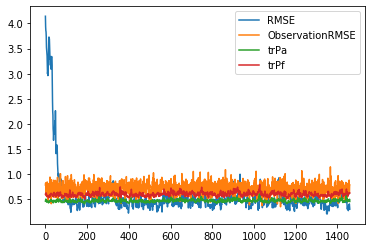

0.4815807482038653


In [38]:
def Forecast_ETKF(Xa,m,b,L):
    h = 0.05 
    F = 8.0
    
    
    Xf = np.empty((N,m))
    Xf = Rungekutta4(Xa,h,F)
    #print(Xf)
    Xf_ = np.sum(Xf,axis=1)/m
    #print(Xf_.shape)
    #dX = [Xf[:,k]-Xf_ for k in range(m)]
    dXf = Xf - Xf_.reshape(-1,1)
    #dXf = np.array(dX).reshape(m,N).T
    dXf = dXf*b
    #print(dXf)
    Pf = dXf @ dXf.T/(m-1)
    # B=localization
    #Pf = Pf*L
    
    return Xf,Pf,dXf,Xf_

def Analysis_ETKF(Xf,Pf,dXf,Xf_,y,m,a,mask,L):
    N = 40
    p = N-a
    #H = np.identity(N)
    #H = np.delete(H,mask,axis=0) #観測欠損 #観測行列
    E = np.identity(N)
    H = H3_t(Xf_,E,mask)
    R = np.eye(p)
    I = np.eye(N)
    
    dY = H @ dXf
    #カルマンゲインの導出
    A = H @ Pf @ H.T + R
    A_inv = np.linalg.inv(A)
    K = Pf @ H.T @ A_inv
    # K-localization
    K = K*L
    
    Xa_ = Xf_ + K @ (y - H @ Xf_)
    E = np.eye(m)
    TT = E - dY.T @ np.linalg.inv(dY @ dY.T+(m-1)*R) @ dY
    #print(TT)
    
    la,v = np.linalg.eigh(TT)
    #print(v)
    D = np.diag(np.sqrt(la))
    #print(D)
    U = np.array(v).reshape(m,m)
    
    T = U @ D
    #print(T @ T.T)
    dXa = dXf @ T
    Xa = np.zeros((N,m))
    Xa = dXa + Xa_.reshape(-1,1)
    
    Pa = dXa @ dXa.T/(m-1)
    
    return Xa,Pa,Xa_

def H3_t(X,dX,mask):
    H = np.diag(np.sqrt(X*X)/X)
    Ht = np.delete(H,mask,axis=0)
    #Ht = H[mask]
    return Ht@dX

def H3_adj(X,dY,mask):
    H = np.diag(np.sqrt(X*X)/X)
    Hadj = np.delete(H,mask,axis=0).T
    return Hadj@dY

t = 1460
N = 40
h = 0.05 
F = 8.0
m = 20
dataset = pd.read_csv("observation_data2.csv")
Y = dataset.values.reshape(t,N)
dataset2 = pd.read_csv("data2.csv")
Xt = dataset2.values.reshape(t,N)
RMSE2 = []
TrPa = []
TrPf = []
A = []
B = []

#for m in [40,20,15,10,8]:
#初期値
Xa = np.empty((N,m))
Xc = np.random.rand(N,m)
for j in range(500):
    Xb = Rungekutta4(Xc,h,F)
    Xc = Xb
Xa = Xb
    #plt.plot(Xa[:,9])
    #plt.plot(Xa[:,8])
    #plt.show()

for i in range(20):
    a = i # observation miss
    sigma = 2.0
    for j in range(1):
        b = 1.2
        trPa = []
        trPf = []
        R = []
        Rf = []
        R_ = []
        RO = []
        for k in range(t):
            
            """
            l = np.arange(N).tolist()
            loc = random.sample(l,a)
            loc.sort()
            for i in range(a):
                df = dataset.drop(str(loc[i]),axis=1)
                dataset = df
            y = dataset.values 
            y = y.reshape(1460,N-a)
            """
            
            mask = np.random.choice(40,a,replace=False)
            y_ =np.delete(Y[k],mask)
            D=np.zeros((N,N-a))
            L=np.zeros((N,N-a))
            r=0
            obs=np.arange(N)
            obs=np.delete(obs,mask)
            for s in range(N):
                for u in range(N-a):
                    D[s,u] = min(abs(s-obs[u]),N-abs(s-obs[u]))
            d0 = 2*np.sqrt(10/3)*sigma
            r0 = np.exp(-d0**2/(2*sigma**2))
            L = np.exp(-D**2/(2*sigma**2))
            L[L<r0]=0
            """
            for s in range(N):
                for u in range(N-a):
                    if(D[s,u]<2*np.sqrt(10/3)*sigma):
                        L[s,u] = np.exp(-D[s,u]**2/(2*sigma**2))
                    else:
                        L[s,u] = 0
            """
            (Xf,Pf,dXf,Xf_) = Forecast_ETKF(Xa,m,b,L)
            (Xa,Pa,Xa_) = Analysis_ETKF(Xf,Pf,dXf,Xf_,y_,m,a,mask,L)
            #print(Xf)
    
            rmse=np.zeros(m)
            rmsef = np.zeros(m)
            rmse_=0
            X1 = Xt[k]
            #Y1 = Y[k]
            Y1 =np.delete(Y[k],mask)
            rmse = np.sqrt(np.sum((Xa-X1.reshape(-1,1))*(Xa-X1.reshape(-1,1)),axis=0)/N)
            rmsef = np.sqrt(np.sum((Xf-X1.reshape(-1,1))*(Xf-X1.reshape(-1,1)),axis=0)/N)
            rmse_ = np.sqrt(np.sum((Xa_-X1)*(Xa_-X1))/N) 
            X1 = H3(Xt[k],mask)
            rmseo = np.sqrt(np.sum((Y1-X1)*(Y1-X1))/N)
            err = np.sqrt(np.sum(np.diag(Pa))/N)
            err2 = np.sqrt(np.sum(np.diag(Pf))/N)
            trPa.append(abs(err))
            trPf.append(abs(err2))
            R.append(rmse)
            Rf.append(rmsef)
            R_.append(rmse_)
            RO.append(rmseo)
            #if(k%100==0):
             #   print(k)
        rb = np.mean(np.array(R_[500:]))
        trPab = np.mean(np.array(trPa[500:]))
        trPfb = np.mean(np.array(trPf[500:]))
        RMSE2.append(rb)
        TrPa.append(trPab)
        TrPf.append(trPfb)
        #A.append(sigma)
        A.append(a)
        B.append(b)
        print(sigma,b)
#print(trPa)
#print(R)
plt.plot(R_,label="RMSE")
plt.plot(RO,label="ObservationRMSE")
plt.plot(trPa,label="trPa")
plt.plot(trPf,label="trPf")
plt.legend()
#plt.savefig("ETKF-KL_obs2.png")
plt.show()
print(np.mean(R_[500:]))

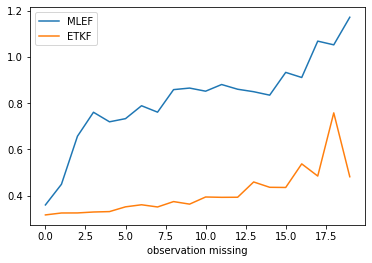

In [39]:
plt.plot(A,RMSE,label="MLEF")
plt.plot(A,RMSE2,label="ETKF")
plt.xlabel("observation missing")
plt.legend()
plt.savefig("MLEF-ETKF-obsmiss_obs2.png")
plt.show()